<div style="background-color: #2c3e50; padding: 10px; border-radius: 5px;">
---
<div style="text-align: center;">
  <h1>DM d'annalyse de données</h1>
  <p>THOUKAM THOTCHUM YVES</p>
  <p>2024</p>
  <p>3A</p>
</div>

---

## Informations

- **Nom:** THOUKAM THOTCHUM YVES
- **Année:** 2024
- **Classe:** 3A ROBOTIQUE
- **Projet:** Analyse de données 
- **Institution:** POLYTECH DIJON
- **Professeur:** M. Antoine LAVAULT
- **Date de Soumission:** 1 Juin

---

## Résumé

Ce notebook présente mes réponses aux questions posées ainsi que mon analyse des caractéristiques descriptives et visuelles des données mises à notre disposition. Il inclut également la modélisation et l'interprétation des résultats obtenus, avec une discussion sur le choix de certains estimateurs et caracteristique pertinentes de certain datasets.


## Références

- [https://docs.python.org/fr/3.7/library/os.html](https://docs.python.org/fr/3.7/library/os.html)  
- [https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html)  
- [https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_0.html](https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_0.html)  
- [https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.moments_hu](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.moments_hu)  
- [https://www-lisic.univ-littoral.fr/~fonlupt/Enseignement/2020/AD/TD%20-%20Titanic.pdf](https://www-lisic.univ-littoral.fr/~fonlupt/Enseignement/2020/AD/TD%20-%20Titanic.pdf)  
- [https://fr.wikibooks.org/wiki/LaTeX/%C3%89crire_des_math%C3%A9matiques](https://fr.wikibooks.org/wiki/LaTeX/%C3%89crire_des_math%C3%A9matiques)  
- [https://www.youtube.com/watch?v=82KLS2C_gNQ&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq](https://www.youtube.com/watch?v=82KLS2C_gNQ&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq)
- [https://datascientest.com/modele-sarimax-tout-savoir](https://datascientest.com/modele-sarimax-tout-savoir)
- egalement mon cours et TP de 3A et ChatGPT



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
random_state = 170
common_params = {
    "n_init": 10,
    "random_state": random_state,
}

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]


# Examen - Analyse de Données
* Deadline: 01/06/2023, 23h59
* A rendre sur Teams (section Devoirs)
* Les objectifs pédagogiques de cet examen sont les suivants:
  * Capacités de programmation basiques en Python
  * Capacités de programmation avancées en Python
  * Capacités de réflexion quand présenté avec un problème nouveau
  * Capacité à mobiliser les connaissances dans le cadre d'un problème nouveau.
  * Capacité d'interpréter avec recul et objectivité des résultats statistiques.
  * Capacité à choisir les outils convenables pour un problème donné.
* L'examen est long, ne commencez pas deux heures avant la deadline.

## Exercice - Interprétation de données (6 pts)


### Q1
* Affichez, avec la fonction `print`, les noms des classes ainsi que les noms des features du dataset "Iris" (2pts)

In [47]:
iris = datasets.load_iris()
X=iris.data
y =iris.target
target_names = iris.target_names
feature_names = iris.feature_names
print(f"nom target du dataset Iris : {target_names}\nnom feature du dataset Iris : {feature_names}")

nom target du dataset Iris : ['setosa' 'versicolor' 'virginica']
nom feature du dataset Iris : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Q2
On veut pouvoir visualiser les données présentes dans le dataset Iris d'une manière convenable.

Afficher le contenu du dataset "Iris" avec un pairplot et une coloration liée au type de fleur (4 pts)

/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

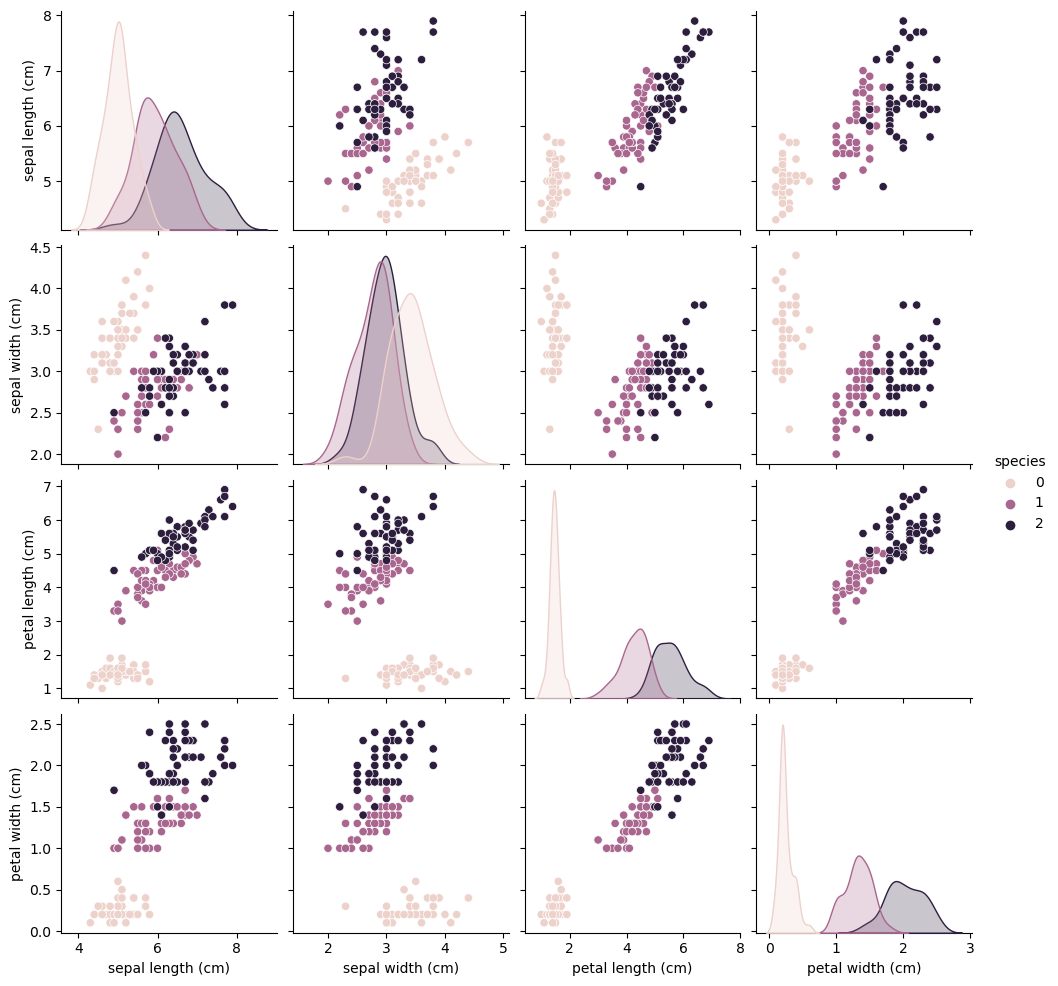

In [48]:
# je Crée une DataFrame pandas avec les données Iris
import pandas as pd
iris_df = pd.DataFrame(X, columns=feature_names)
# J'ajoute la colonne target à la DataFrame
iris_df['species'] = y
# J'utilise la fonction pairplot pour visualiser les relations entre les caractéristiques
sns.pairplot(iris_df, hue='species')
plt.show()

## Exercice - Clustering (11 pts)

Cet exercice a pour but de vérifier les hypothèses validées par un modèle K-Means.

### Q1
Décrivez le fonctionnement du code ci-dessous et le contenu des 4 datasets (décrire brièvement) (1+4*0.5 pts)

In [49]:
n_samples = 1500
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state) # Dataset 1
X_2 = np.dot(X, transformation)  # Dataset 2
X_3, y_3 = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Dataset 3
X_4 = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
) # Dataset 4
y_4 = [0] * 500 + [1] * 100 + [2] * 10

**ce code permet d'obtenir en tout 4 Datasets.**

- **Dataset 1**:le premier dataset génére un ensemble de données synthetique soit 1500 échantillons en groupe repartie de maniére gaussienne(en forme de blob), le paramétre random_state est un paramtétre qui permet de reproduire les memes données à chaque fois que le code est éxecuté.
- **Dataset 2**:le deuxiéme dataset est obtenu en multipliant la matrice des variables prectives du dataset 1 par la matrice de transformation initialiser au debut du programme, ce qui permet de faire une transformation lineaire sur le dataset 1
- **Dataset 3**:le troisiéme dataset génére un ensemble de donnée synthetique de 1500 échantillons avec 3 groupe de point(cluster) avec exactement les meme donnéées généré à chaque exécution du code. le paramétre cluster_std contient une liste de valeur indiquant l'écart type des clusters, chaque cluster a un écart type différent.
- **Dataset 4**:dans le quatriéme dataset les X_4 sont obtenu par concatenation des tableaux en empilant verticalement les 500 premieres lignes de X où la valeur de y est égal à 0, les 100 premieres lignes de X où la valeur de y est égal à 1 et les 10 premieres lignes de X où la valeur de y est égal à 0. 
    y_4 est créé en concaténant les étiquettes correspondant à chaque sous-ensemble de données. les étiquettes de classe 0 sont répétées 500 fois, les étiquettes de classe 1 sont répétées 100 fois et les étiquettes de classe 2 sont répétées 10 fois.






### Q2
Le code suivant permet de visualiser les données:

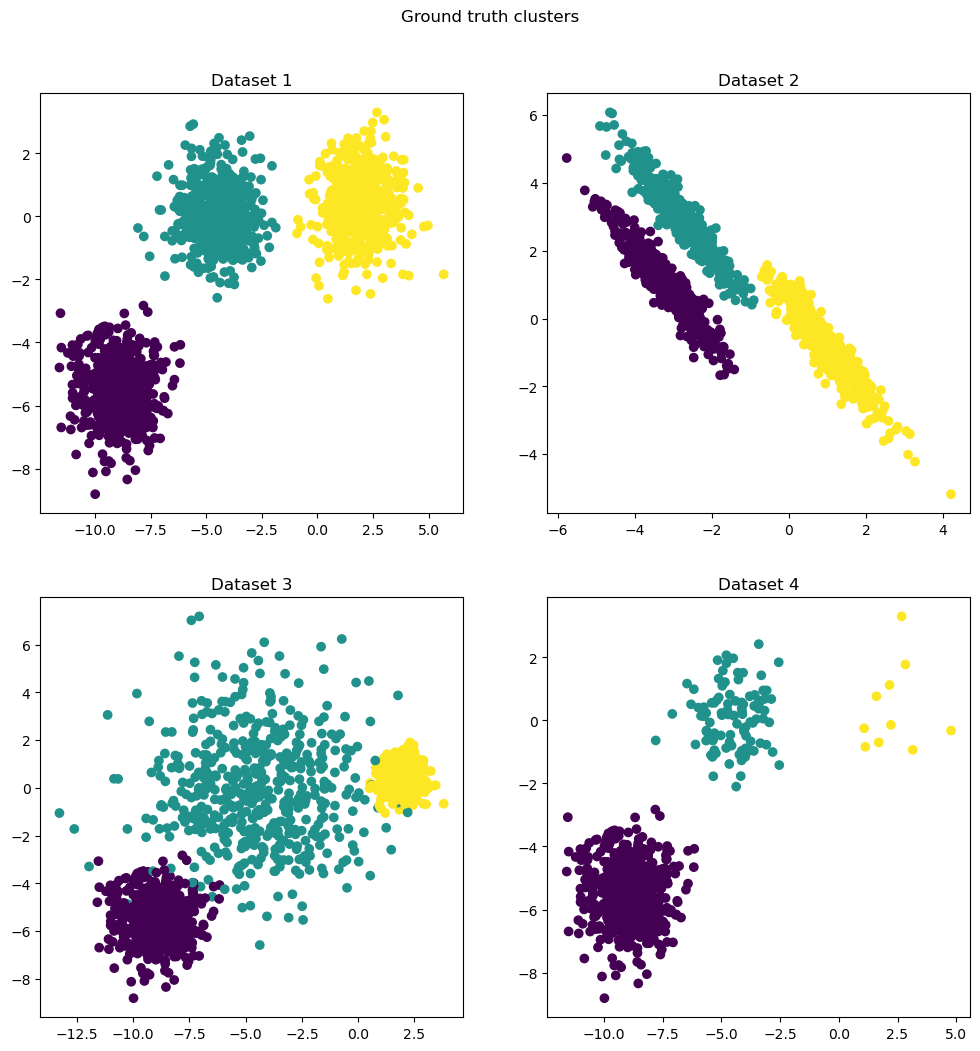

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Dataset 1")

axs[0, 1].scatter(X_2[:, 0], X_2[:, 1], c=y)
axs[0, 1].set_title("Dataset 2")

axs[1, 0].scatter(X_3[:, 0], X_3[:, 1], c=y_3)
axs[1, 0].set_title("Dataset 3")

axs[1, 1].scatter(X_4[:, 0], X_4[:, 1], c=y_4)
axs[1, 1].set_title("Dataset 4")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

* En vous inspirant du code ci-dessus, présenter les résultats de l'application de KMeans sur les 4 datasets et interprétez les figures (5pts)

Indication : changer les titres des figures pour les rendre plus explicites sera une très bonne chose !

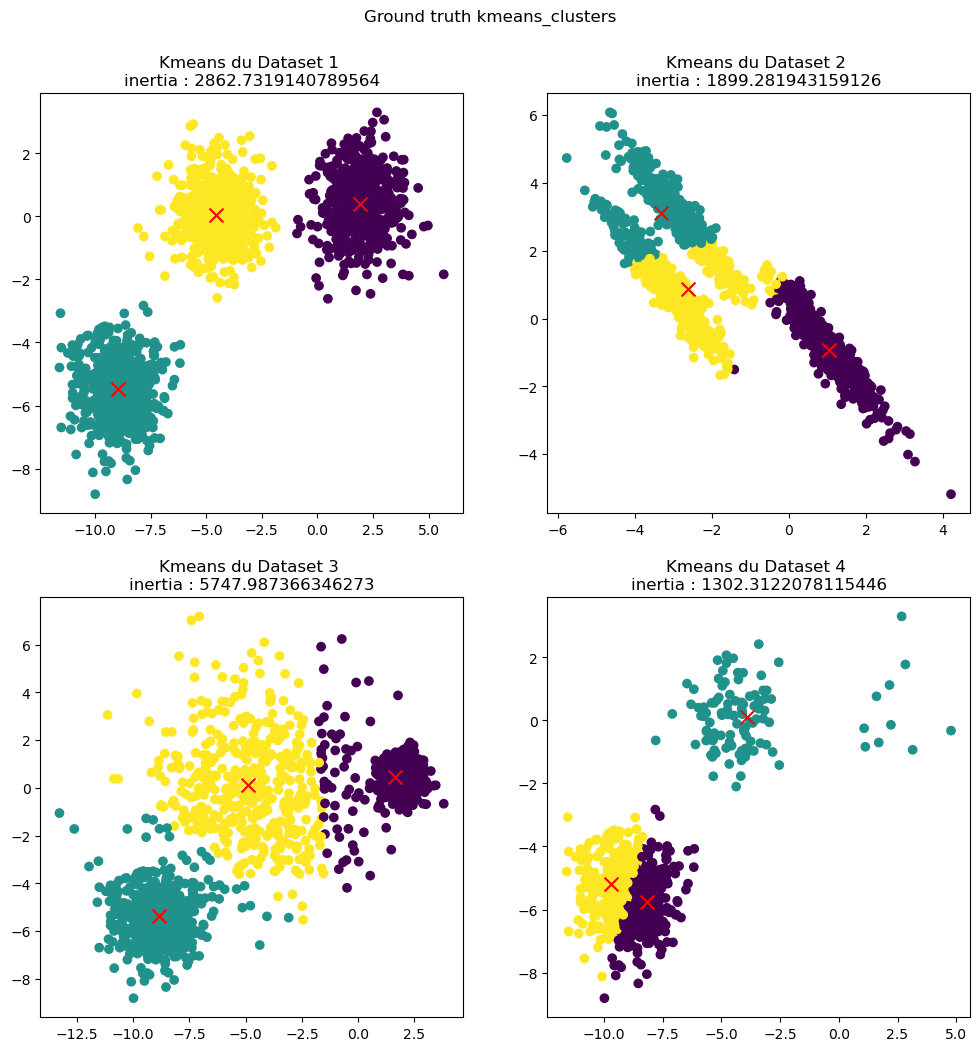

In [51]:
from sklearn.cluster import KMeans
k_means = KMeans( n_clusters=3, random_state = random_state,n_init="auto")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

k_means.fit(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=k_means.predict(X))
axs[0, 0].scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c='r',marker='x',s=100)
axs[0, 0].set_title(f"Kmeans du Dataset 1 \ninertia : {k_means.inertia_}")

k_means.fit(X_2)
axs[0, 1].scatter(X_2[:, 0], X_2[:, 1], c=k_means.predict(X_2))
axs[0, 1].scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c='r',marker='x',s=100)
axs[0, 1].set_title(f"Kmeans du Dataset 2 \ninertia : {k_means.inertia_}")

k_means.fit(X_3)
axs[1, 0].scatter(X_3[:, 0], X_3[:, 1], c=k_means.predict(X_3))
axs[1, 0].scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c='r',marker='x',s=100)
axs[1, 0].set_title(f"Kmeans du Dataset 3 \ninertia : {k_means.inertia_}")

k_means.fit(X_4)
axs[1, 1].scatter(X_4[:, 0], X_4[:, 1], c=k_means.predict(X_4))
axs[1, 1].scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c='r',marker='x',s=100)
axs[1, 1].set_title(f"Kmeans du Dataset 4 \ninertia : {k_means.inertia_}")

plt.suptitle("Ground truth kmeans_clusters").set_y(0.95)
plt.show()

**INTERPRETATION DES RESULTATS :**

Les résultats montrent comment le modèle K-Means a formé des clusters pour chaque dataset :

- **Dataset 1** : Les clusters sont bien séparés et compacts, indiquant que KMeans a bien identifié les groupes naturels dans les données, avec un inertia = 2862.73 qui est relativement bas.

- **Dataset 2** : Un inertia de 1899.28. Les clusters sont également bien séparés après la transformation, montrant que K-Means peut s'adapter aux transformations linéaires, mais ils semblent plus proches les uns des autres et les clusters vert et jaune semblent avoir des caractéristiques internes différentes.

- **Dataset 3** : Inertia de 5747.98. Les clusters sont de tailles et de dispersions grandes et différentes, mais K-Means a réussi à identifier les trois groupes, bien que les frontières soient moins claires. Cela est dû au fait que chaque cluster a un écart type différent.

- **Dataset 4** : Les clusters sont déséquilibrés en termes de taille, ce qui rend le clustering plus difficile pour K-Means, mais il parvient toujours à séparer les groupes principaux. Une frontière est plus collée, ce qui montre que certains clusters sont plus proches les uns des autres, tandis qu'une autre frontière est plus éloignée, indiquant une meilleure séparation avec une catégorie plus ou moins spersée.
.
paux.


### Q3 (2pts)
* Dans le cas où les données sont en hautes dimensions, que ce passe-t-il avec les distances ?
* Comment peut-on limiter l'impact de ce problème ?

- **en haute dimensions, la distance euclidienne entre les points tend à augmenter à mesure que la dimensionnalité augmente. la plupart des points deviennent éloigné les uns des autres en termes de distance eucliedienne (distance qu'utilise l'algorithme du kmeans pour la repartition), ce qui rend difficile la distinction ou la nuances entre point rapproché et points éloigné.**
- **pour limiter l'impact de ce probléme on peut normalisé les données ou encore mieux reduire la dimenssion à l'aide des algorithmes de reductions de dimenssion comme l'ACP, ou utiliser des algorithmes qui sont robuste à la dimenssion comme DBSCAN et RandomForest**


## Exercice - Quartet d'Anscombe (10 pts)

In [52]:
df_anscombe = sns.load_dataset("anscombe")
df_anscombe.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

### Q1 - 4 pts

* Affichez les 4 datasets (I, II, III, IV) d'Anscombe. (2pts)
* Affichez les éléments suivants, par dataset: (2pts)
    * Moyenne des x
    * Variance des x
    * Moyenne des y
    * Variance des y
    * Coefficient de corrélation entre les x et les y
    * Équation de la droite de régression linéaire
    * Somme des carrés des erreurs relativement à la moyenne

*Indication:* les statistiques doivent être obtenues dynamiquement (i.e., pas de nombre "écrit à la main"). Les f-strings pourront être utiles ici.

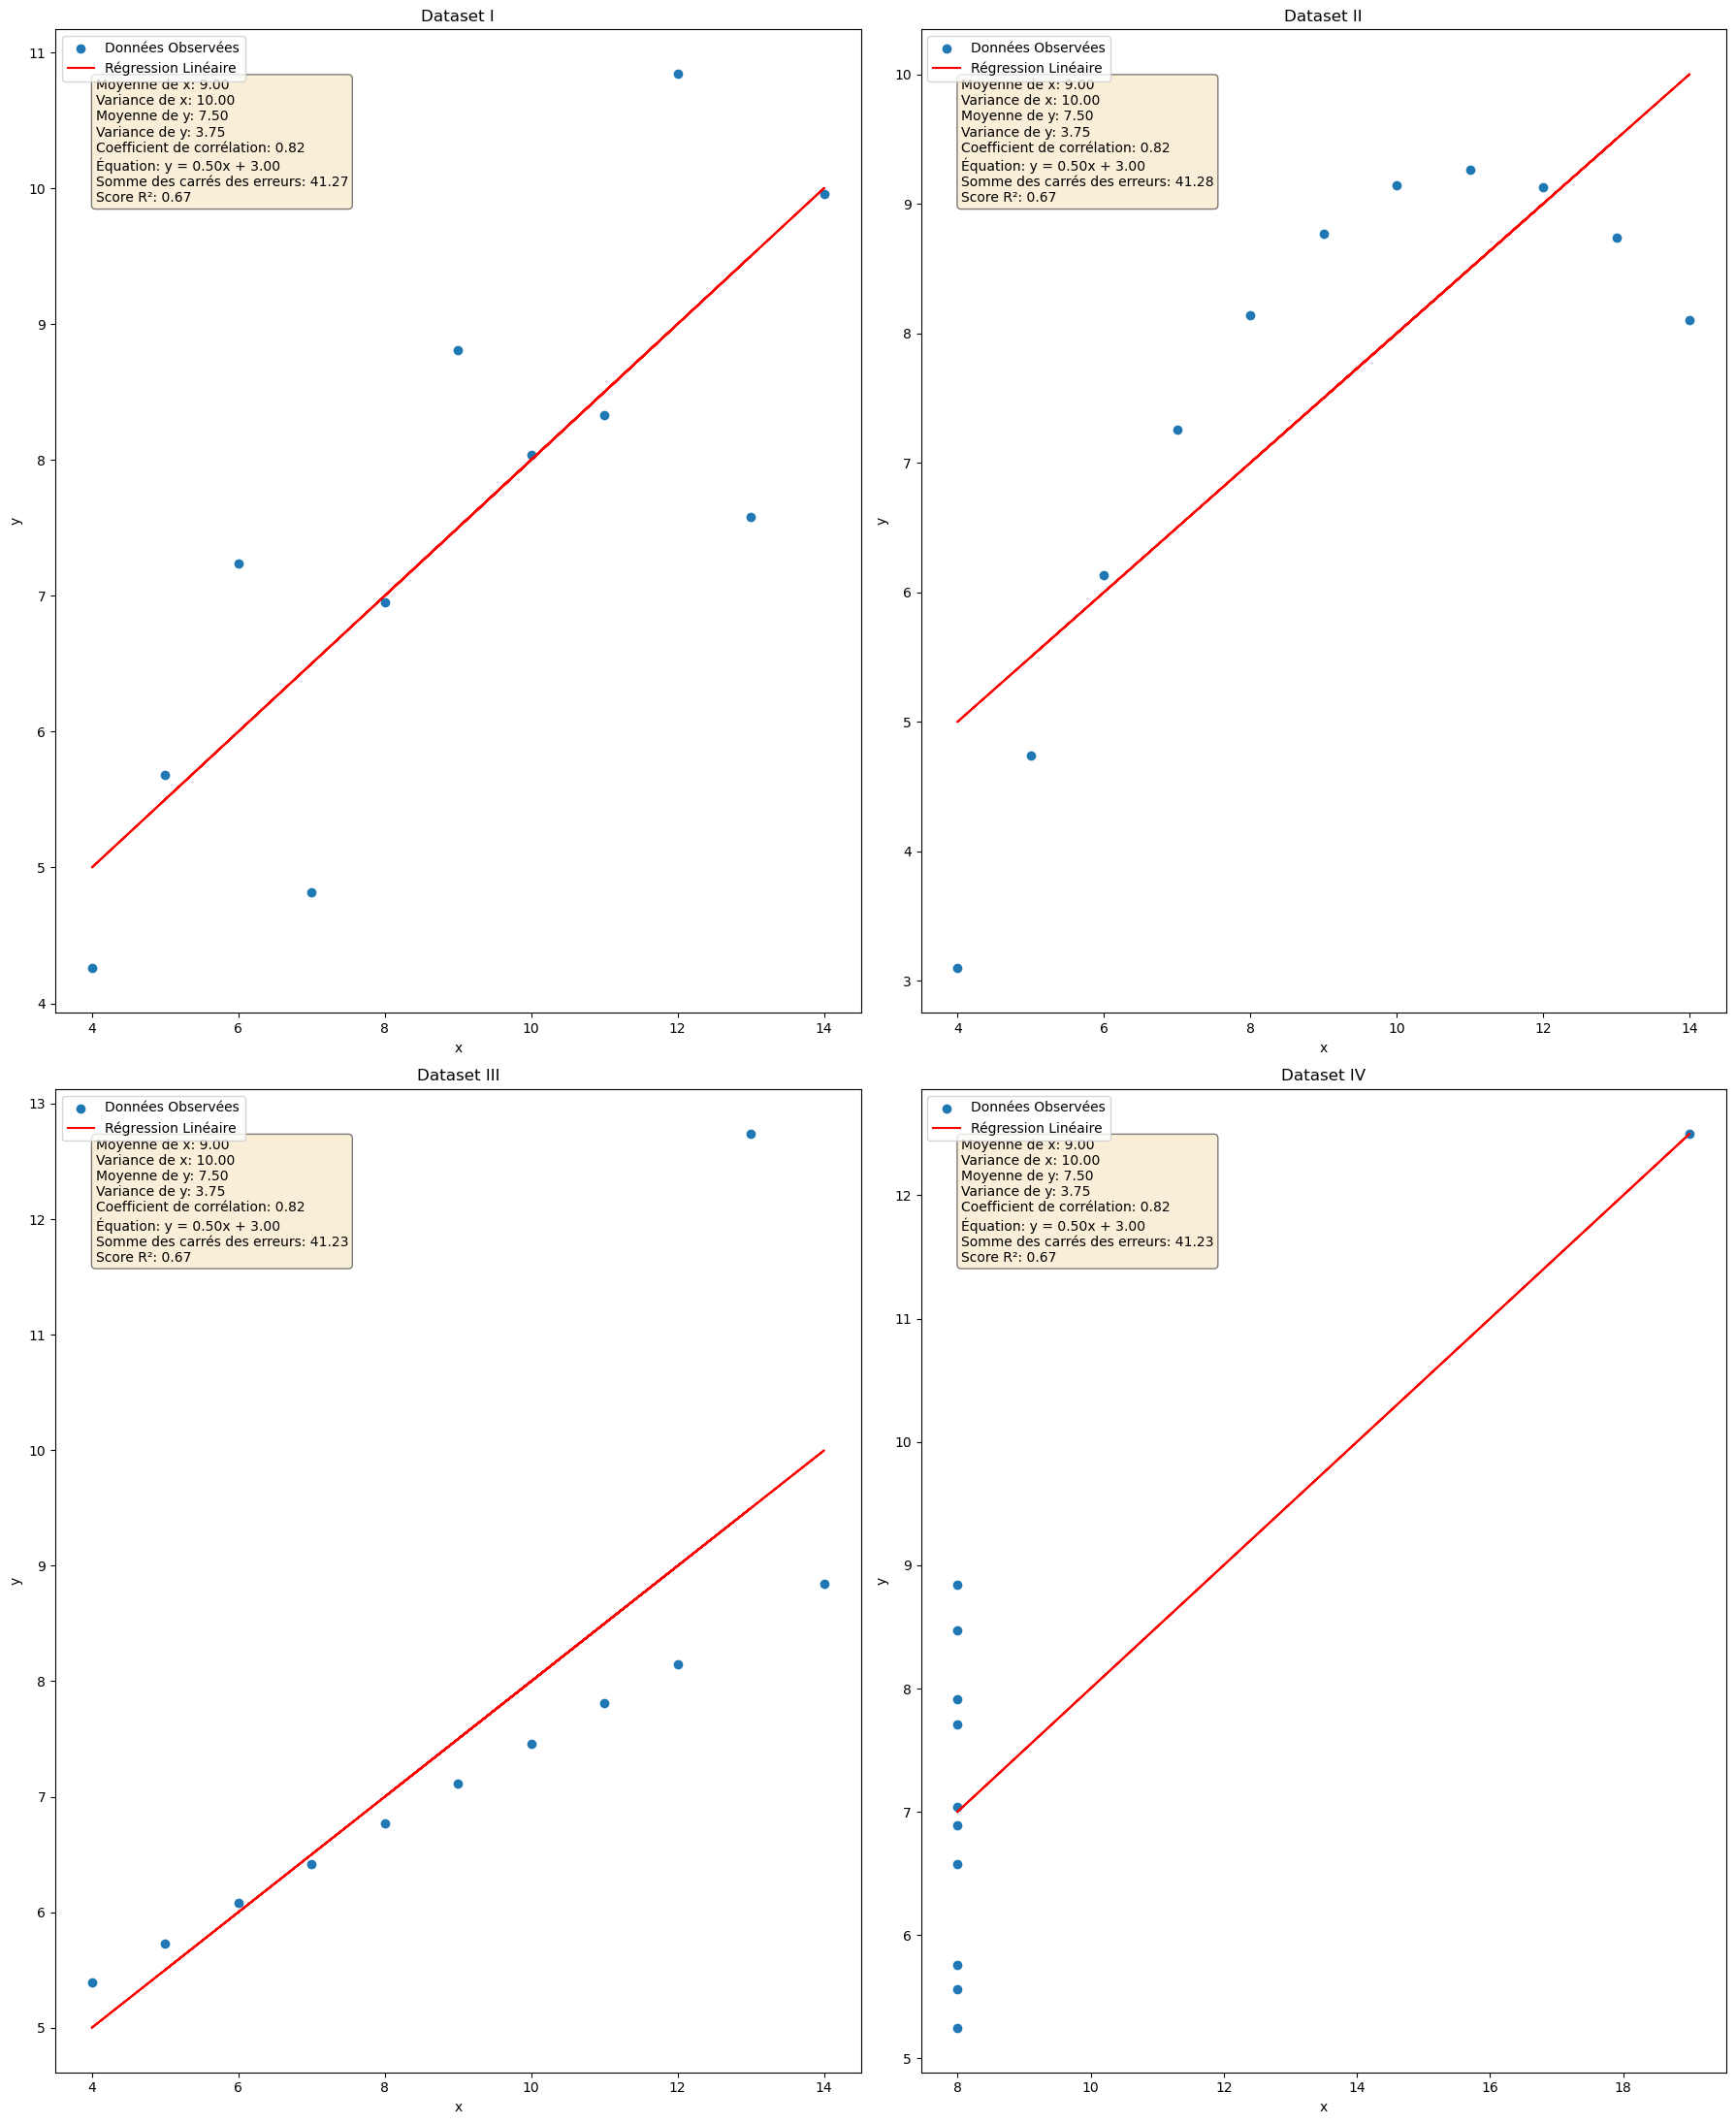

In [53]:
# je crée une figure avec plusieurs sous-graphes pour les quatre datasets
fig, axes = plt.subplots(2, 2, figsize=(18, 22))
axes = axes.flatten()  # Aplati la grille 2x2 en une liste pour un accès plus facile

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    dataset_I = df_anscombe.loc[df_anscombe['dataset'] == dataset]
    coef_corr = np.corrcoef(dataset_I['x'], dataset_I['y'])[0, 1]
    var_x = np.var(dataset_I['x'])
    var_y = np.var(dataset_I['y'])
    mean_x = np.mean(dataset_I['x'])
    mean_y = np.mean(dataset_I['y'])
    sse_mean = np.sum((dataset_I['y'] - np.mean(dataset_I['y'])) ** 2)
    m = coef_corr * (np.sqrt(var_y / var_x))
    b = mean_y - m * mean_x
    # Calcul du score R² pour le modèle
    ss_res_initial = np.sum((dataset_I['y'] - (m * dataset_I['x'] + b))**2)
    r2_initial = 1 - ss_res_initial / sse_mean

    info_text = (f'Moyenne de x: {mean_x:.2f}\n'
                 f'Variance de x: {var_x:.2f}\n'
                 f'Moyenne de y: {mean_y:.2f}\n'
                 f'Variance de y: {var_y:.2f}\n'
                 f'Coefficient de corrélation: {coef_corr:.2f}\n'
                 f'Équation: y = {m:.2f}x + {b:.2f}\n'
                 f'Somme des carrés des erreurs: {sse_mean:.2f}\n'
                 f'Score R²: {r2_initial:.2f}')

    axes[i].text(0.05, 0.95, info_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


    # Affiche les données observées et la droite de régression linéaire
    axes[i].scatter(dataset_I['x'], dataset_I['y'], label='Données Observées')
    axes[i].plot(dataset_I['x'], m * dataset_I['x'] + b, color='r', label='Régression Linéaire')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Dataset {dataset}')
    axes[i].legend()

# Ajuste la mise en page et affiche la figure
plt.tight_layout()
plt.show()

### Q2 (2pts)

Vu la visualisation faite à la question précédente, que dire des statistiques calculées elles aussi à la question précédente ? (2pts)

**INTERPRETATION DES RESULTATS:**
- Les statistiques calculées pour chaque dataset montrent que les moyennes et les variances sont les mêmes, ce qui démontre l'importance de visualiser les données pour comprendre leur véritable structure.
- Les graphiques montrent que malgré des statistiques descriptives similaires (moyenne, variance), les 4 datasets sont très différents visuellement :
  - **Dataset I** : Distribution linéaire classique.
  - **Dataset II** : Distribution non linéaire.
  - **Dataset III** : Présence d'un point aberrant qui influence fortement la régression linéaire.
  - **Dataset IV** : Un point aberrant verticalement aligné avec une ligne.


### Q3 (4 pts)

Proposez de meilleures estimations (si possible) pour chacun des datasets. Justifiez.

En particulier, il est attendu que vous décriviez mathématiquement vos modèles quand cela est pertinent. Vous pourrez pour cela étudier comment écrire des mathématiques avec Latex. (4 pts)

Nous allons ajuster des modèles appropriés pour chacun des datasets.

**Estimation pour Dataset I**

**Modèle linéaire**  
Pour le Dataset I, nous pouvons ajuster un modèle linéaire de la forme :  

\begin{equation}
y= \beta_0 + \beta_1 x 
\end{equation}

**Estimation pour Dataset II**

**Modèle quadratique**  
Pour le Dataset II, nous pouvons ajuster un modèle quadratique de la forme :  

\begin{equation}
y= \beta_0 + \beta_1 x + \beta_2 x^2
\end{equation}

**Estimation pour Dataset III**

**Modèle linéaire robuste**  
Pour le Dataset III, nous pouvons ajuster un modèle linéaire robuste pour minimiser l'influence du point aberrant :  

\begin{equation}
y= \beta_0 + \beta_1 x 
\end{equation}

**Estimation pour Dataset IV**

**Modèle linéaire robuste**  
Pour le Dataset IV, nous pouvons également ajuster un modèle linéaire robuste pour minimiser l'influence du point aberrant :  

\begin{equation}
y= \beta_0 + \beta_1 x
\end{equation}

### Justification des Modèles

**Dataset I** : La relation semble linéaire, un modèle linéaire est donc approprié.

**Dataset II** : La relation semble quadratique, un modèle quadratique est donc approprié.

**Dataset III** : La présence d'un point aberrant nécessite l'utilisation d'un modèle linéaire robuste pour réduire l'impact de ce point sur la régression.

**Dataset IV** : La présence d'un point aberrant vertical nécessite également l'utilisation d'un modèle linéaire robuste.

pour ajuster notre modele nous disposons de plusieurs technique ou algorithme comme **RANSAC** et **Statmodel** qui  offre plusieurs méthodes pour la régression robuste. 
- **RANSAC** : Très efficace pour les jeux de données avec un grand nombre de valeurs aberrantes car il ignore ces valeurs lors de la modélisation.
- **Statsmodels** : Réduit l'influence des valeurs aberrantes plutôt que de les ignorer, ce qui peut être moins efficace pour des données très bruitées.
dans la suite nous travaillerons avec stamodels car le jeu de données ne contient pas d'enorme outliers.

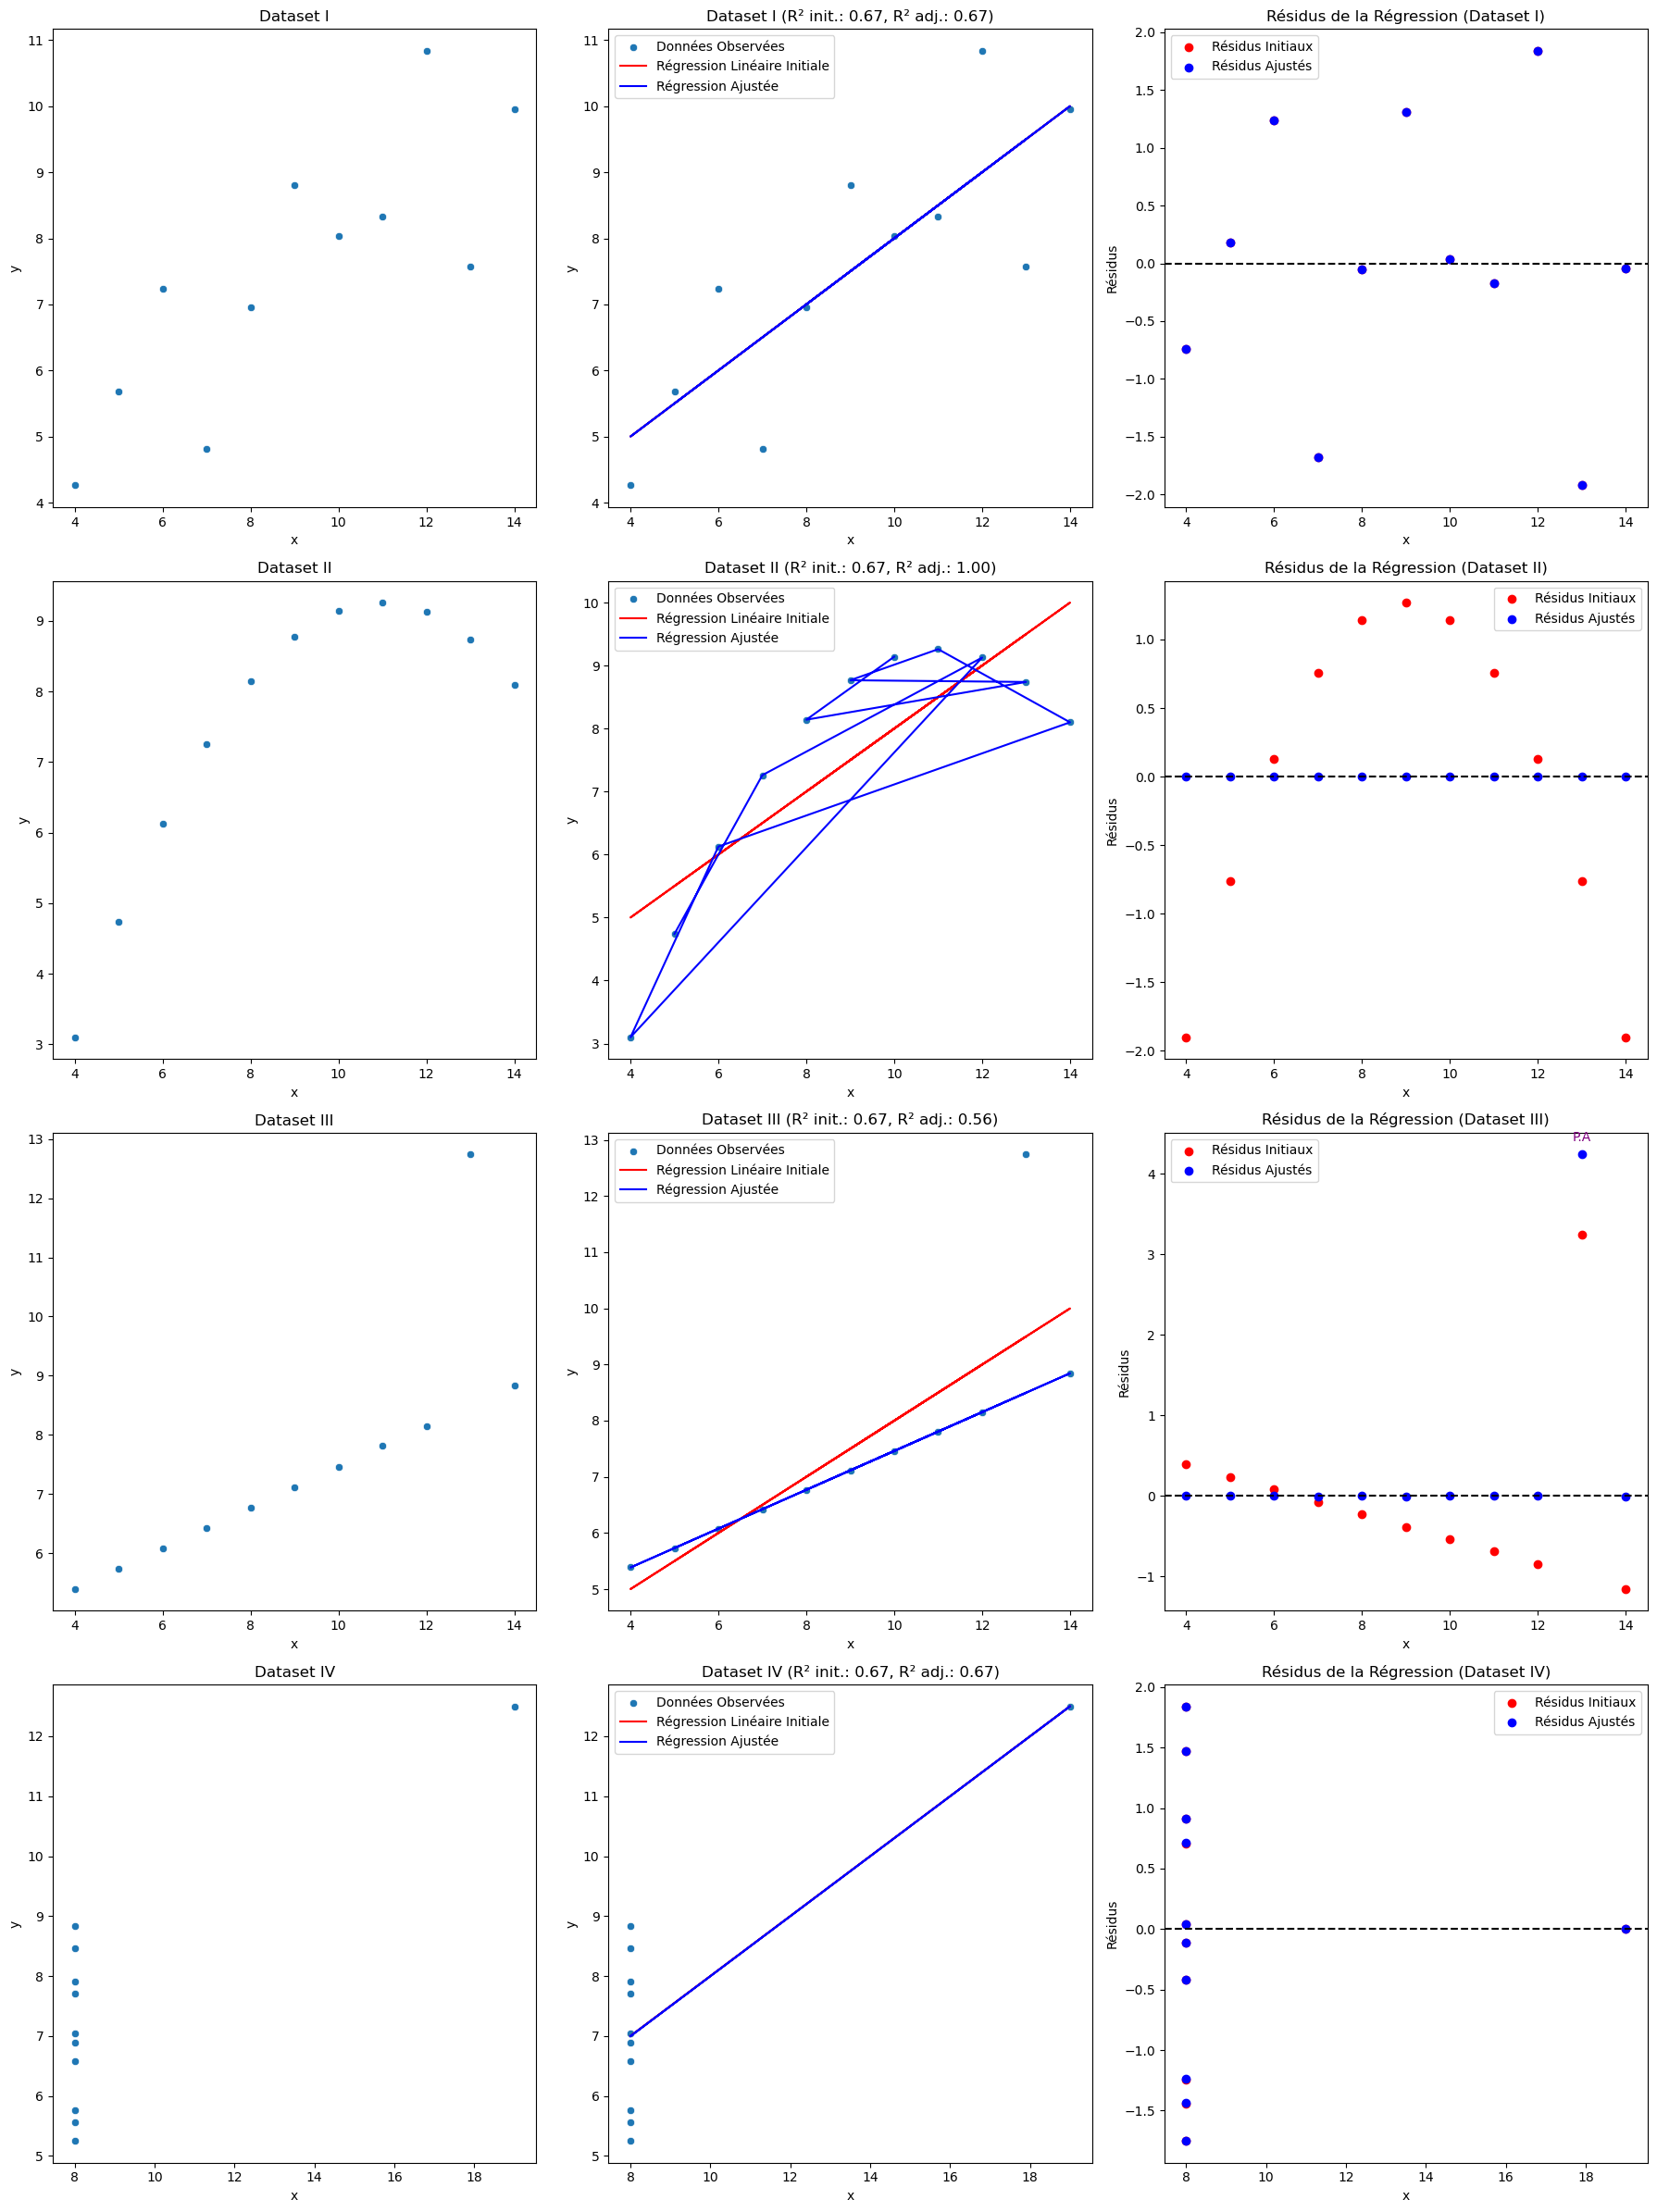

In [54]:
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# Filtre les datasets I, II, III, IV
datasets = {
    'I': df_anscombe[df_anscombe['dataset'] == 'I'],
    'II': df_anscombe[df_anscombe['dataset'] == 'II'],
    'III': df_anscombe[df_anscombe['dataset'] == 'III'],
    'IV': df_anscombe[df_anscombe['dataset'] == 'IV']
}

# Crée une figure avec plusieurs sous-graphes pour les quatre datasets
fig, axes = plt.subplots(4, 3, figsize=(18, 24))

# Stocke les modèles, prédictions et scores R²
models = {}
predictions = {}
r2_scores_initial = {}
r2_scores_adjusted = {}

for i, (key, dataset) in enumerate(datasets.items()):
    # Calcul du coefficient de corrélation
    coef_corr = np.corrcoef(dataset['x'], dataset['y'])[0, 1]
    
    # Calcul des statistiques descriptives
    var_x = np.var(dataset['x'])
    var_y = np.var(dataset['y'])
    mean_x = np.mean(dataset['x'])
    mean_y = np.mean(dataset['y'])
    sse_mean = np.sum((dataset['y'] - np.mean(dataset['y'])) ** 2)
    
    # Calcul de la droite de régression linéaire initiale
    m = coef_corr * (np.sqrt(var_y / var_x))
    b = mean_y - m * mean_x
    
    # Calcul du score R² pour le modèle initial sans ajustement
    ss_res_initial = np.sum((dataset['y'] - (m * dataset['x'] + b))**2)
    r2_initial = 1 - ss_res_initial / sse_mean
    r2_scores_initial[key] = r2_initial

    # Ajuste le modèle avec statsmodels
    if key == 'II':
        # Modèle quadratique pour le Dataset II
        X = np.column_stack((dataset['x'], dataset['x']**2))
    else:
        # Modèle linéaire pour les autres Datasets
        X = dataset['x']
    X = sm.add_constant(X)
    
    if key in ['III', 'IV']:
        # Modèle linéaire robuste pour Datasets III et IV
        model = RLM(dataset['y'], X).fit()
    else:
        # Modèle OLS pour les autres Datasets
        model = sm.OLS(dataset['y'], X).fit()
    
    pred = model.predict(X)
    
    # Calcul du score R² pour le modèle ajusté
    ss_res_adjusted = np.sum((dataset['y'] - pred)**2)
    r2_adjusted = 1 - ss_res_adjusted / sse_mean
    r2_scores_adjusted[key] = r2_adjusted


    # Affiche les données observées
    sns.scatterplot(ax=axes[i, 0], x='x', y='y', data=dataset)
    axes[i, 0].set_title(f'Dataset {key}')
    axes[i, 0].set_xlabel('x')
    axes[i, 0].set_ylabel('y')

    # Visualise les résultats du modèle
    sns.scatterplot(ax=axes[i, 1], x='x', y='y', data=dataset, label='Données Observées')
    axes[i, 1].plot(dataset['x'], m * dataset['x'] + b, color='red', label='Régression Linéaire Initiale')
    axes[i, 1].plot(dataset['x'], pred, color='blue', label='Régression Ajustée')
    axes[i, 1].set_title(f'Dataset {key} (R² init.: {r2_scores_initial[key]:.2f}, R² adj.: {r2_scores_adjusted[key]:.2f})')
    axes[i, 1].legend()

    # Calcule et visualiser les résidus
    residus_initial = dataset['y'] - (m * dataset['x'] + b)
    residus_adjusted = dataset['y'] - pred
    
    axes[i, 2].scatter(dataset['x'], residus_initial, color='red', label='Résidus Initiaux')
    axes[i, 2].scatter(dataset['x'], residus_adjusted, color='blue', label='Résidus Ajustés')
    axes[i, 2].axhline(0, color='black', linestyle='--')

    # Défini un seuil pour identifier les points aberrants
    seuil = 2 * np.std(residus_adjusted)
    for x, res in zip(dataset['x'], residus_adjusted):
        if abs(res) > seuil:
            axes[i, 2].annotate('P.A', (x, res), textcoords="offset points", xytext=(0,10), ha='center', color='purple')
    
    axes[i, 2].set_title(f'Résidus de la Régression (Dataset {key})')
    axes[i, 2].set_xlabel('x')
    axes[i, 2].set_ylabel('Résidus')
    axes[i, 2].legend()

# Ajuste la mise en page et affiche la figure
plt.tight_layout()
plt.show()

**Interpretation**:  

- Dataset 1: pour le Dataset I, les scores R2 2
  initial et ajsont être très similaires, car ce dataset suit une relation linéaire claire sans points aberrants maj
- Dataset 2: Le score R2 2
  a est être nettement supérieur au score initial car le modèle quadratique capture mieux la nature des don
- Dataset 3:  Un score R2 2
  initial plus élevé (0.67) et un  R2 
R 
2
  ajusté plus bas (0.56) indiquent que les points aberrants influencent fortement le modèle initial, ciellemen R2.
- Dataset 4: pour le dataset 4 les scores sont tres similaires,usté, cela montre que le point abern'rant influpasement le modèle initial.ints aberrants.nées.eurs.


## Exercice - Classification (10 pts)

### Q1 (0 pts)
Récupérer les images à l’adresse https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php et en particulier la version du dataset traitée (processed).

Puis, écrivez un chargeur de données qui puisse être compatible avec d'autres systèmes que Windows (la bibliothèque ```os``` pourra se révéler utile).

Il est aussi attendu que cette fonction de chargement considère le dossier du dataset comme présent au même niveau que le notebook.

In [2]:
import os
import pandas as pd

def ouvre_image(dataset_folder):
    
    images_paths = []
    # Chemin complet vers le dossier d'images
    folder_path = os.path.join(os.getcwd(), dataset_folder)
    
    # Vérifie si le dossier existe
    if os.path.exists(folder_path):
        # Parcourt tous les fichiers du dossier
        for filename in os.listdir(folder_path):
            # Vérifie si le fichier est une image
            if filename.lower().endswith(('.jpg', '.png')):
                # Ajoute le chemin d'accès de l'image à la liste
                image_path = os.path.join(folder_path, filename)
                images_paths.append(image_path)
        # Crée un DataFrame à partir des chemins d'accès des images
        df = pd.DataFrame(images_paths, columns=['image_path'])
        return df
    else:
        print(f"Le dossier {dataset_folder} n'existe pas.")
        return None

dataset_folder = "datasets"
images_df = ouvre_image(dataset_folder)
if images_df is not None:
    print("Chemin d'accès des images chargés avec succès.")
    # Affiche les informations sur le DataFrame
    print("Forme du DataFrame:", images_df.shape)
    print("Premières lignes du DataFrame:")
    print(images_df.head())
else:
    print("Échec du chargement des chemins d'accès des images.")

Chemin d'accès des images chargés avec succès.
Forme du DataFrame: (1440, 1)
Premières lignes du DataFrame:
                                          image_path
0  /media/roboticslab/098D-1819/deadlines/dataset...
1  /media/roboticslab/098D-1819/deadlines/dataset...
2  /media/roboticslab/098D-1819/deadlines/dataset...
3  /media/roboticslab/098D-1819/deadlines/dataset...
4  /media/roboticslab/098D-1819/deadlines/dataset...


### Q2 (2pts)

Construire un conteneur avec les valeurs des 7 moments de Hu (calculées sur les éléments du dataset) ainsi que le numéro de classe (contenu dans les noms des fichiers).

*Indication 1 :* des fonctions permettant d’ouvrir les images et calculer les 7 moments de Hu sont disponibles dans le paquet scikit-image.

*Indication 2 :* les moments de Hu se calculent APRES une transformation de l'image. Laquelle ?

**Les moments de Hu sont généralement calculés après avoir transformé l'image en niveaux de gris, car ils sont basés sur les moments géométriques de l'image. Cela permet de simplifier le calcul tout en capturant les caractéristiques importantes de la forme de l'objet.**

In [3]:
import os
from skimage import io, color
from skimage.measure import moments_hu

def load_images_to_dataframe(dataset_folder):
    """
    Charge tous les chemins d'accès des images à partir d'un dossier spécifié et les stocke dans un DataFrame.
    
    Args:
    - dataset_folder (str): Le nom du dossier contenant les images.
    
    Returns:
    - DataFrame: Un DataFrame contenant les chemins d'accès des images et les labels.
    """
    images_paths = []
    labels = []
    # Chemin complet vers le dossier d'images
    folder_path = os.path.join(os.getcwd(), dataset_folder)
    
    # Vérifie si le dossier existe
    if os.path.exists(folder_path):
        # Parcourt tous les fichiers du dossier
        for filename in os.listdir(folder_path):
            # Vérifie si le fichier est une image
            if filename.lower().endswith(('.jpg', '.png')):
                # Ajoute le chemin d'accès de l'image à la liste
                image_path = os.path.join(folder_path, filename)
                images_paths.append(image_path)
                # Extraire le label à partir du nom du fichier
                label = int(filename.split('_')[0][3:])
                labels.append(label)
        # Crée un DataFrame à partir des chemins d'accès des images et des labels
        df = pd.DataFrame({'image_path': images_paths, 'label': labels})
        return df
    else:
        print(f"Le dossier {dataset_folder} n'existe pas.")
        return None

def calculate_hu_moments(image):
    """
    Calcule les 7 moments de Hu pour une image donnée.
    
    Args:
    - image (numpy array): L'image en niveaux de gris.
    
    Returns:
    - numpy array: Un tableau contenant les 7 moments de Hu.
    """
    # Convertir l'image en niveaux de gris si nécessaire
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
    
    # Calculer les moments de Hu
    hu_moments = moments_hu(image)
    return hu_moments

def process_dataset(dataset_folder):
    """
    Charge les images, calcule les moments de Hu et les stocke dans un DataFrame avec les labels.
    
    Args:
    - dataset_folder (str): Le nom du dossier contenant les images.
    
    Returns:
    - DataFrame: Un DataFrame contenant les moments de Hu et les labels.
    """
    df_images = load_images_to_dataframe(dataset_folder)
    if df_images is None:
        return None

    hu_moments_list = []
    
    for index, row in df_images.iterrows():
        image_path = row['image_path']
        label = row['label']
        image = io.imread(image_path)
        hu_moments = calculate_hu_moments(image)
        hu_moments_list.append(np.append(hu_moments, label))
    
    columns = [f'hu_{i+1}' for i in range(7)] + ['label']
    df_hu_moments = pd.DataFrame(hu_moments_list, columns=columns)
    
    return df_hu_moments

# Exemple d'utilisation
dataset_folder = "datasets"  # Nom du dossier contenant les images
df_hu_moments = process_dataset(dataset_folder)

if df_hu_moments is not None:
    print("Moments de Hu calculés avec succès.")
    print("Forme du DataFrame:", df_hu_moments.shape)
    print("Premières lignes du DataFrame:")
    print(df_hu_moments.head())
else:
    print("Échec du chargement des moments de Hu.")

Moments de Hu calculés avec succès.
Forme du DataFrame: (1440, 8)
Premières lignes du DataFrame:
   hu_1  hu_2  hu_3  hu_4  hu_5  hu_6  hu_7  label
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   10.0
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   10.0
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   10.0
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   10.0
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   10.0


### Q3 (2pts)

Entraîner un classificateur SVM noyau RBF sur le conteneur défini précédemment. Interpréter les résultats obtenus.

*Indication :* Vous pourrez utiliser l’implémentation des SVM de scikit-learn.

/home/roboticslab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roboticslab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roboticslab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/robotic

Précision sur l'ensemble de test : 0.09
Rapport de classification pour l'ensemble de test :
              precision    recall  f1-score     support
1.0            0.705882  0.571429  0.631579   21.000000
2.0            0.750000  0.545455  0.631579   22.000000
3.0            0.000000  0.000000  0.000000   23.000000
4.0            0.000000  0.000000  0.000000   20.000000
5.0            0.000000  0.000000  0.000000   25.000000
6.0            0.000000  0.000000  0.000000   19.000000
7.0            0.000000  0.000000  0.000000   18.000000
8.0            0.000000  0.000000  0.000000   17.000000
9.0            0.000000  0.000000  0.000000   26.000000
10.0           0.040100  1.000000  0.077108   16.000000
11.0           0.000000  0.000000  0.000000   23.000000
12.0           0.000000  0.000000  0.000000   18.000000
13.0           0.000000  0.000000  0.000000   24.000000
14.0           0.000000  0.000000  0.000000   26.000000
15.0           0.000000  0.000000  0.000000   24.000000
16.0        

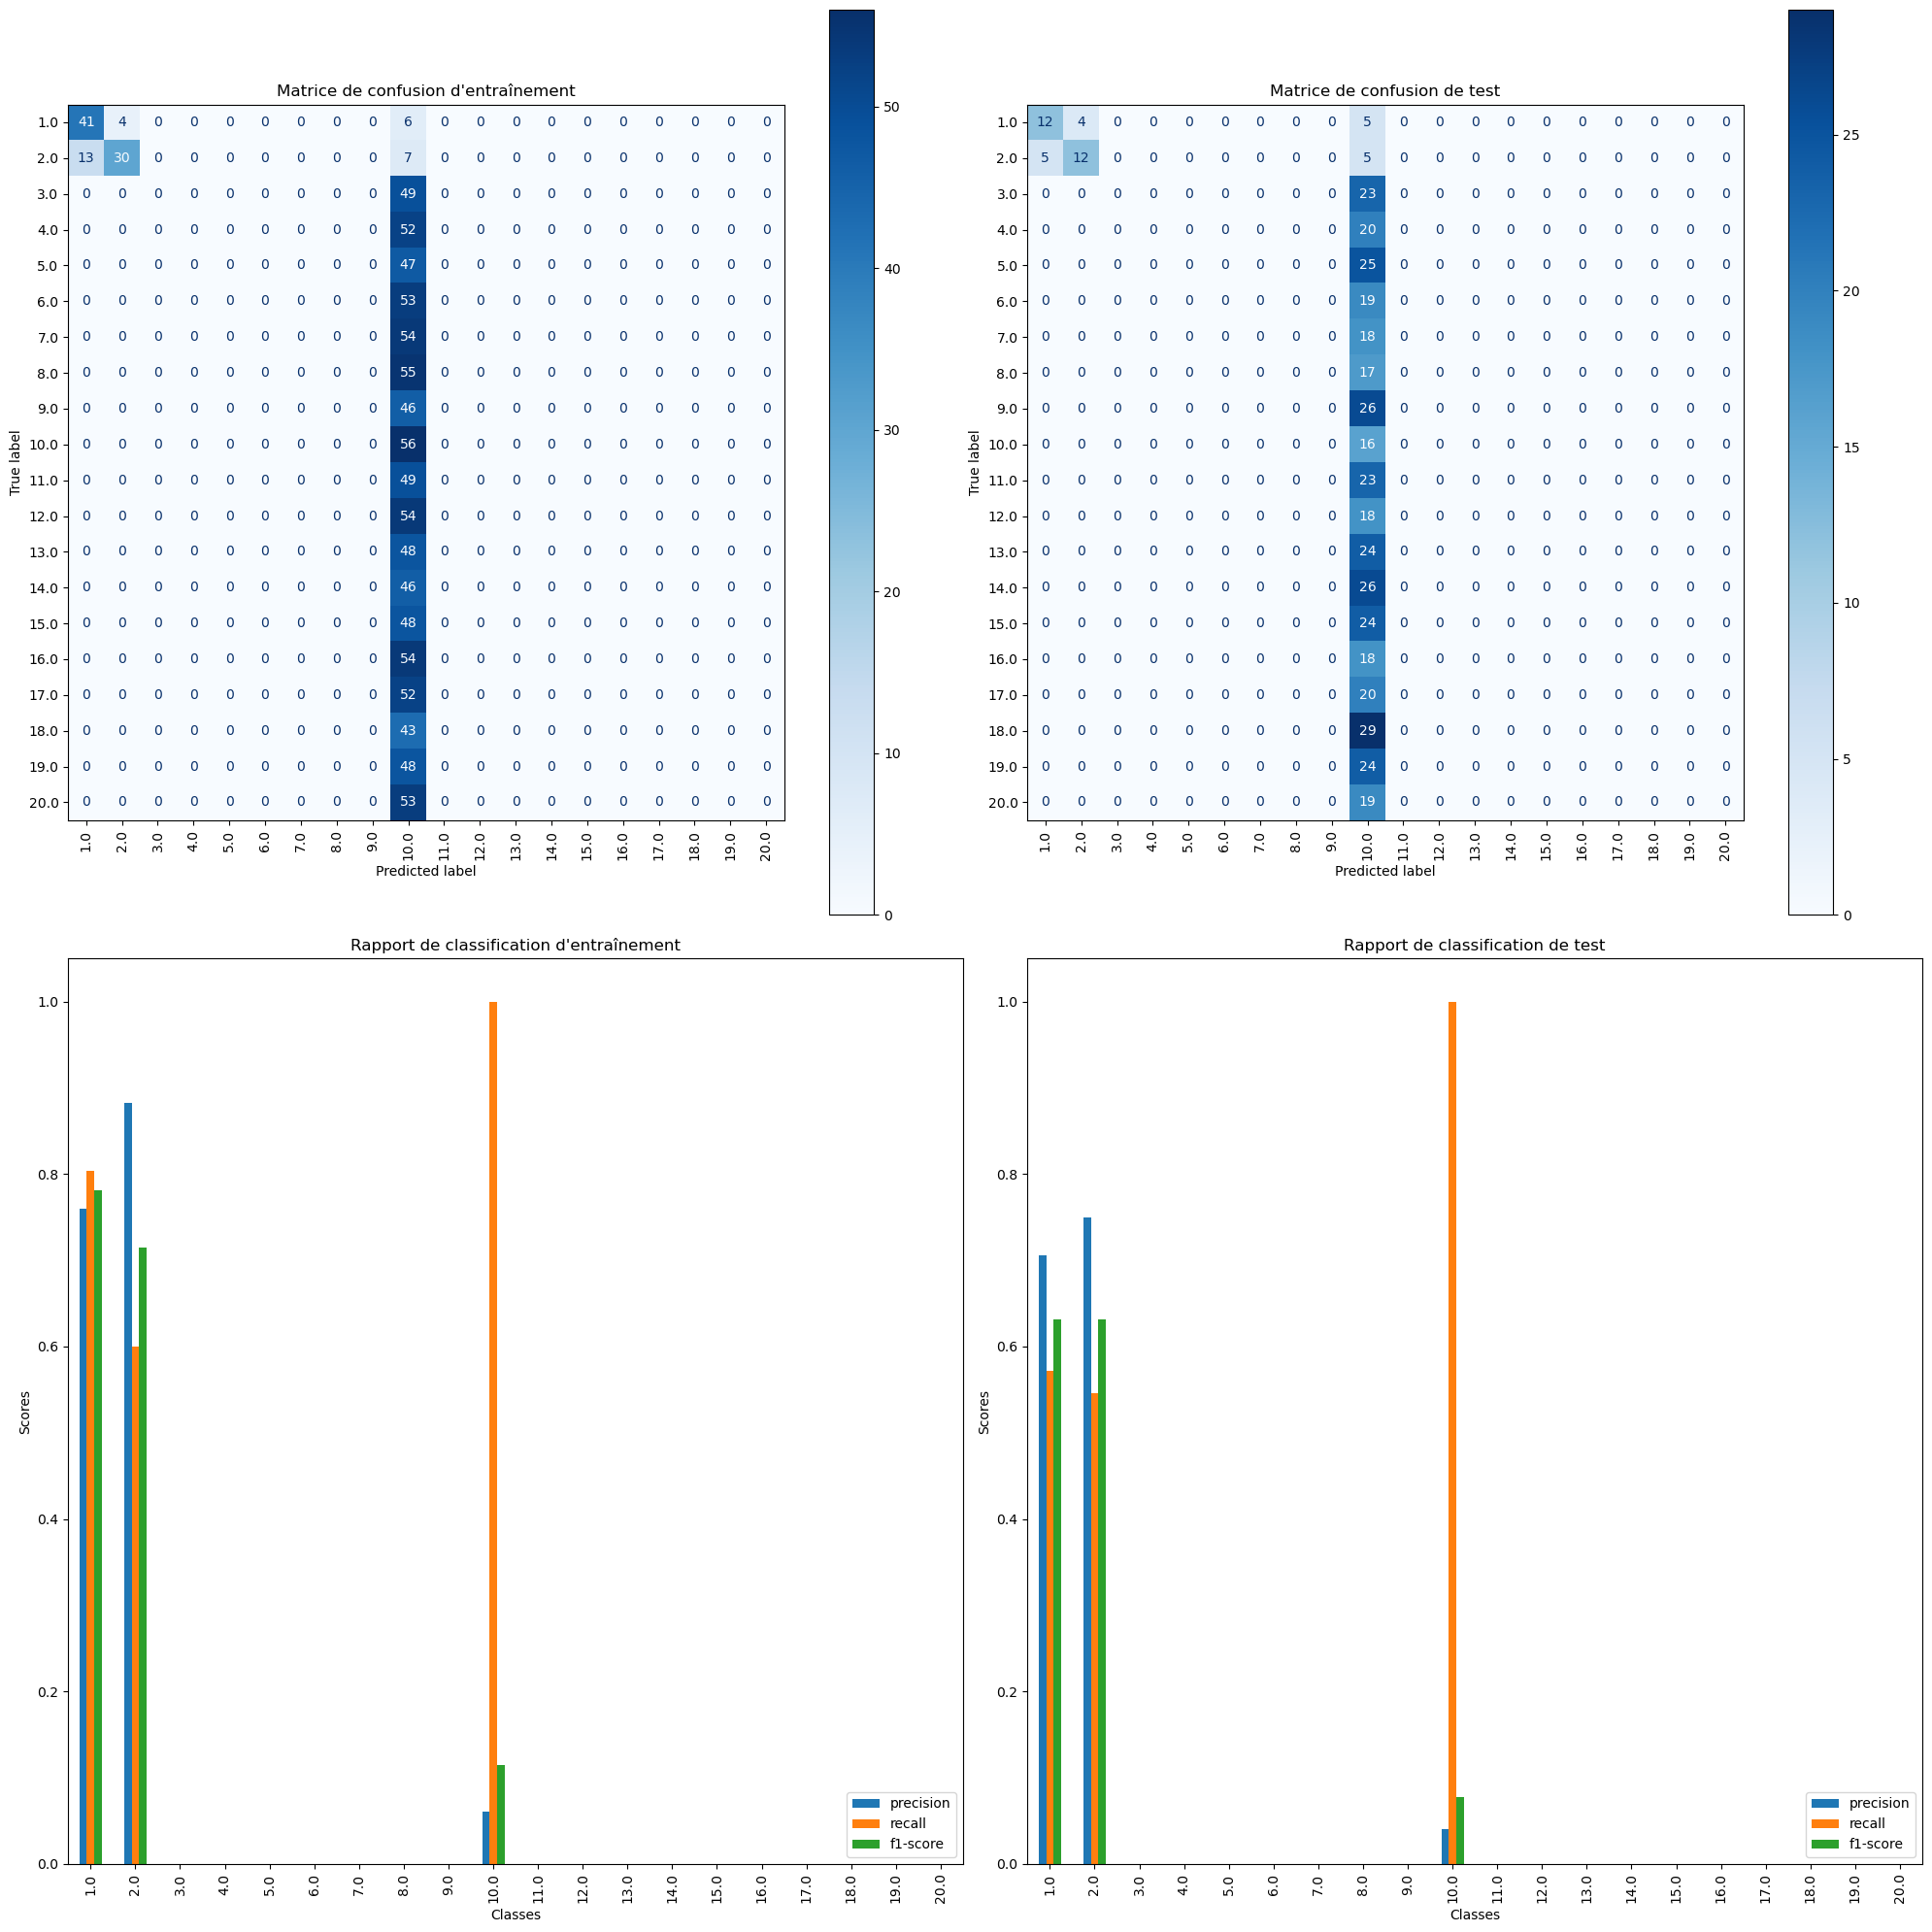

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Supposons que df_hu_moments est le DataFrame contenant les moments de Hu et les labels

# Extrait les caractéristiques (moments de Hu) et les étiquettes
X = df_hu_moments.drop('label', axis=1)
y = df_hu_moments['label']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le classificateur SVM avec un noyau RBF
svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred = svm_classifier.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred = svm_classifier.predict(X_test)

# Calcul des métriques pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred, output_dict=True)

# Calcul des métriques pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred, output_dict=True)

# Affiche les résultats pour l'ensemble de test
print(f"Précision sur l'ensemble de test : {test_accuracy:.2f}")
print("Rapport de classification pour l'ensemble de test :")
print(pd.DataFrame(test_class_report).transpose())

# Affiche les résultats pour l'ensemble d'entraînement
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy:.2f}")
print("Rapport de classification pour l'ensemble d'entraînement :")
print(pd.DataFrame(train_class_report).transpose())

# Fonction pour afficher les matrices de confusion et les rapports de classification sur la même figure
def plot_combined_results(y_train, y_train_pred, y_test, y_test_pred, train_report, test_report, class_names):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    
    # Afficher la matrice de confusion pour l'ensemble d'entraînement
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axes[0, 0], display_labels=class_names, cmap='Blues', xticks_rotation='vertical')
    axes[0, 0].set_title("Matrice de confusion d'entraînement")
    
    # Afficher la matrice de confusion pour l'ensemble de test
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[0, 1], display_labels=class_names, cmap='Blues', xticks_rotation='vertical')
    axes[0, 1].set_title("Matrice de confusion de test")
    
    # Afficher le rapport de classification pour l'ensemble d'entraînement
    train_report_df = pd.DataFrame(train_report).transpose().iloc[:-3, :3]
    train_report_df.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title("Rapport de classification d'entraînement")
    axes[1, 0].set_xlabel('Classes')
    axes[1, 0].set_ylabel('Scores')
    axes[1, 0].legend(loc='lower right')
    
    # Afficher le rapport de classification pour l'ensemble de test
    test_report_df = pd.DataFrame(test_report).transpose().iloc[:-3, :3]
    test_report_df.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title("Rapport de classification de test")
    axes[1, 1].set_xlabel('Classes')
    axes[1, 1].set_ylabel('Scores')
    axes[1, 1].legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

# Afficher les résultats combinés
plot_combined_results(y_train, y_train_pred, y_test, y_test_pred, train_class_report, test_class_report, class_names=np.unique(y))

**dataset de test**
**Interpretation :**
- Classes 3.0 à 20.0 :
    Précision et Rappel : Les valeurs sont nulles pour la plupart de ces classes, ce qui signifie que le modèle n'a pas fait de bonnes prédictions pour ces classes.
- Classe 10.0 :
    Précision : 0.040100, très faible.
    Rappel : 1.000000, ce qui signifie que le modèle a identifié tous les exemples de cette classe, mais il a également un grand nombre de faux positifs.
- Classe 1.0 et 2.0 :
    Précision : Relativement meilleure pour les classes 1.0 (0.705882) et 2.0 (0.750000), mais cela reste faible.
    Rappel : 0.571429 pour la classe 1.0 et 0.545455 pour la classe 2.0, ce qui montre que le modèle a manqué un nombre de vrais positifs.

**Conclusion**

- Performance Faible : La précision globale de 0.09 et les faibles valeurs de rappel et de F1-score indiquent que le modèle a une performance très faible pour prédire les classes. Le modèle a des problèmes majeurs de biais et de variance.

- Classes Non Prises en Charge : Le modèle échoue à prédire correctement la majorité des classes, en particulier les classes 3.0 à 20.0, ce qui est préoccupant.

### Q4 (3 pts)
Réaliser une recherche des paramètres optimaux (C et $\gamma$ (gamma)) pour le noyau RBF à l’aide du GridSearch.

In [6]:
from sklearn.model_selection import GridSearchCV

# Défini la grille de paramètres pour le kernel RBF
inf_bound, sup_bound, n_samples = -1, 2, 5
parameters = {
    'C': np.logspace(inf_bound, sup_bound, n_samples),
    'gamma': np.logspace(inf_bound, sup_bound, n_samples),
    'class_weight': [None, 'balanced', {1: 10}]
}

# Configure GridSearchCV avec validation croisée (cv=5)
svc = SVC(kernel='rbf')
gridsearch = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)

# Affiche les meilleurs paramètres trouvés
print("Best parameters found: ", gridsearch.best_params_)

Best parameters found:  {'C': 0.1, 'class_weight': None, 'gamma': 0.1}


### Q5 (3pts)

Analyser et conclure à partir des résultats obtenus.

on obtient commme meilleure paramétre {'C': 0.1, 'class_weight': None, 'gamma': 0.1} sur le  noyau RBF en faisant entrainement sur ces parametres on pourrais voir si le modele a evolué en terme de performance et faire une analyse et conclusion interessante en fonction des resultats.

## Problème - Le Titanic (27 pts)

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic.info()
df_titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

### Q1 - 2pts
* Quelles sont les colonnes liées à des données numériques et les colonnes liées à des données catégorielles ? (2pts)

*Indication:* vérifiez bien le contenu des colonnes avant de répondre.

In [ ]:
from sklearn.compose import make_column_selector
numeric_selector = make_column_selector(dtype_include=np.number)
categorical_selector = make_column_selector(dtype_exclude=np.number)
numeric_columns = numeric_selector(df_titanic)
categorical_columns = categorical_selector(df_titanic)
print(f"données numériques : {numeric_columns}\ndonnées catégorielles : {categorical_columns}")

données numériques : ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
données catégorielles : ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


### Q2 - 7 pts

Extraire les valeurs suivantes et proposer une visualisation pour:
* Le genre des passagers (1pt)
* Le genre des passagers suivant la classe de voyage (1 pt)
* En supposant qu'un passager est un enfant si il a moins de 16 ans, combien y a t il d'enfants et quelle est la moyenne d'age des passagers ? Interprétation ? (2pts +1pt)
* Histogramme des ages suivant le genre (2 pts)

c:\Users\thouk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


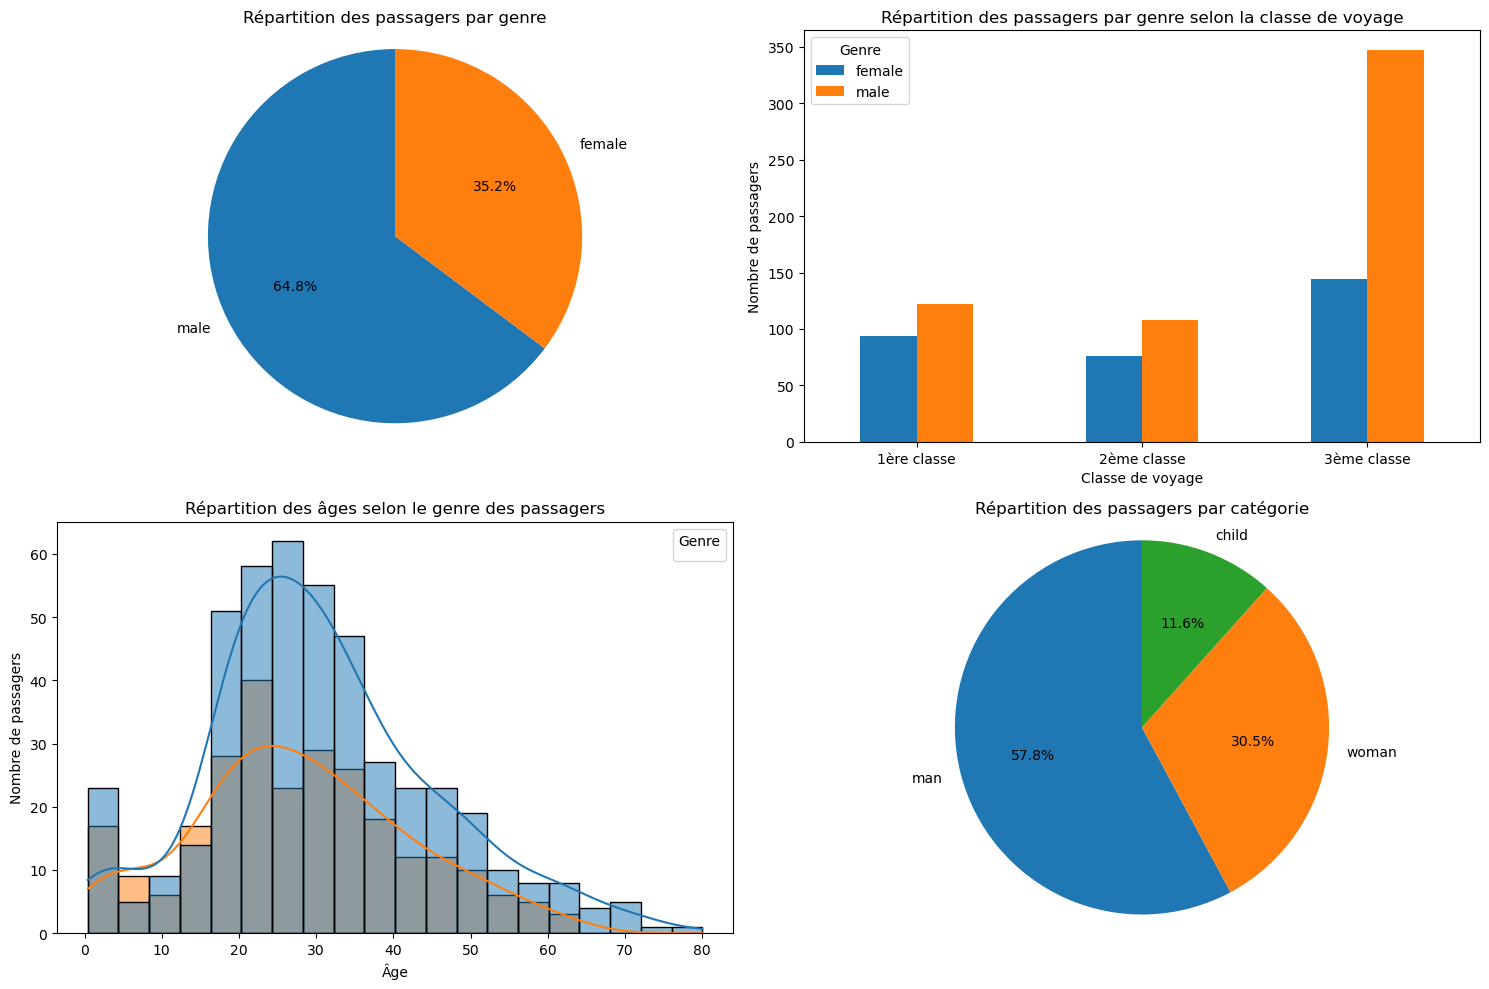

la moyenne d'age des passagés est de  29.69911764705882


In [ ]:
passagers_par_genre = df_titanic['sex'].value_counts()
passagers_par_classe = df_titanic.groupby(['pclass', 'sex']).size().unstack()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Diagramme circulaire
axes[0].pie(passagers_par_genre, labels=passagers_par_genre.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Répartition des passagers par genre')
axes[0].axis('equal')  # Assure que le diagramme est un cercle

# Passagers par classe et genre
passagers_par_classe.plot(kind='bar', stacked=None, ax=axes[1])
axes[1].set_title('Répartition des passagers par genre selon la classe de voyage')
axes[1].set_xlabel('Classe de voyage')
axes[1].set_ylabel('Nombre de passagers')
axes[1].legend(title='Genre')
axes[1].set_xticklabels(['1ère classe', '2ème classe', '3ème classe'], rotation=0)

# Histogramme des âges par genre
df_titanic_age = df_titanic.dropna(subset=['age'])
sns.histplot(data=df_titanic_age, x='age', hue='sex', kde=True, bins=20, ax=axes[2])
axes[2].set_title('Répartition des âges selon le genre des passagers')
axes[2].set_xlabel('Âge')
axes[2].set_ylabel('Nombre de passagers')
axes[2].legend(title='Genre')

# Répartition des passagers par catégorie
child = df_titanic_age['who'].value_counts()
axes[3].pie(child, labels=child.index, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Répartition des passagers par catégorie')
axes[3].axis('equal')  # Assurer que le diagramme est un cercle

plt.tight_layout()
plt.show()
print("la moyenne d'age des passagés est de ", df_titanic['age'].mean())

**interpretation :**  
1. Le diagramme circulaire montre que la majorité des passagers sont des hommes.
3. Le graphique à barres empilées montre que les hommes sont plus nombreux dans chaque classe de voyage.
4. L'histogramme des âges montre que les âges des passagers varient largement, avec une concentration plus élevée de jeunes passagers, et que les femmes et les hommes ont des distributions d'âge similaires.
5. Le diagramme circulaire final montre la répartition des passagers par catégorie (hommes, femmes, enfants), soulignant que les adultes constituent la majorité des passagers. Il y a un certain nombre d'enfants parmi les passagers(11.6%), et la moyenne d'âge est de 29.70 ans, ce qui suggère une population relativement jeune.

### Q3 (3pts)

Le Titanic possedait 7 ponts dévoués aux passagers, notés de A à G. A partir de la colonne "Cabin", présenter la distribution des passagers suivants leur pont. (3pts)

*Indication:* toutes les données ne sont pas bonnes ! Il faudra faire attention !

C:\Users\thouk\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


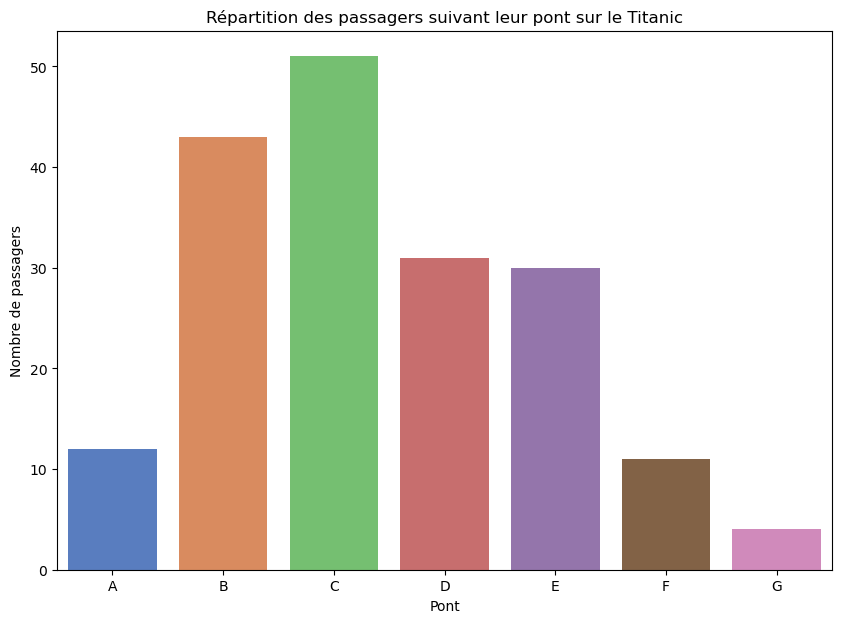

In [ ]:
# Supprimer les valeurs manquantes dans la colonne 'deck'
df_titanic_cabin = df_titanic.dropna(subset=['deck'])

# Créer un countplot pour visualiser la distribution des passagers suivant leur pont
sns.countplot(data=df_titanic_cabin, x='deck', palette='muted')

# Ajouter des titres et des étiquettes
plt.title('Répartition des passagers suivant leur pont sur le Titanic')
plt.xlabel('Pont')
plt.ylabel('Nombre de passagers')

# Afficher le graphique
plt.show()

### Q4 (3 pts)

Les trois villes d'embarquement étaient Cherbourg, Queenstown et Southhampton.

Montrer la répartion par classe suivant la ville de départ. Conclusion ?

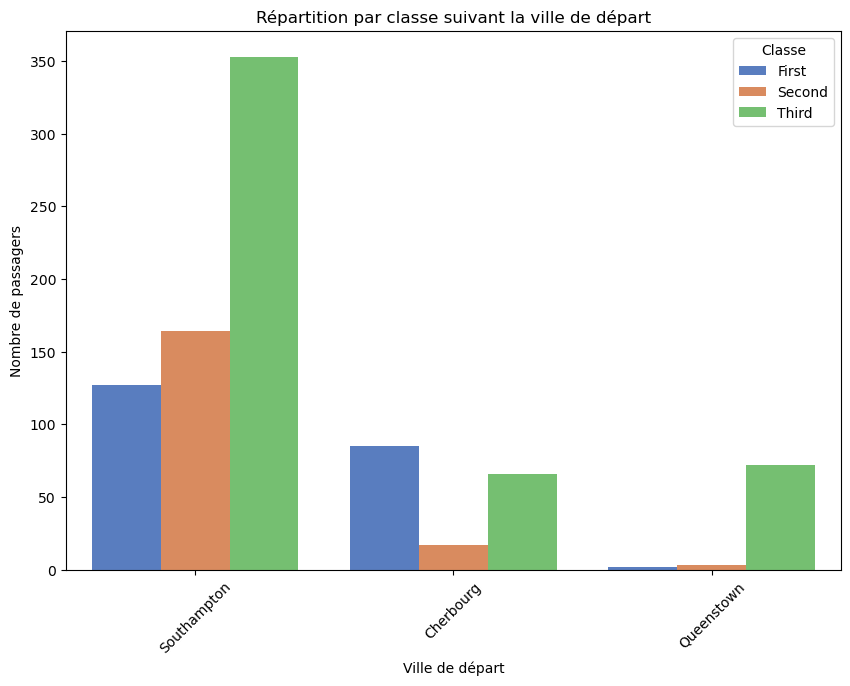

In [ ]:
#countplot avec Seaborn
sns.countplot(data=df_titanic, x='embark_town', hue='class', palette='muted')

# titres et des étiquettes
plt.title('Répartition par classe suivant la ville de départ')
plt.xlabel('Ville de départ')
plt.ylabel('Nombre de passagers')
plt.legend(title='Classe')

# affiche le graphique
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()

**Conclusion :**
- la majorité des passagers de premiere et 2nd classe ont pris leurs départ à Southampton et cherbourg, la majorité des passagers de 3e classe ont également pris leurs départ à Southompton.
- la ville de queenstown est la ville ayant eu le moins de passager au depart dans toute classe confondu
- la ville de Southampton est la ville ayant le plus de passager au depart


### Q5 (12 pts)
**ATTENTION**: cette question est volontairement ouverte. Vous êtes libres de la manière de résoudre le problème posé.

On veut savoir quels sont les facteurs qui favorisent la probabilité de survivre au naufrage du Titanic.

Vous pourrez mélanger parties de code et commentaires en Markdown pour rendre votre réponse interactive.

On s'attend à trouver :
* des visualisations pertinentes
* des choix d'estimateurs pertinents
* des interprétations des visualisations et résultats des estimateurs.

In [8]:
df_titanic = sns.load_dataset("titanic")
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Colonne deck**

Ajoutons la nouvelle catégorie "Unknown" aux catégories existantes.

**Colonne age**

Utilisons la médiane des âges pour remplir les valeurs manquantes.

**Colonnes embark_town et embarked**

Utilisons la valeur la plus fréquente (mode) pour remplir les valeurs manquantes.

## Pretraitement des valeurs manquantes.

In [9]:
# Ajout de la nouvelle catégorie 'Unknown' à la colonne 'deck'
df_titanic['deck'] = df_titanic['deck'].astype('category')
df_titanic['deck'] = df_titanic['deck'].cat.add_categories(['Unknown']).fillna('Unknown')

# Remplace les valeurs manquantes pour 'age'
df_titanic['age'].fillna(df_titanic['age'].median(), inplace=True)

# Remplacer les valeurs manquantes pour 'embark_town' et 'embarked'
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace=True)
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True)

df_titanic.isnull().sum()  # Vérification des valeurs manquantes

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

dataset traité

### 1- préparation des données

In [10]:
# nou devons Convertir les colonnes en type 'category' si nécessaire
categorical_columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

for col in categorical_columns:
    df_titanic[col] = df_titanic[col].astype('category')

# s'Assuré que la colonne 'survived' est de type numérique
df_titanic['survived'] = df_titanic['survived'].astype(int)

# on Vérifie les types de colonnes après conversion
df_titanic.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male     category
deck           category
embark_town    category
alive          category
alone          category
dtype: object

### 2- Analyse exploratoire

/tmp/ipykernel_80013/2895221341.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax1 = df_titanic.groupby(['sex', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[0, 0])
/tmp/ipykernel_80013/2895221341.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax2 = df_titanic.groupby(['class', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[0, 1])
/tmp/ipykernel_80013/2895221341.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

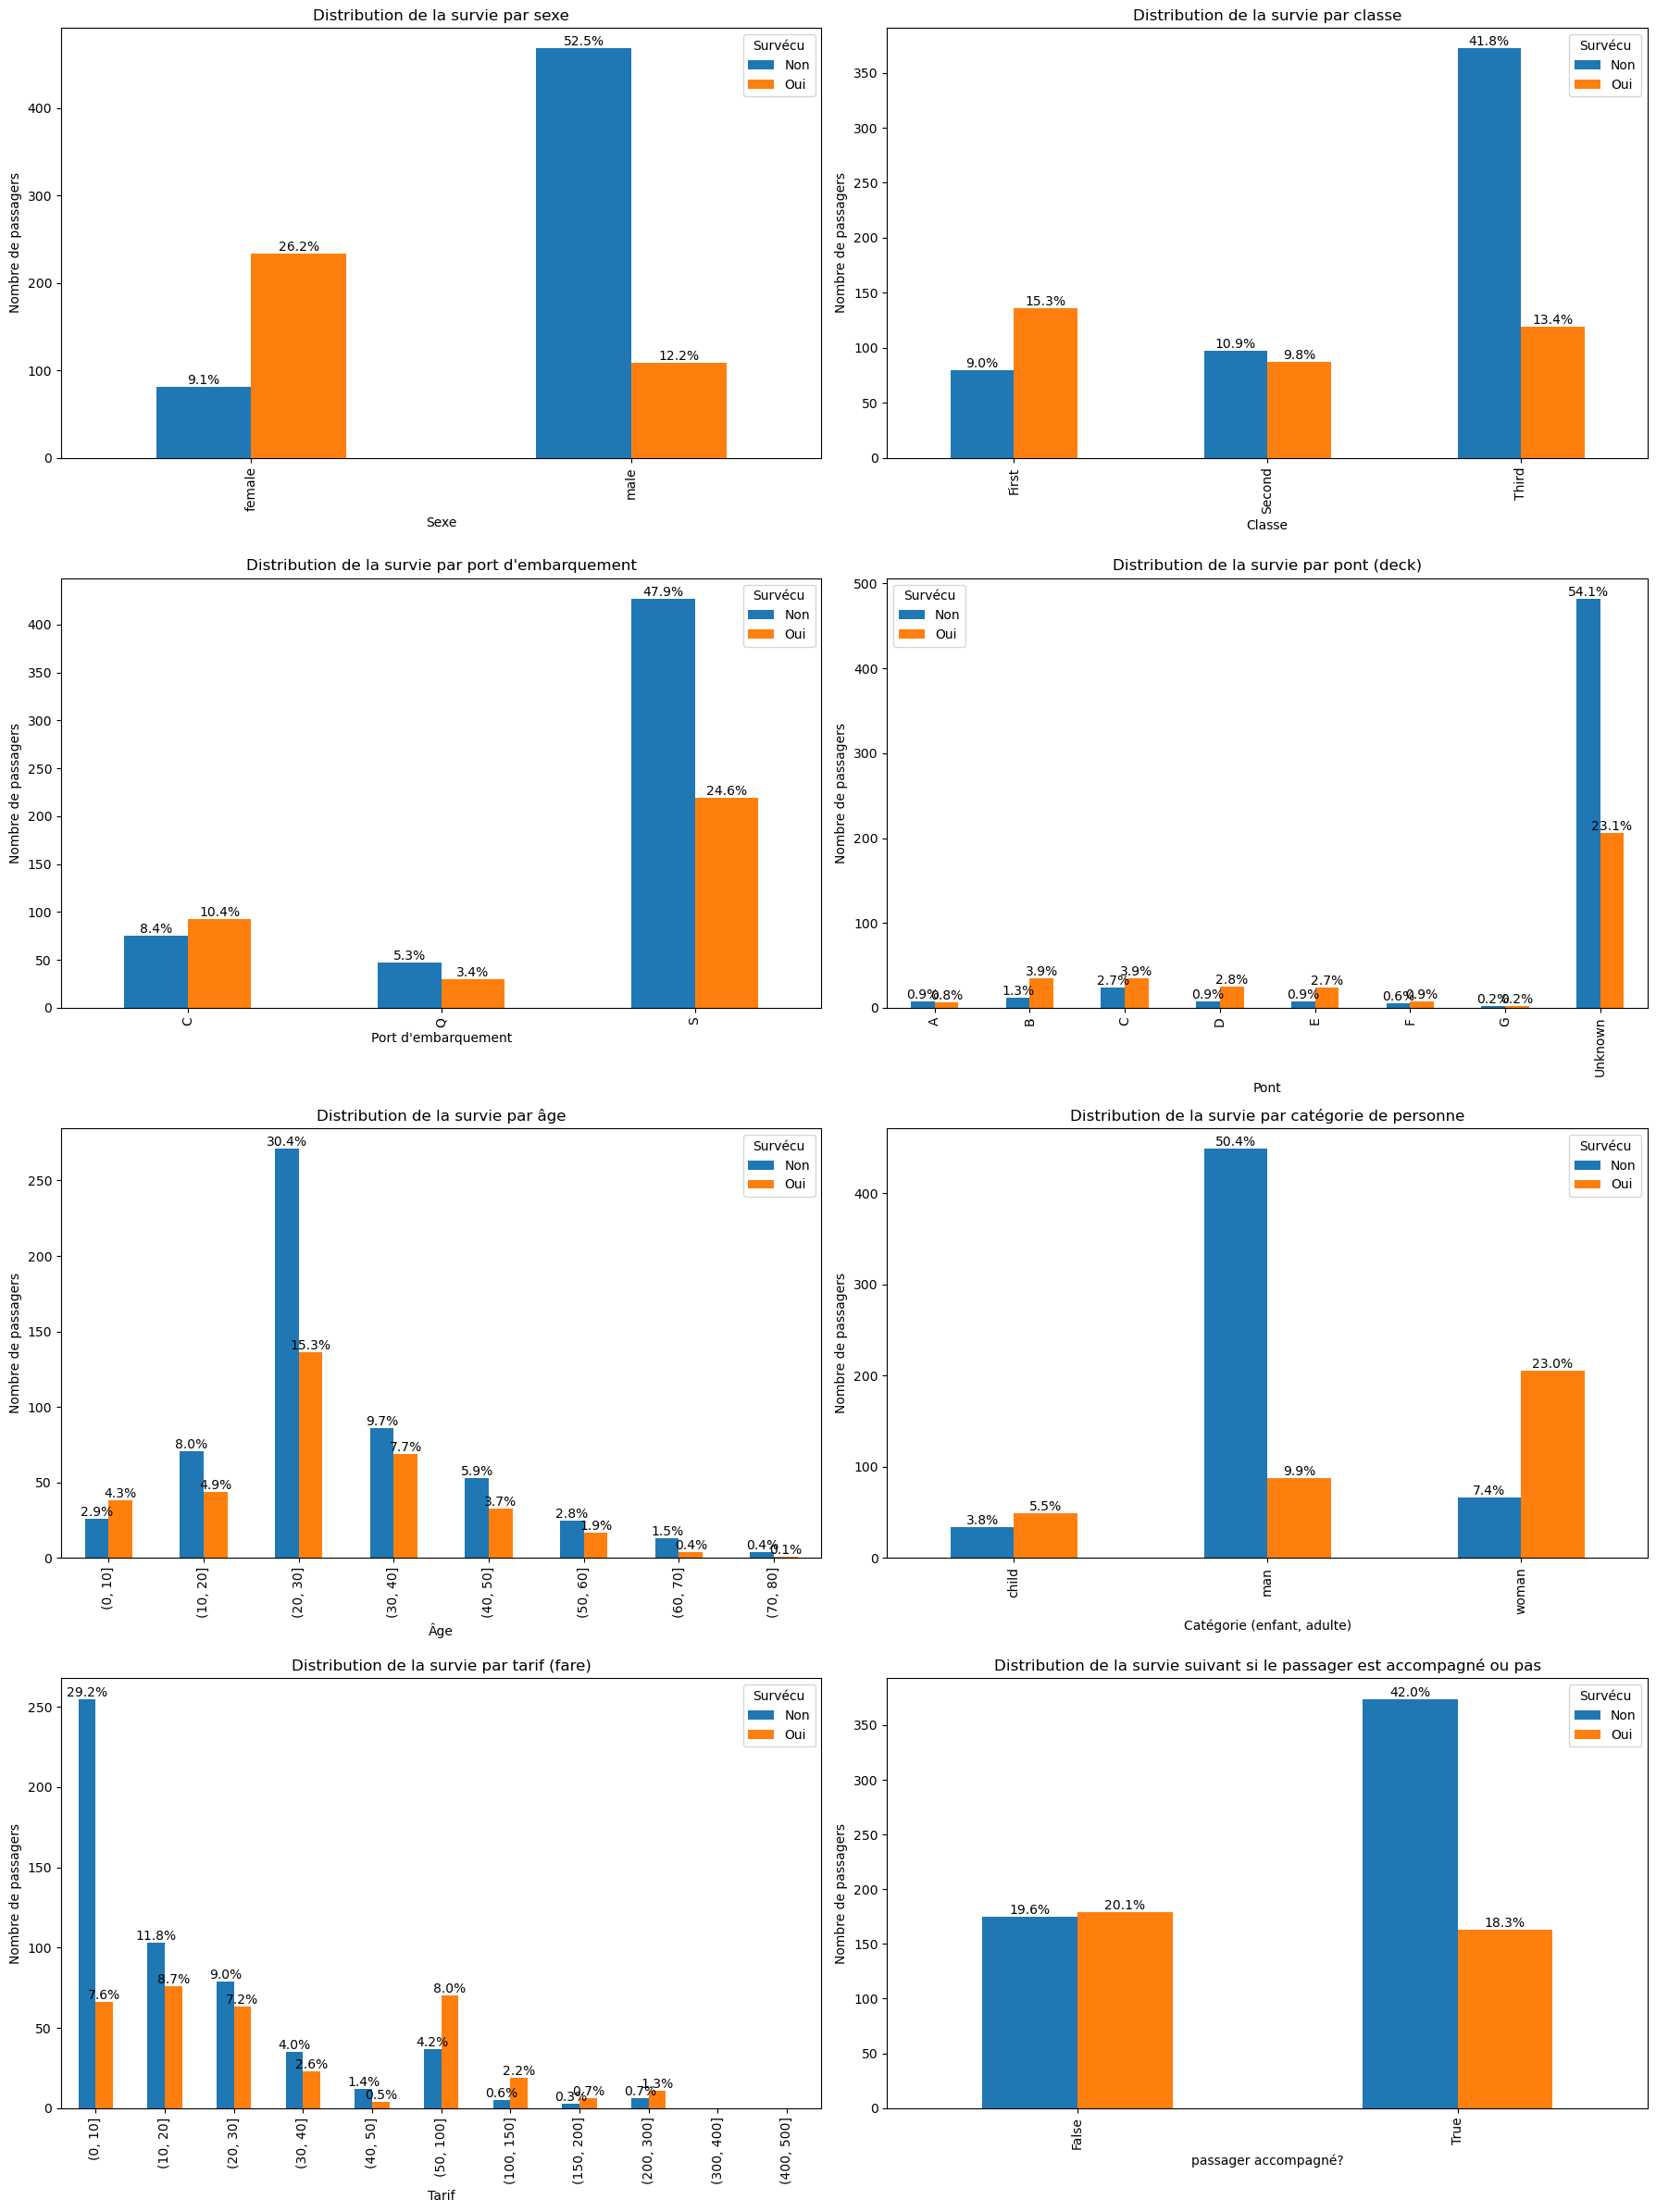

In [98]:

fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# Fonction pour ajouter les pourcentages sur les barres
def add_percentage(ax, total_counts):
    for p in ax.patches:
        if p.get_height() > 0:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Distribution de la survie par sexe
ax1 = df_titanic.groupby(['sex', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[0, 0])
axes[0, 0].set_title('Distribution de la survie par sexe')
axes[0, 0].set_xlabel('Sexe')
axes[0, 0].set_ylabel('Nombre de passagers')
axes[0, 0].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax1, df_titanic['sex'].value_counts().sum())

# Distribution de la survie par classe de cabine
ax2 = df_titanic.groupby(['class', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[0, 1])
axes[0, 1].set_title('Distribution de la survie par classe')
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Nombre de passagers')
axes[0, 1].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax2, df_titanic['class'].value_counts().sum())

# Distribution de la survie par port d'embarquement
ax3 = df_titanic.groupby(['embarked', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[1, 0])
axes[1, 0].set_title('Distribution de la survie par port d\'embarquement')
axes[1, 0].set_xlabel('Port d\'embarquement')
axes[1, 0].set_ylabel('Nombre de passagers')
axes[1, 0].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax3, df_titanic['embarked'].value_counts().sum())

# Distribution de la survie par pont (deck)
ax4 = df_titanic.groupby(['deck', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[1, 1])
axes[1, 1].set_title('Distribution de la survie par pont (deck)')
axes[1, 1].set_xlabel('Pont')
axes[1, 1].set_ylabel('Nombre de passagers')
axes[1, 1].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax4, df_titanic['deck'].value_counts().sum())

# Distribution de la survie par âge
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df_titanic['age_bin'] = pd.cut(df_titanic['age'], bins)
ax5 = df_titanic.groupby(['age_bin', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[2, 0])
axes[2, 0].set_title('Distribution de la survie par âge')
axes[2, 0].set_xlabel('Âge')
axes[2, 0].set_ylabel('Nombre de passagers')
axes[2, 0].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax5, df_titanic['age_bin'].value_counts().sum())

# Distribution de la survie par catégorie de personne
ax6 = df_titanic.groupby(['who', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[2, 1])
axes[2, 1].set_title('Distribution de la survie par catégorie de personne')
axes[2, 1].set_xlabel('Catégorie (enfant, adulte)')
axes[2, 1].set_ylabel('Nombre de passagers')
axes[2, 1].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax6, df_titanic['who'].value_counts().sum())

# Distribution de la survie par tarif (fare)
bins_fare = [0, 10, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500]
df_titanic['fare_bin'] = pd.cut(df_titanic['fare'], bins_fare)
ax7 = df_titanic.groupby(['fare_bin', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[3, 0])
axes[3, 0].set_title('Distribution de la survie par tarif (fare)')
axes[3, 0].set_xlabel('Tarif')
axes[3, 0].set_ylabel('Nombre de passagers')
axes[3, 0].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax7, df_titanic['fare_bin'].value_counts().sum())

# Distribution de la survie par alone
ax8 = df_titanic.groupby(['alone', 'survived']).size().unstack().plot(kind='bar', stacked=None, ax=axes[3, 1])
axes[3, 1].set_title('Distribution de la survie suivant si le passager est accompagné ou pas')
axes[3, 1].set_xlabel('passager accompagné?')
axes[3, 1].set_ylabel('Nombre de passagers')
axes[3, 1].legend(title='Survécu', labels=['Non', 'Oui'])
add_percentage(ax8, df_titanic['alone'].value_counts().sum())

plt.tight_layout()
plt.show()

**Interprétation des Visualisations**

- **Distribution de la survie par sexe**
Les femmes ont un taux de survie significativement plus élevé que les hommes.
Les femmes représentent environ 26.2% des survivants tandis que les hommes représentent environ 12.2%.

- **Distribution de la survie par classe de cabine**
Les passagers de première classe ont le taux de survie le plus élevé, suivis par ceux de la troisième classe, puis de la deuxième classe.
Environ 15.3% des passagers de première classe ont survécu, comparé à environ 9.8% pour la deuxième classe et 13.4% pour la troisième classe.

- **Distribution de la survie par port d'embarquement**
    Les passagers embarqués à Southampton ont un taux de survie plus élevé que ceux embarqués à Cherbourg et Queenstown.
    Environ 24.6% des passagers embarqués à Southampton ont survécu, contre environ 10.4% pour Cherbourg et 3.4% pour Queenstown.

- **Distribution de la survie par pont (deck)**
    Les passagers situés sur certains ponts comme le pont C et B ont un taux de survie plus élevé.
    Environ 3.9% des passagers sur le pont C et B ont survécu, tandis que ceux sur les ponts moins prestigieux ont un taux de survie plus bas.
    et les passager inconnue ont le plus grand taux de survie avec 23.3% des passagers qui ont survécu.

- **Distribution de la survie par âge**
    Les jeunes passagers ont tendance à avoir un taux de survie plus élevé. La densité de survie diminue avec l'âge.
    Les passagers âgés de 20 à 30 ans ont le taux de survie le plus élevé (environ 15.3%).

- **Distribution de la survie par catégorie de personne (who)**
    Les femmes et hommes ont un taux de survie plus élevé que les enfants.
    Environ 23.0% des femmes et environ 20.7% des hommes adultes ont survécu, contre seulement environ 5.5% des enfants.

- **Distribution de la survie par tarif (fare)**
    Les passagers payant un tarif plus élevé ont un taux de survie plus bas.
    Les passagers payant entre 0 et 50 ont un taux de survie de 26.6%, et ceux payant entre 50 et 500 ont un taux de survie de 12.2%.

- **Distribution de la survie par fait d'être seul (alone)**
    Les passagers voyageant seuls ont un taux de survie plus élevé.
    Environ 20.1% des passagers voyageant seuls ont survécu, contre environ 18.3% des passagers voyageant avec des membres de leur famille.

Conclusion
Les principaux facteurs influençant la survie lors du naufrage du Titanic incluent le sexe, la classe de cabine, le pont, l'âge, et le port d'embarquement. Les femmes, les jeunes adultes, les passagers de première classe, et ceux embarquant à Southampton avaient de meilleures chances de survie.

### Modelisation

##### preparartion des donnees

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Sélection des features et de la target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']
X = df_titanic[features]
y = df_titanic['survived']

# Encodage des variables catégorielles
X = pd.get_dummies(X, columns=['pclass', 'sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone'], drop_first=True)

# Standardisation des variables numériques
scaler = StandardScaler()
X[['age', 'sibsp', 'parch', 'fare']] = scaler.fit_transform(X[['age', 'sibsp', 'parch', 'fare']])

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df_titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  28.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who adult_male     deck  embark_town alive  

Nous allons utiliser deux modèles : la régression logistique et les forêts aléatoires.

##### Modelisation

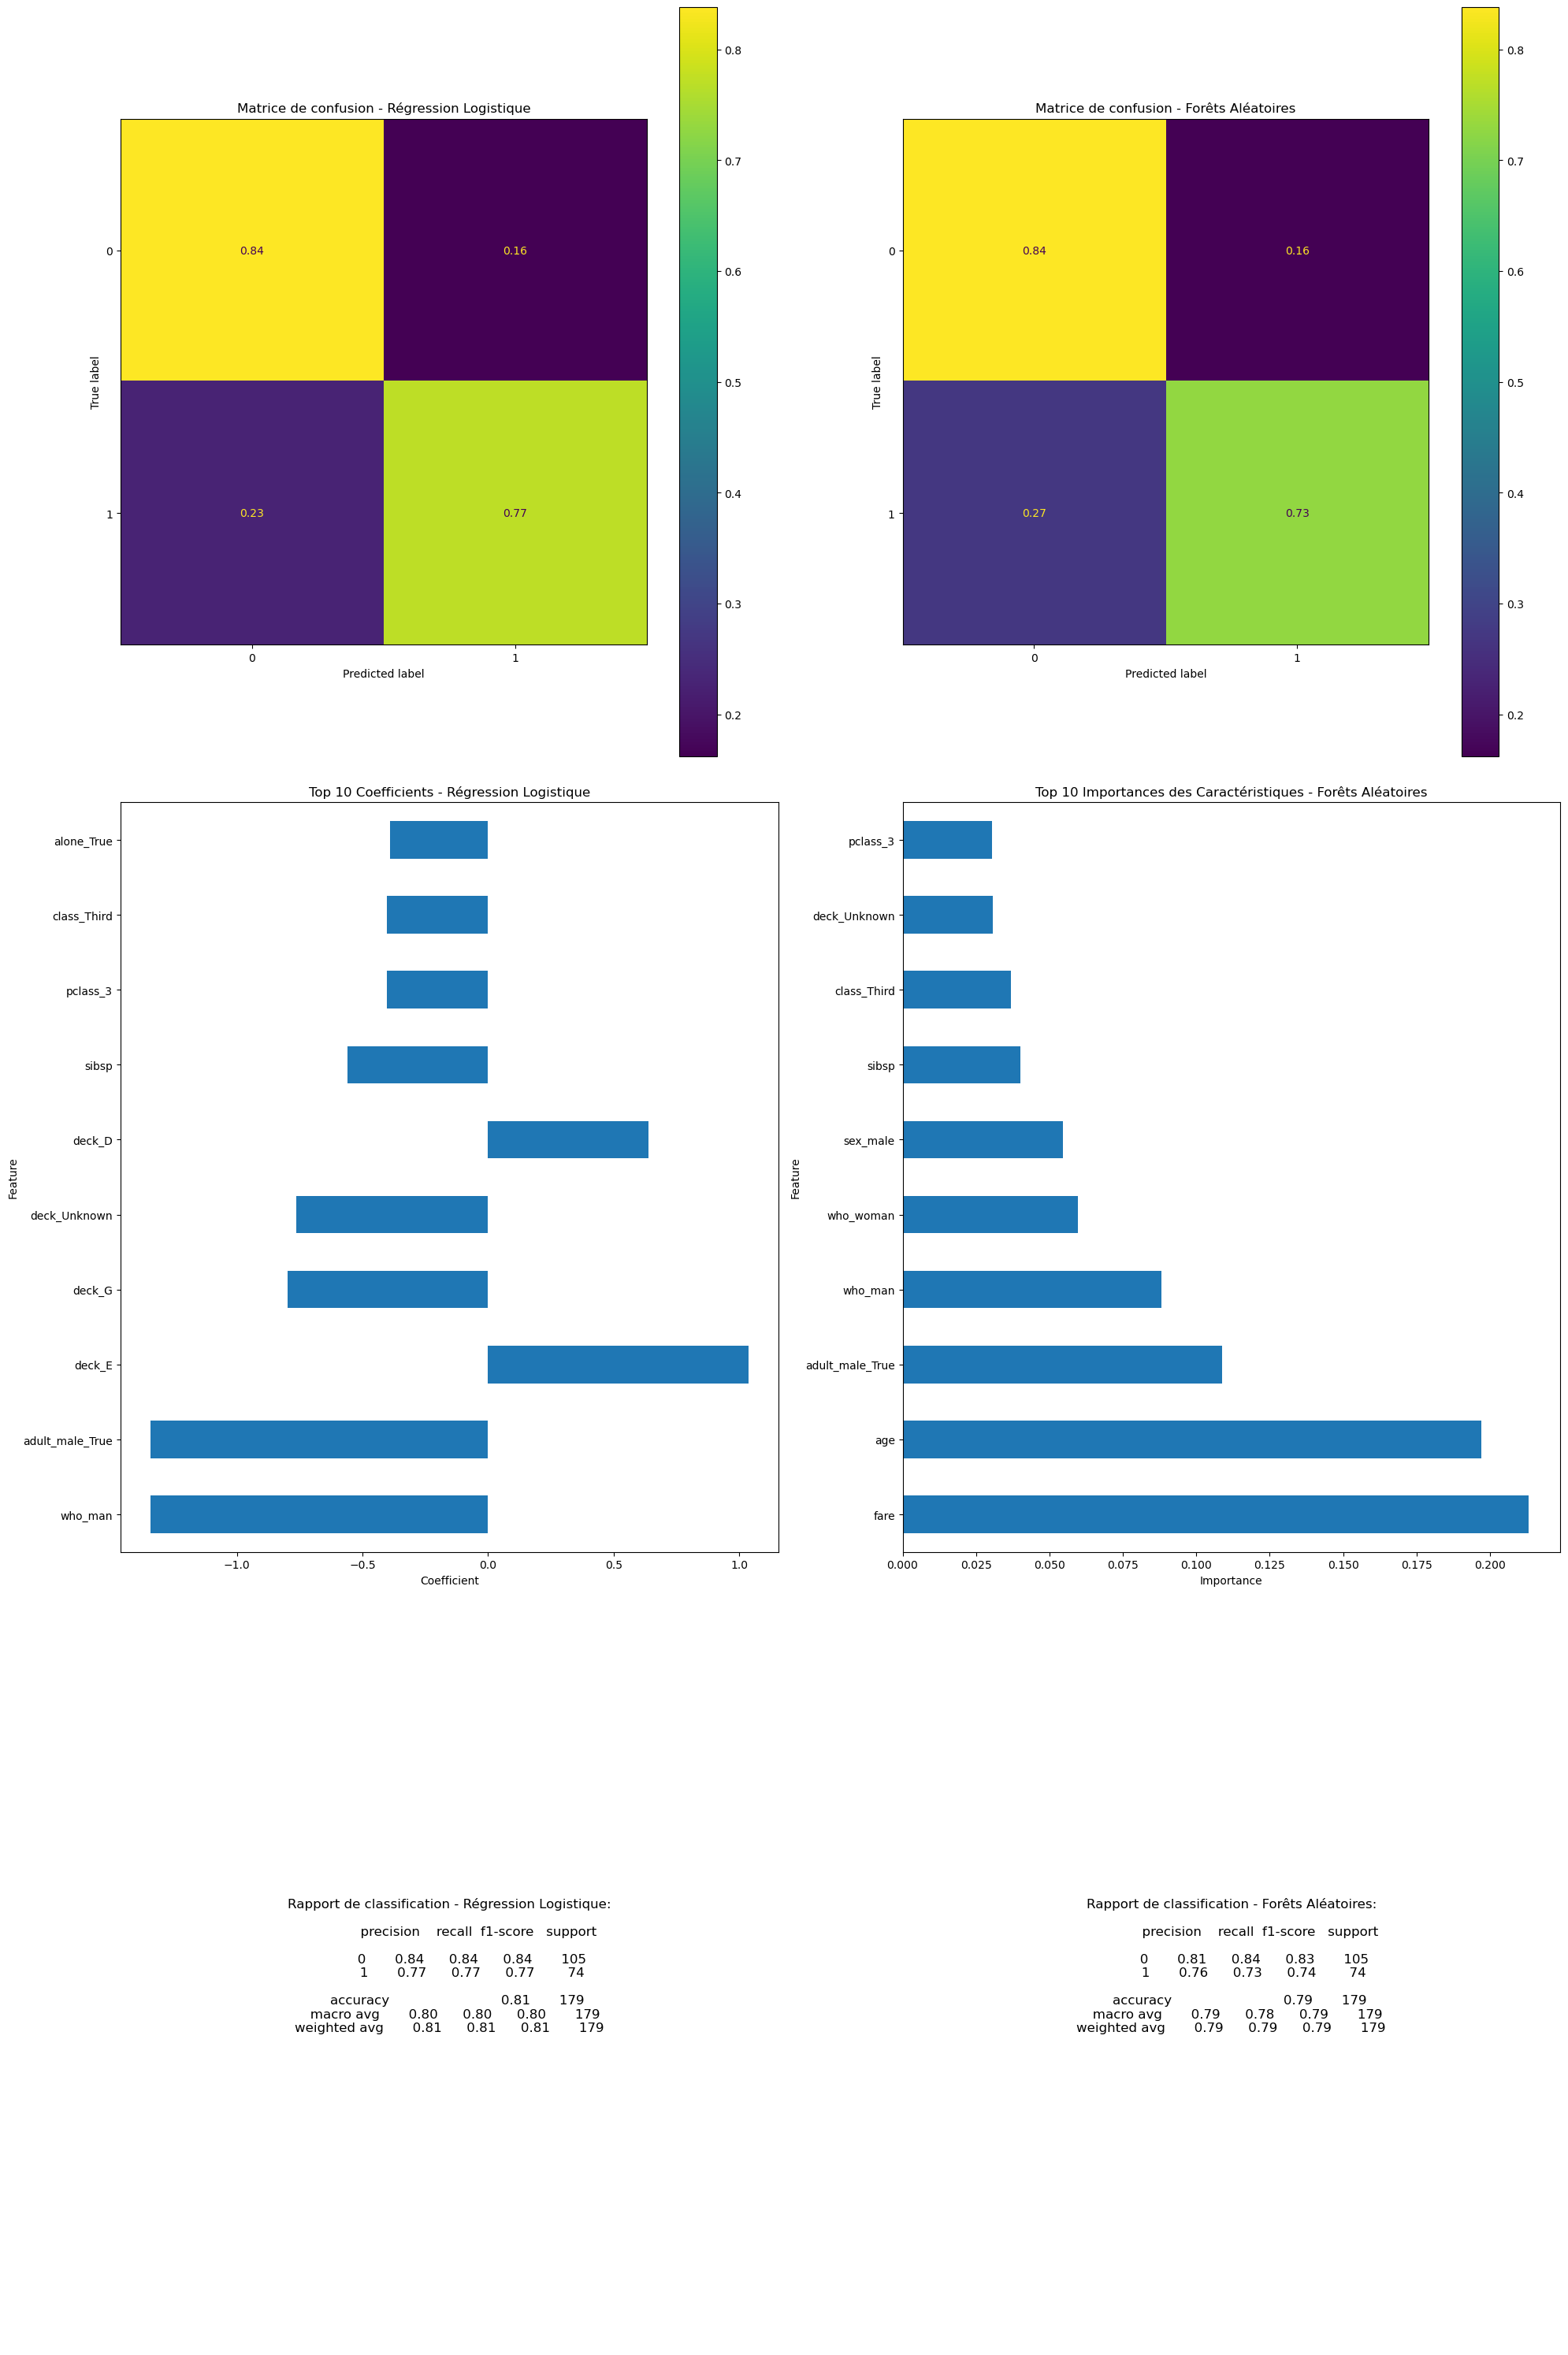

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Régression Logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Forêts Aléatoires
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Création de la figure
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

# Matrice de confusion pour la Régression Logistique
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test,normalize='true', ax=axes[0, 0])
axes[0, 0].set_title('Matrice de confusion - Régression Logistique')

# Matrice de confusion pour les Forêts Aléatoires
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize='true',ax=axes[0, 1])
axes[0, 1].set_title('Matrice de confusion - Forêts Aléatoires')

# Coefficients de la Régression Logistique
coefficients = logreg.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
coef_df.head(10).plot(kind='barh', x='Feature', y='Coefficient', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Coefficients - Régression Logistique')
axes[1, 0].set_xlabel('Coefficient')
axes[1, 0].set_ylabel('Feature')

# Importances des caractéristiques des Forêts Aléatoires
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Importances des Caractéristiques - Forêts Aléatoires')
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_ylabel('Feature')

# Rapport de classification pour la Régression Logistique
axes[2, 0].axis('off')
axes[2, 0].text(0.5, 0.5, f"Rapport de classification - Régression Logistique:\n\n{classification_report(y_test, y_pred_logreg)}", 
                horizontalalignment='center', verticalalignment='center', fontsize=12)

# Rapport de classification pour les Forêts Aléatoires
axes[2, 1].axis('off')
axes[2, 1].text(0.5, 0.5, f"Rapport de classification - Forêts Aléatoires:\n\n{classification_report(y_test, y_pred_rf)}", 
                horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

### Conclusion:

- La régression logistique est légèrement plus efficace pour prédire la survie des passagers du Titanic, offrant une meilleure précision globale et un bon équilibre entre les différentes métriques de performance.

### Problème - Conception de Features et classifications (30 pts)

Cet exercice est une grande question ouverte. Vous êtes libres de proposez vos solutions, sous réserve de justification.

L'idée est ici de vous laisser choisir des éléments que vous pensez être pertinents, les extraire et les valoriser.

Le dataset de travail sera disponible ici : https://www.data.gouv.fr/fr/datasets/indicateurs-de-qualite-de-service-sncf-et-ratp/

On pourra par exemple penser à :
* Des prévisions sur les prochains trimestres pour un ou plusieurs thèmes
* L'évolution de certaines variables en fonction des lignes et les comparaisons pertinentes
* Comparaison satisfaction SNCF/RATP sur des points communs
* La validation des objectifs en fonction des lignes/prestatataires/mode de transport.
* etc...

Pour cet exercice, la démarche autant que les résultats seront valorisés.
Une démarche intéressante pourrait être de partir d'un a priori et le confirmer ou l'infirmer avec les données pertinentes.


# Etape 1 : Exploration des données  
Tout d'abord, téléchargeons et chargeons les données dans un DataFrame pour l'analyse

In [59]:
# Charger le dataset
df = pd.read_csv("indicateurs-qualite-service-sncf-ratp.csv", sep=';')
# Afficher les premières lignes du dataset
# Vérifier les valeurs manquantes
print(df.info())
print("--------------------------------------------------")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6993 entries, 0 to 6992
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   operatorname               6993 non-null   object 
 1   theme                      6993 non-null   object 
 2   indicator                  6993 non-null   object 
 3   transportmode              6993 non-null   object 
 4   transportsubmode           2007 non-null   object 
 5   id_line                    6330 non-null   object 
 6   name_line                  6616 non-null   object 
 7   trimester                  6993 non-null   object 
 8   year                       6993 non-null   int64  
 9   percent_result             4553 non-null   float64
 10  occurrence_result          239 non-null    float64
 11  target_reference_contract  6621 non-null   float64
 12  penality                   6993 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage:

operatorname                  theme  \
0         SNCF  Information voyageurs   
1         SNCF  Information voyageurs   
2         SNCF  Information voyageurs   
3         SNCF  Information voyageurs   
4         SNCF  Information voyageurs   

                                           indicator transportmode  \
0  Information voyageurs  statique en situation n...         Train   
1  Information voyageurs  statique en situation n...           RER   
2  Information voyageurs  statique en situation n...           RER   
3  Information voyageurs  statique en situation n...           RER   
4  Information voyageurs  statique en situation n...         Train   

  transportsubmode id_line name_line trimester  year  percent_result  \
0              NaN  C01738         N        T1  2022            95.4   
1              NaN  C01742         A        T2  2022           100.0   
2              NaN  C01743         B        T2  2022           100.0   
3              NaN  C01729         E        T2  2022            96.8   
4              NaN  C01736         K        T3  2022           100.0   

   occurrence_result  target_reference_contract penality  
0                NaN                       98.0      Non  
1                NaN                       98.0      Non  
2                NaN                       98.0      Non  
3                NaN                       98.0      Non  
4                NaN                       98.0      Non

# etape 2 : Analyse des valeurs manquantes

In [60]:
print(df.isnull().sum())

operatorname                    0
theme                           0
indicator                       0
transportmode                   0
transportsubmode             4986
id_line                       663
name_line                     377
trimester                       0
year                            0
percent_result               2440
occurrence_result            6754
target_reference_contract     372
penality                        0
dtype: int64



transportsubmode, id_line, name_line, percent_result, occurrence_result, et target_reference_contract contiennent des valeurs manquantes.

# etape 3: Traitement des valeurs manquantes

In [61]:
# Remplacer les valeurs manquantes de 'transportsubmode' par 'Unknown'
df['transportsubmode'].fillna('Unknown', inplace=True)

# Remplacer les valeurs manquantes de 'id_line' et 'name_line' par 'Unknown'
df['id_line'].fillna('Unknown', inplace=True)
df['name_line'].fillna('Unknown', inplace=True)

# Supprimer les lignes où 'percent_result' est manquant car c'est une variable critique
df.dropna(subset=['percent_result'], inplace=True)

# Remplacer les valeurs manquantes de 'occurrence_result' par la moyenne des valeurs disponibles
df['occurrence_result'].fillna(df['occurrence_result'].mean(), inplace=True)

# Remplacer les valeurs manquantes de 'target_reference_contract' par la moyenne des valeurs disponibles
df['target_reference_contract'].fillna(df['target_reference_contract'].mean(), inplace=True)

# Vérifier que les valeurs manquantes ont été traitées
print(df.isnull().sum())


operatorname                 0
theme                        0
indicator                    0
transportmode                0
transportsubmode             0
id_line                      0
name_line                    0
trimester                    0
year                         0
percent_result               0
occurrence_result            0
target_reference_contract    0
penality                     0
dtype: int64


## Comparaison satisfaction SNCF/RATP sur des points communs

/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

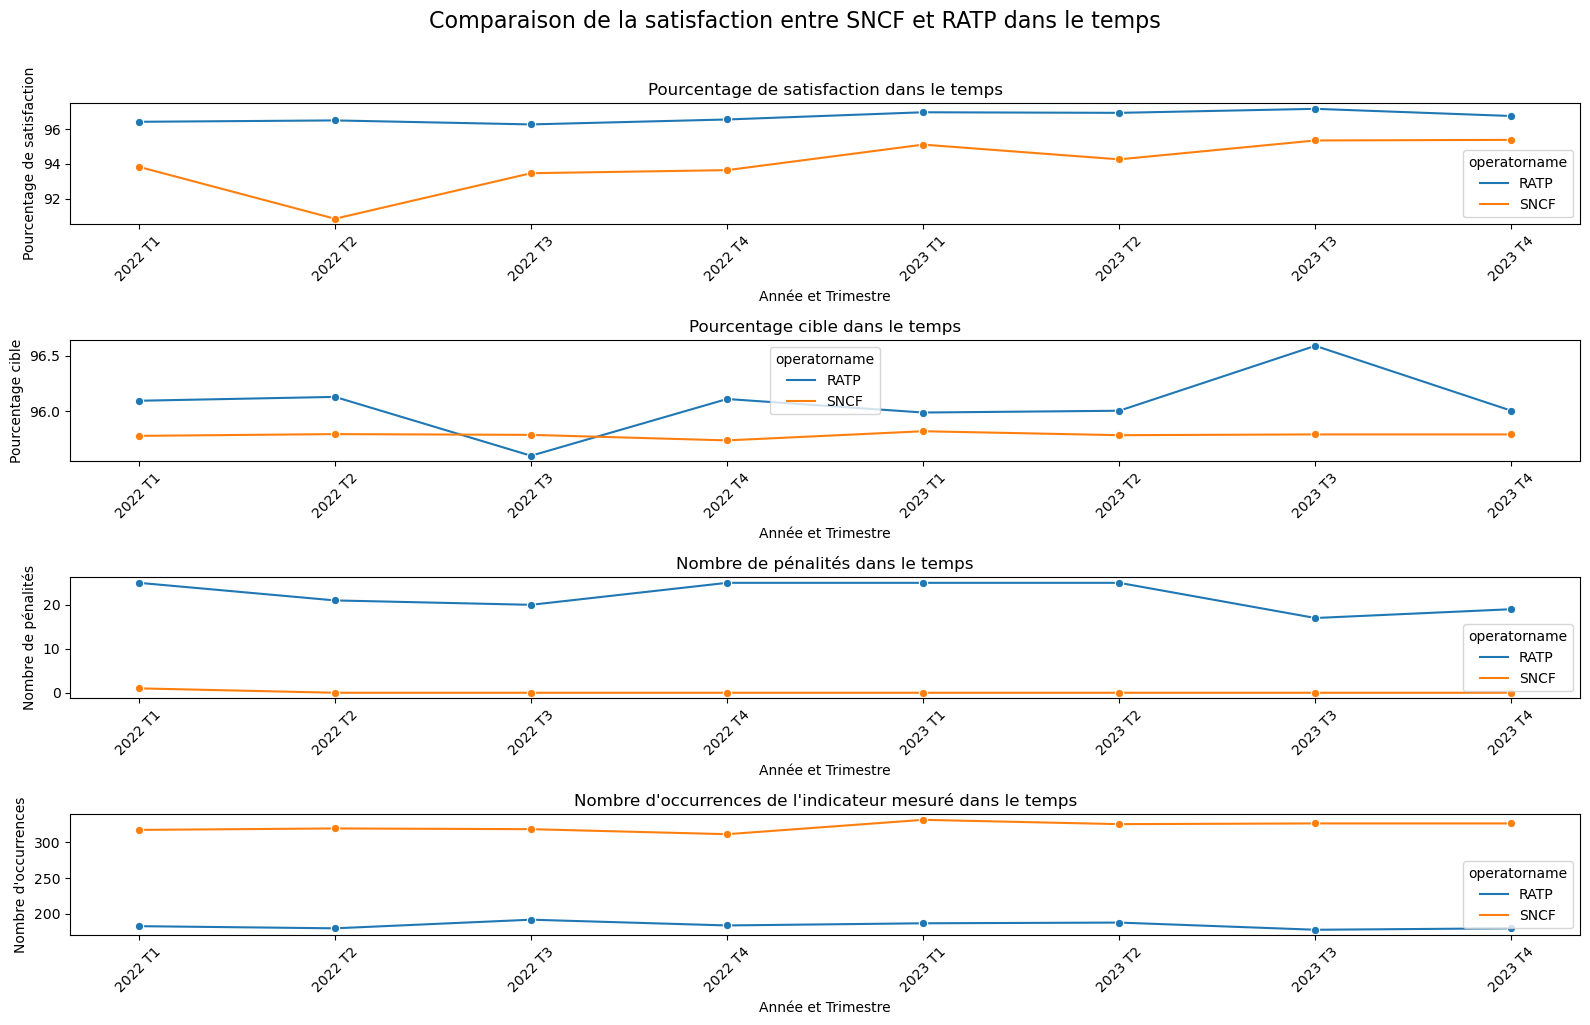

In [49]:
# Fusionner les colonnes année et trimestre pour une meilleure visualisation
df['year_trimester'] = df['year'].astype(str) + ' T' + df['trimester'].str.extract('(\d)')[0]

# Calculer les métriques pour chaque opérateur, année et trimestre
metrics = df.groupby(['operatorname', 'year', 'trimester', 'year_trimester']).agg({
    'percent_result': 'mean',
    'target_reference_contract': 'mean',
    'penality': lambda x: (x == 'Oui').sum(),
    'indicator': 'count'
}).reset_index()

# Calculer la différence entre le pourcentage de satisfaction et le pourcentage cible
metrics['satisfaction_gap'] = metrics['percent_result'] - metrics['target_reference_contract']

# Filtrer pour SNCF et RATP
metrics_sncf_ratp = metrics[metrics['operatorname'].isin(['SNCF', 'RATP'])]

# Création des sous-graphiques
fig, axes = plt.subplots(4, 1, figsize=(16, 10), constrained_layout=True)

# Pourcentage de satisfaction
sns.lineplot(data=metrics_sncf_ratp, x='year_trimester', y='percent_result', hue='operatorname', marker='o', ax=axes[0])
axes[0].set_title('Pourcentage de satisfaction dans le temps')
axes[0].set_xlabel('Année et Trimestre')
axes[0].set_ylabel('Pourcentage de satisfaction')
axes[0].tick_params(axis='x', rotation=45)

# Pourcentage cible
sns.lineplot(data=metrics_sncf_ratp, x='year_trimester', y='target_reference_contract', hue='operatorname', marker='o', ax=axes[1])
axes[1].set_title('Pourcentage cible dans le temps')
axes[1].set_xlabel('Année et Trimestre')
axes[1].set_ylabel('Pourcentage cible')
axes[1].tick_params(axis='x', rotation=45)

# Nombre de pénalités
sns.lineplot(data=metrics_sncf_ratp, x='year_trimester', y='penality', hue='operatorname', marker='o', ax=axes[2])
axes[2].set_title('Nombre de pénalités dans le temps')
axes[2].set_xlabel('Année et Trimestre')
axes[2].set_ylabel('Nombre de pénalités')
axes[2].tick_params(axis='x', rotation=45)

# Nombre d'occurrences de l'indicateur mesuré
sns.lineplot(data=metrics_sncf_ratp, x='year_trimester', y='indicator', hue='operatorname', marker='o', ax=axes[3])
axes[3].set_title('Nombre d\'occurrences de l\'indicateur mesuré dans le temps')
axes[3].set_xlabel('Année et Trimestre')
axes[3].set_ylabel('Nombre d\'occurrences')
axes[3].tick_params(axis='x', rotation=45)

plt.suptitle('Comparaison de la satisfaction entre SNCF et RATP dans le temps', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_113707/317776119.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


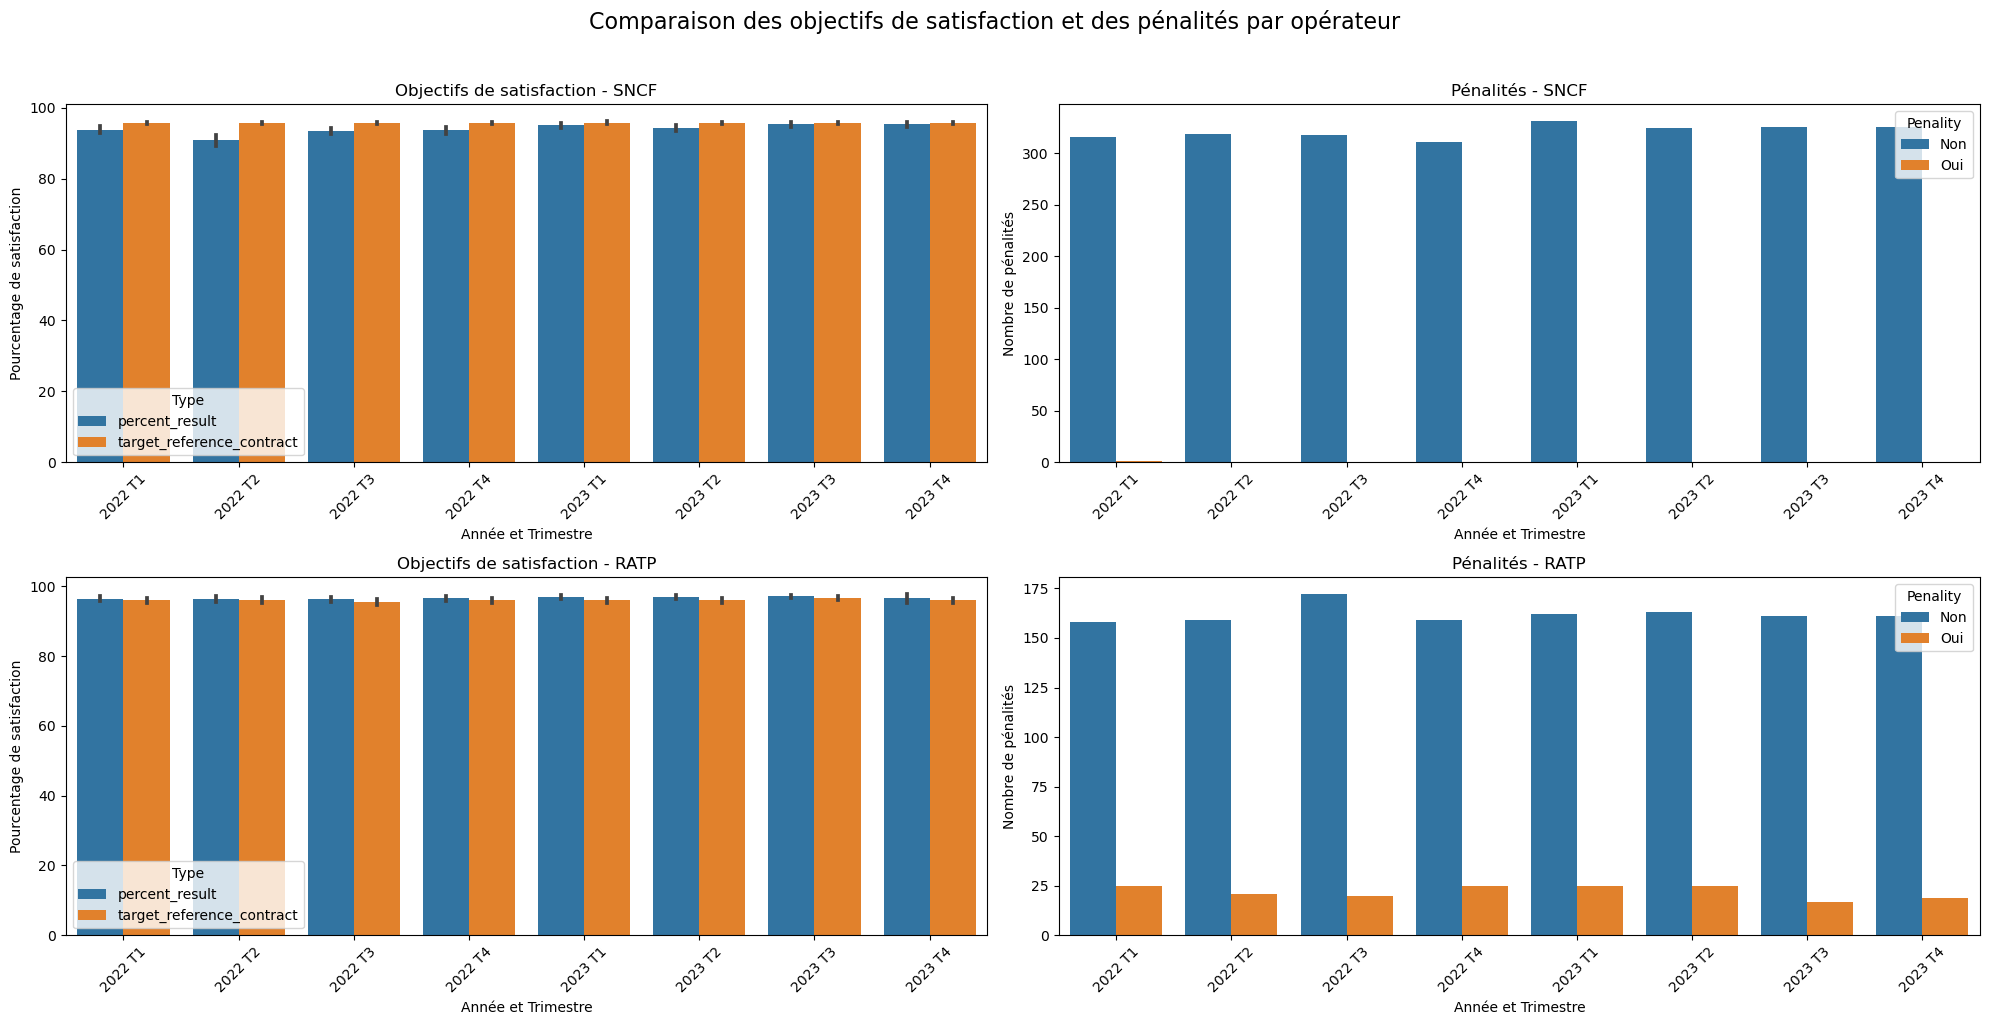

In [45]:
# Liste des opérateurs
operators = df['operatorname'].unique()

# Création de la figure combinée
num_operators = len(operators)
cols = 2  # Une colonne pour les objectifs, une pour les pénalités
rows = num_operators  # Une ligne pour chaque opérateur

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * num_operators), constrained_layout=True)
axes = axes.flatten()

for i, operator in enumerate(operators):
    operator_data = df[df['operatorname'] == operator]
    operator_data = operator_data.sort_values(by=['year', 'trimester'])

    # Bar plots des objectifs atteints et à atteindre
    melted_data_objectives = operator_data.melt(id_vars=['year_trimester'], value_vars=['percent_result', 'target_reference_contract'], 
                                                var_name='Type', value_name='Value')
    sns.barplot(data=melted_data_objectives, x='year_trimester', y='Value', hue='Type', ax=axes[i * 2])
    axes[i * 2].set_title(f'Objectifs de satisfaction - {operator}')
    axes[i * 2].set_xlabel('Année et Trimestre')
    axes[i * 2].set_ylabel('Pourcentage de satisfaction')
    axes[i * 2].tick_params(axis='x', rotation=45)

    # Bar plots des pénalités
    penalty_data = operator_data.groupby(['year_trimester', 'penality']).size().unstack(fill_value=0).reset_index()
    melted_data_penalties = penalty_data.melt(id_vars=['year_trimester'], value_vars=['Non', 'Oui'], 
                                              var_name='Penality', value_name='Count')
    sns.barplot(data=melted_data_penalties, x='year_trimester', y='Count', hue='Penality', ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f'Pénalités - {operator}')
    axes[i * 2 + 1].set_xlabel('Année et Trimestre')
    axes[i * 2 + 1].set_ylabel('Nombre de pénalités')
    axes[i * 2 + 1].tick_params(axis='x', rotation=45)

plt.suptitle('Comparaison des objectifs de satisfaction et des pénalités par opérateur', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Les visualisations fournissent une vue d'ensemble claire de la performance des opérateurs SNCF et RATP en termes de satisfaction des clients, d'atteinte des objectifs de satisfaction, et de pénalités au fil du temps. Voici les principales conclusions que l'on peut tirer de ces analyses :

- **Pourcentage de satisfaction dans le temps** :
    Les courbes de satisfaction montrentque le pourcentage de satisfaction est plutot constant pour l'operateur RATP avec une légére baisse au troisiéme trimestre de 2022 et en fon de trimestre de 2023, tandis que l'operateur SNCF a subit une baisse conséquente au deuxiéme trimestre de 2022 et quelques légere difficulté en fin de trimestre de 2022 et au deuxiéme trimestre de 2023. le pourcentage de satisfaction est donc plus stable chez RATP 

- **Pourcentage cible dans le temps** :
    la visualisation nous montre que malgrés la variabilité des objectifs de RATP, ils ont toujours pu atteindre leurs objectifs contrairement à SNCF qui n'a pas pu atteindre ces objectifs le 2e trimestre de 2O22 malgrés une légere constante des objectifs fixé tout au long des 2 ans 

- **Nombre de pénalités dans le temps** :
    le nombre de penalité est trés variable chez RATP, entre 20 et 25 penalité par trimestre contrairement à SNCF qui en sort indem avec 0 penalité tout au long des 2 ans 

- **Nombre d'occurrences de l'indicateur mesuré** :
    Le nombre d'occurrences de l'indicateur mesuré semble bien etre legerement constant pour les 2 operateurs, neanmoins il est trés elevé chez SNCF contrairement à RATP qui est trés bas, il montre que SNCF est serieuse avec les évaluations et des actions correctives efficaces pour s'ameliorer.


# L'évolution de certaines variables en fonction des lignes

/tmp/ipykernel_113707/2990357159.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


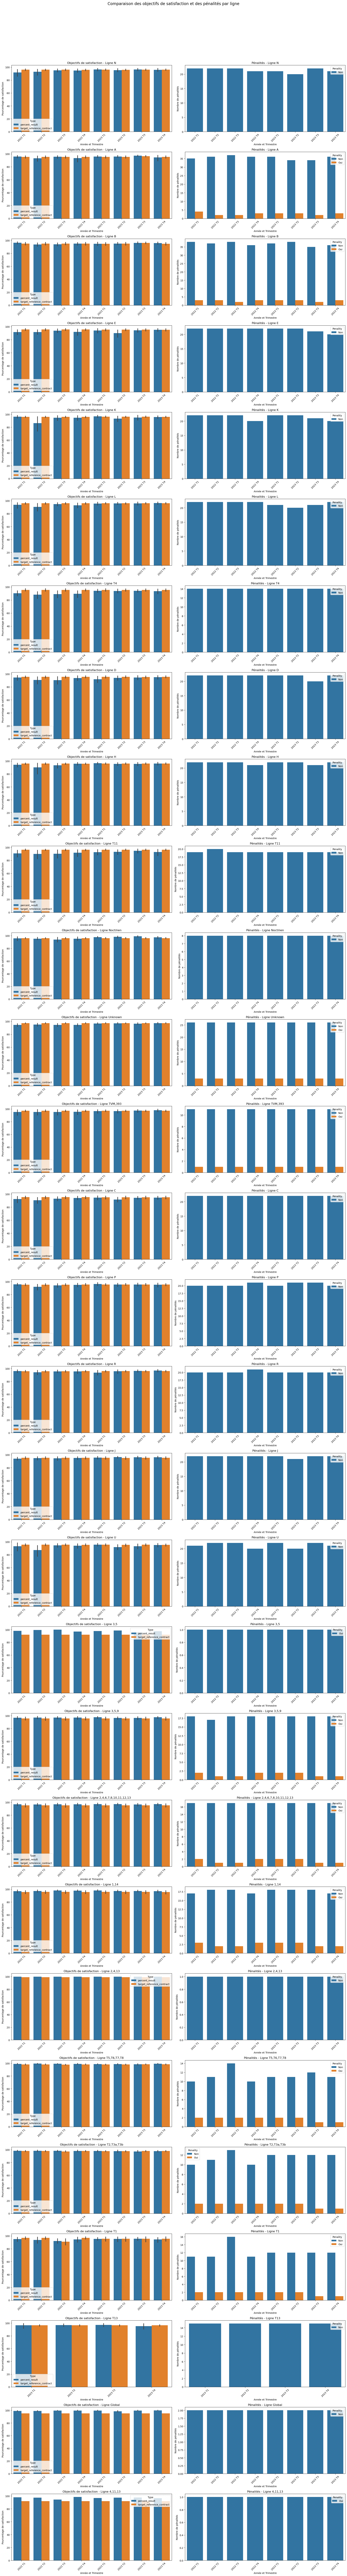

In [48]:
# Fusionner les colonnes année et trimestre pour une meilleure visualisation
df['year_trimester'] = df['year'].astype(str) + ' T' + df['trimester'].str.extract('(\d)')[0]


# Liste des lignes
lines = df['name_line'].unique()

# Création de la figure combinée
num_lines = len(lines)
cols = 2  # Une colonne pour les objectifs, une pour les pénalités
rows = num_lines  # Une ligne pour chaque ligne

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * num_lines), constrained_layout=True)
axes = axes.flatten()

for i, line in enumerate(lines):
    line_data = df[df['name_line'] == line]
    line_data = line_data.sort_values(by=['year', 'trimester'])

    # Bar plots des objectifs atteints et à atteindre
    melted_data_objectives = line_data.melt(id_vars=['year_trimester'], value_vars=['percent_result', 'target_reference_contract'], 
                                            var_name='Type', value_name='Value')
    sns.barplot(data=melted_data_objectives, x='year_trimester', y='Value', hue='Type', ax=axes[i * 2])
    axes[i * 2].set_title(f'Objectifs de satisfaction - Ligne {line}')
    axes[i * 2].set_xlabel('Année et Trimestre')
    axes[i * 2].set_ylabel('Pourcentage de satisfaction')
    axes[i * 2].tick_params(axis='x', rotation=45)

    # Bar plots des pénalités
    penalty_data = line_data.groupby(['year_trimester', 'penality']).size().unstack(fill_value=0).reset_index()


    # Convertir les données en format long pour un tracé plus simple
    melted_data_penalties = penalty_data.melt(id_vars=['year_trimester'], var_name='Penality', value_name='Count')
    sns.barplot(data=melted_data_penalties, x='year_trimester', y='Count', hue='Penality', ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f'Pénalités - Ligne {line}')
    axes[i * 2 + 1].set_xlabel('Année et Trimestre')
    axes[i * 2 + 1].set_ylabel('Nombre de pénalités')
    axes[i * 2 + 1].tick_params(axis='x', rotation=45)

plt.suptitle('Comparaison des objectifs de satisfaction et des pénalités par ligne', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Ligne: 4,11,13,Global,T3, D, etc... ont toujour atteint leur objectif, certains avec des penalités null ce qui prouve qu'ils font partir de la SNCF et participe l'argement à l'atteinte des objectifs contrairement à certaines ligne comme la ligne U,C,T11 etc... 
ligne T5,T6,T7,T8,T1,T2,T3a,T3b,1,3,5,9,14,2,4,6,7,8,10,11,12,13,8,A,TVM,393 et certaines ligne inconnue sont à l'origine des penalité de RATP en moyenne 2 penalité par trimestre 

# en fonction du mode de transport

['Non' 'Oui']


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


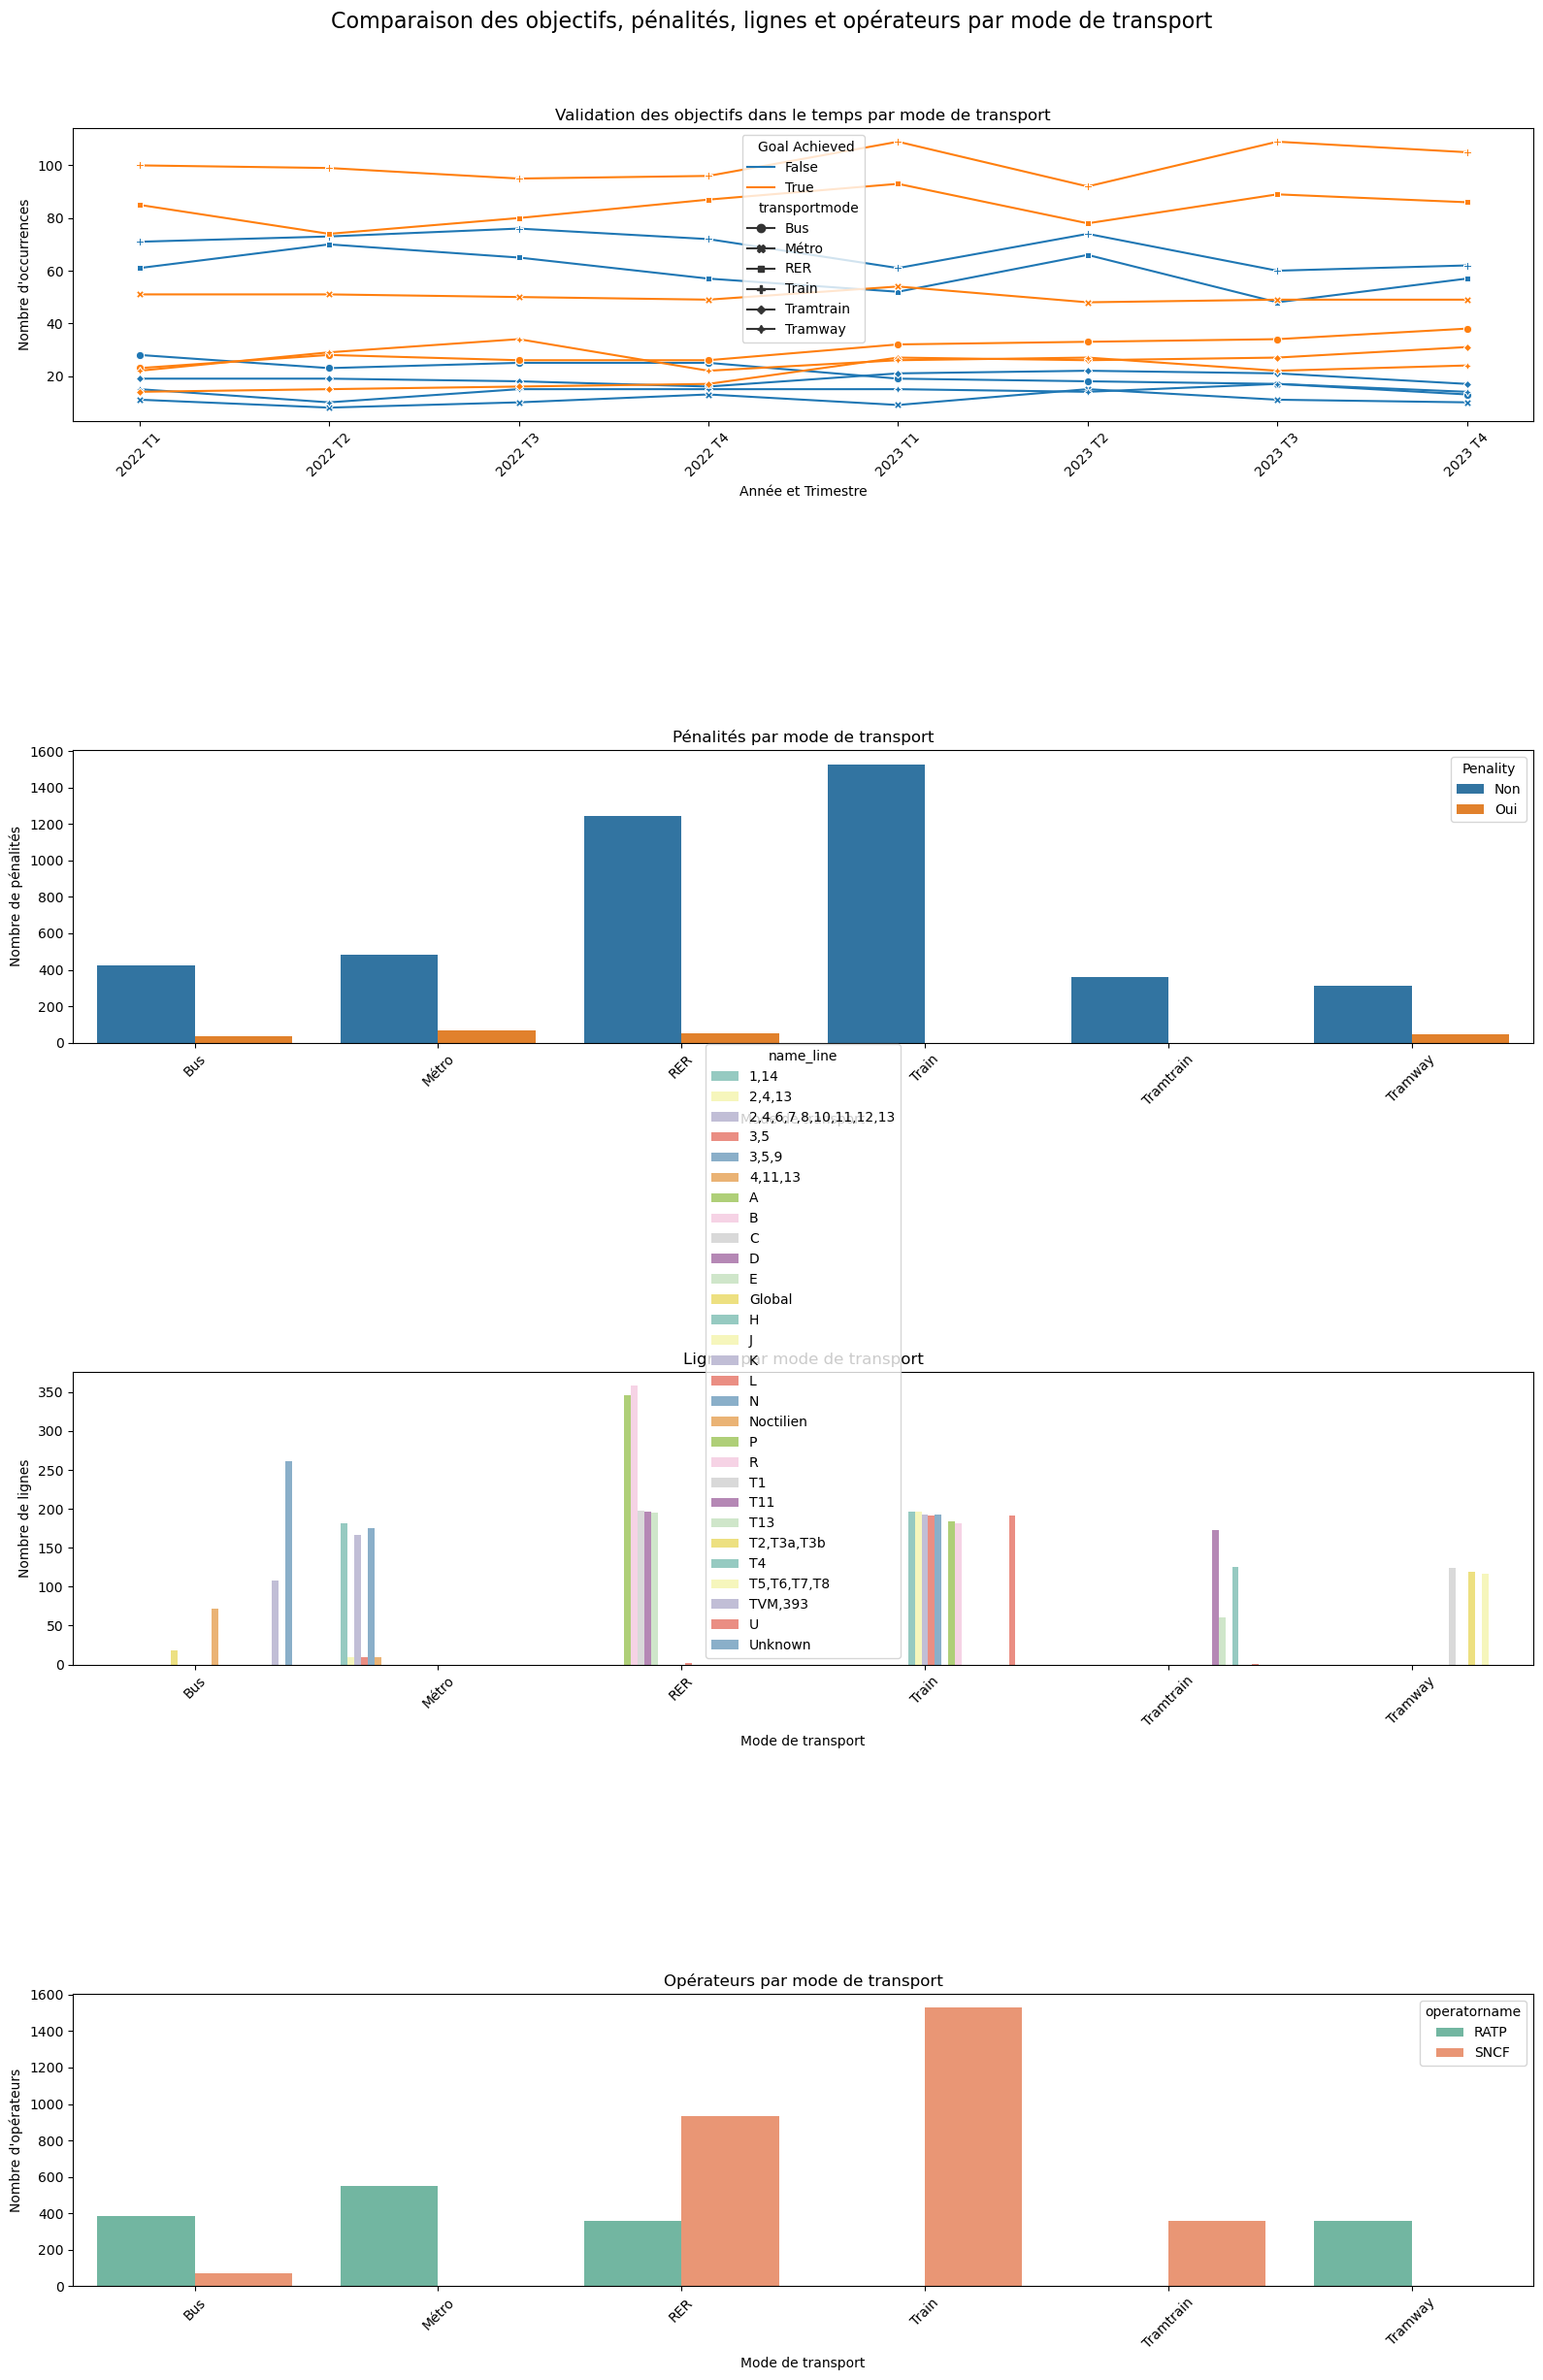

In [53]:
# Ajouter une colonne indiquant si l'objectif a été atteint
df['goal_achieved'] = df['percent_result'] >= df['target_reference_contract']

# Vérifier les valeurs uniques dans la colonne 'penality'
print(df['penality'].unique())

# Fusionner les colonnes année et trimestre pour une meilleure visualisation
df['year_trimester'] = df['year'].astype(str) + ' T' + df['trimester'].str.extract('(\d)')[0]

# Création de la figure combinée
fig, axes = plt.subplots(4, 1, figsize=(16, 24))

# Validation des objectifs dans le temps par mode de transport
goal_transport = df.groupby(['year_trimester', 'transportmode', 'goal_achieved']).size().unstack(fill_value=0).reset_index()
goal_transport = goal_transport.melt(id_vars=['year_trimester', 'transportmode'], value_vars=[True, False], var_name='Goal Achieved', value_name='Count')
sns.lineplot(data=goal_transport, x='year_trimester', y='Count', hue='Goal Achieved', style='transportmode', markers=True, dashes=False, ax=axes[0])
axes[0].set_title('Validation des objectifs dans le temps par mode de transport')
axes[0].set_xlabel('Année et Trimestre')
axes[0].set_ylabel('Nombre d\'occurrences')
axes[0].tick_params(axis='x', rotation=45)

# Pénalités par mode de transport
penalty_transport = df.groupby(['transportmode', 'penality']).size().unstack(fill_value=0).reset_index()
penalty_transport = penalty_transport.melt(id_vars='transportmode', value_vars=['Non', 'Oui'], var_name='Penality', value_name='Count')
sns.barplot(data=penalty_transport, x='transportmode', y='Count', hue='Penality', ax=axes[1])
axes[1].set_title('Pénalités par mode de transport')
axes[1].set_xlabel('Mode de transport')
axes[1].set_ylabel('Nombre de pénalités')
axes[1].tick_params(axis='x', rotation=45)

# Lignes par mode de transport
lines_transport = df.groupby(['transportmode', 'name_line']).size().unstack(fill_value=0).reset_index()
lines_transport = lines_transport.melt(id_vars='transportmode', var_name='name_line', value_name='Count')
sns.barplot(data=lines_transport, x='transportmode', y='Count', hue='name_line', ax=axes[2], palette='Set3')
axes[2].set_title('Lignes par mode de transport')
axes[2].set_xlabel('Mode de transport')
axes[2].set_ylabel('Nombre de lignes')
axes[2].tick_params(axis='x', rotation=45)

# Opérateurs par mode de transport
operator_transport = df.groupby(['transportmode', 'operatorname']).size().unstack(fill_value=0).reset_index()
operator_transport = operator_transport.melt(id_vars='transportmode', var_name='operatorname', value_name='Count')
sns.barplot(data=operator_transport, x='transportmode', y='Count', hue='operatorname', ax=axes[3], palette='Set2')
axes[3].set_title('Opérateurs par mode de transport')
axes[3].set_xlabel('Mode de transport')
axes[3].set_ylabel('Nombre d\'opérateurs')
axes[3].tick_params(axis='x', rotation=45)

plt.suptitle('Comparaison des objectifs, pénalités, lignes et opérateurs par mode de transport', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#  prévisions sur les prochains trimestres pour un ou plusieurs thèmes

nous utiliserons le modele Arima pour les previsions

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Thème: Information voyageurs
RMSE: 1.005432145870441
MAE: 0.9837125833191322
AIC: 11.029970188856051
BIC: 8.32580705486038
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

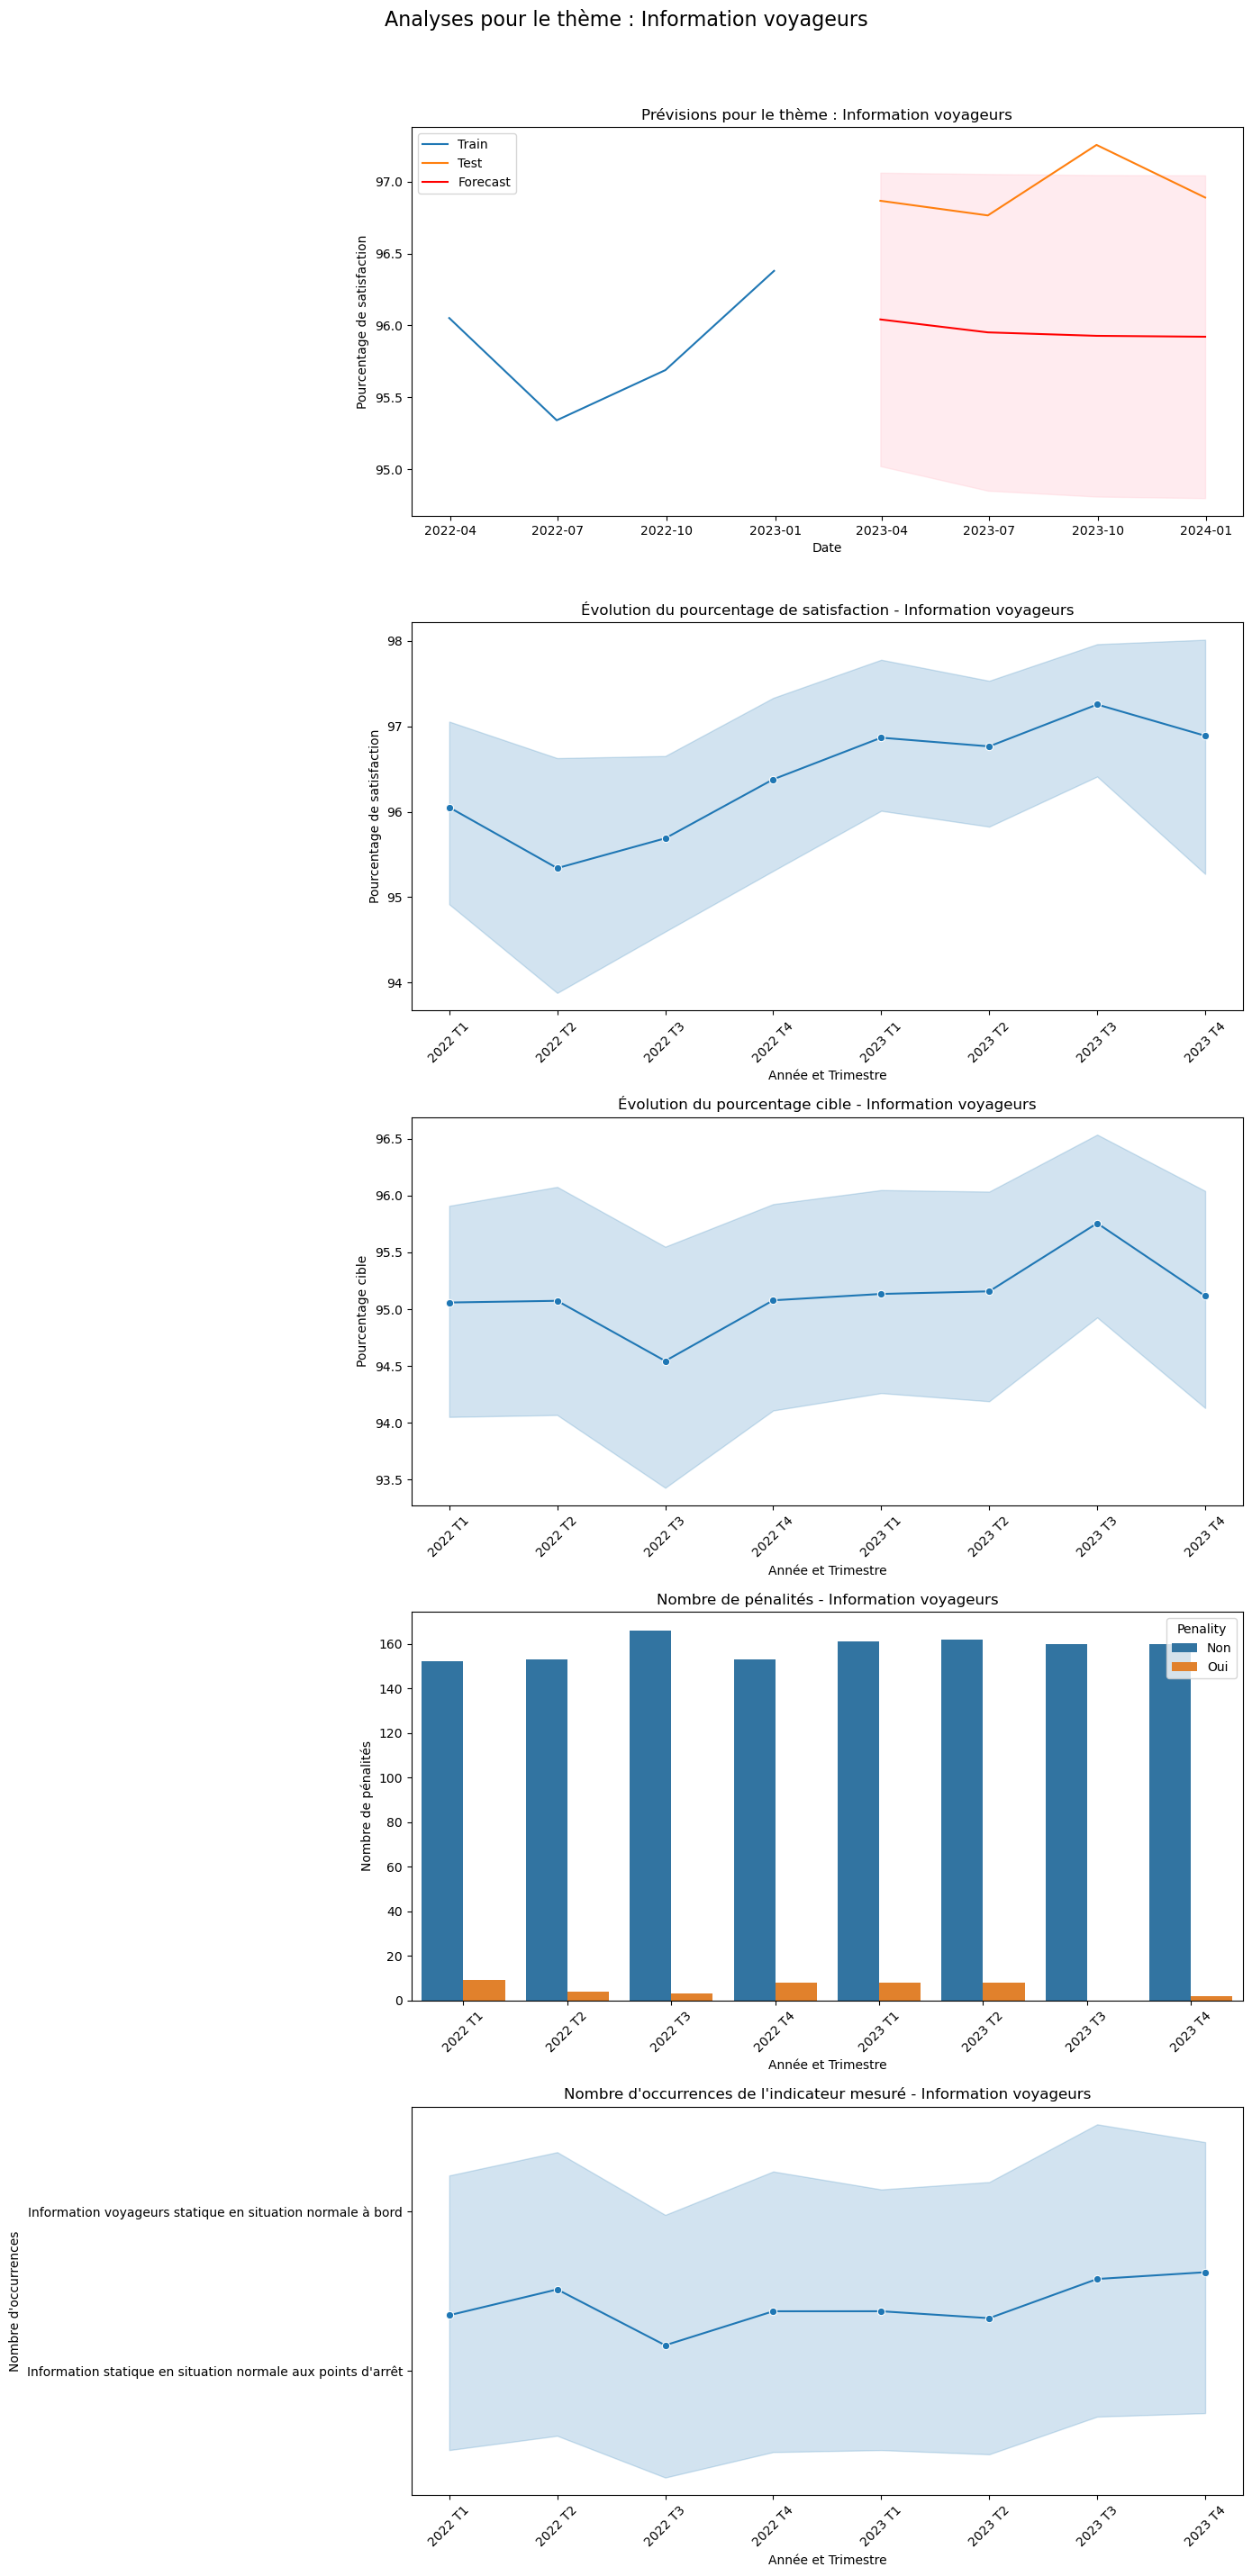

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thème: Ventes & Validations
RMSE: 3.42516121215244
MAE: 3.383420560966755
AIC: 18.20572529433366
BIC: 15.50156216033799
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

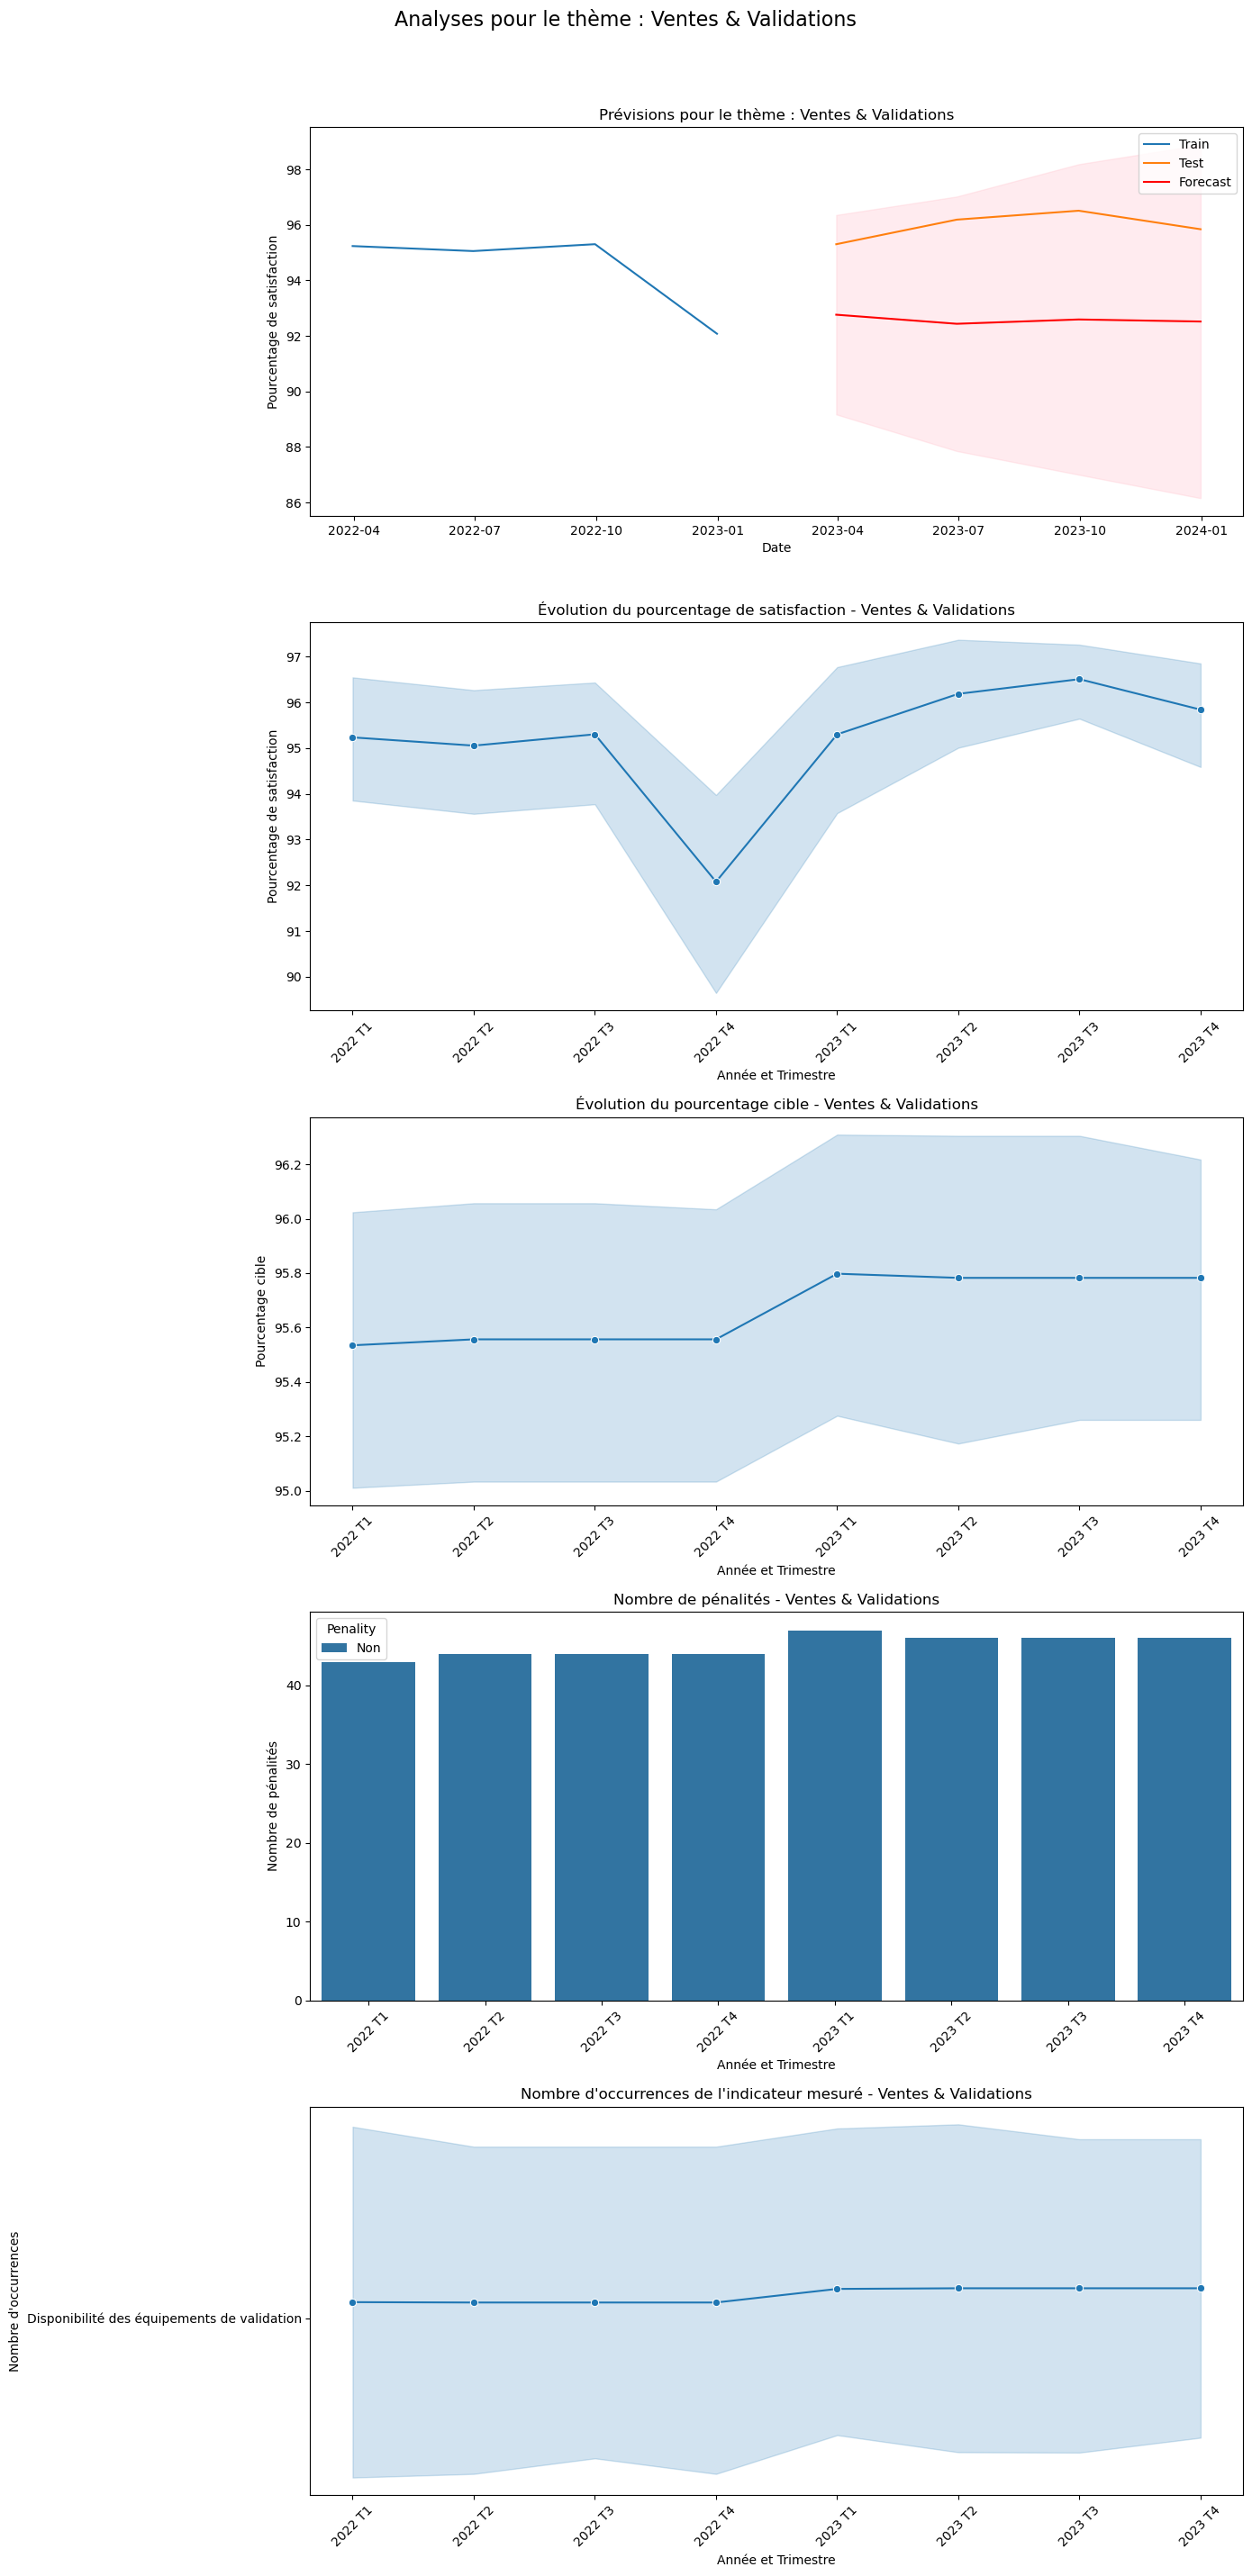

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Thème: Propreté
RMSE: 0.5754020874134353
MAE: 0.45201451827572114
AIC: 14.653971316531978
BIC: 11.949808182536307
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

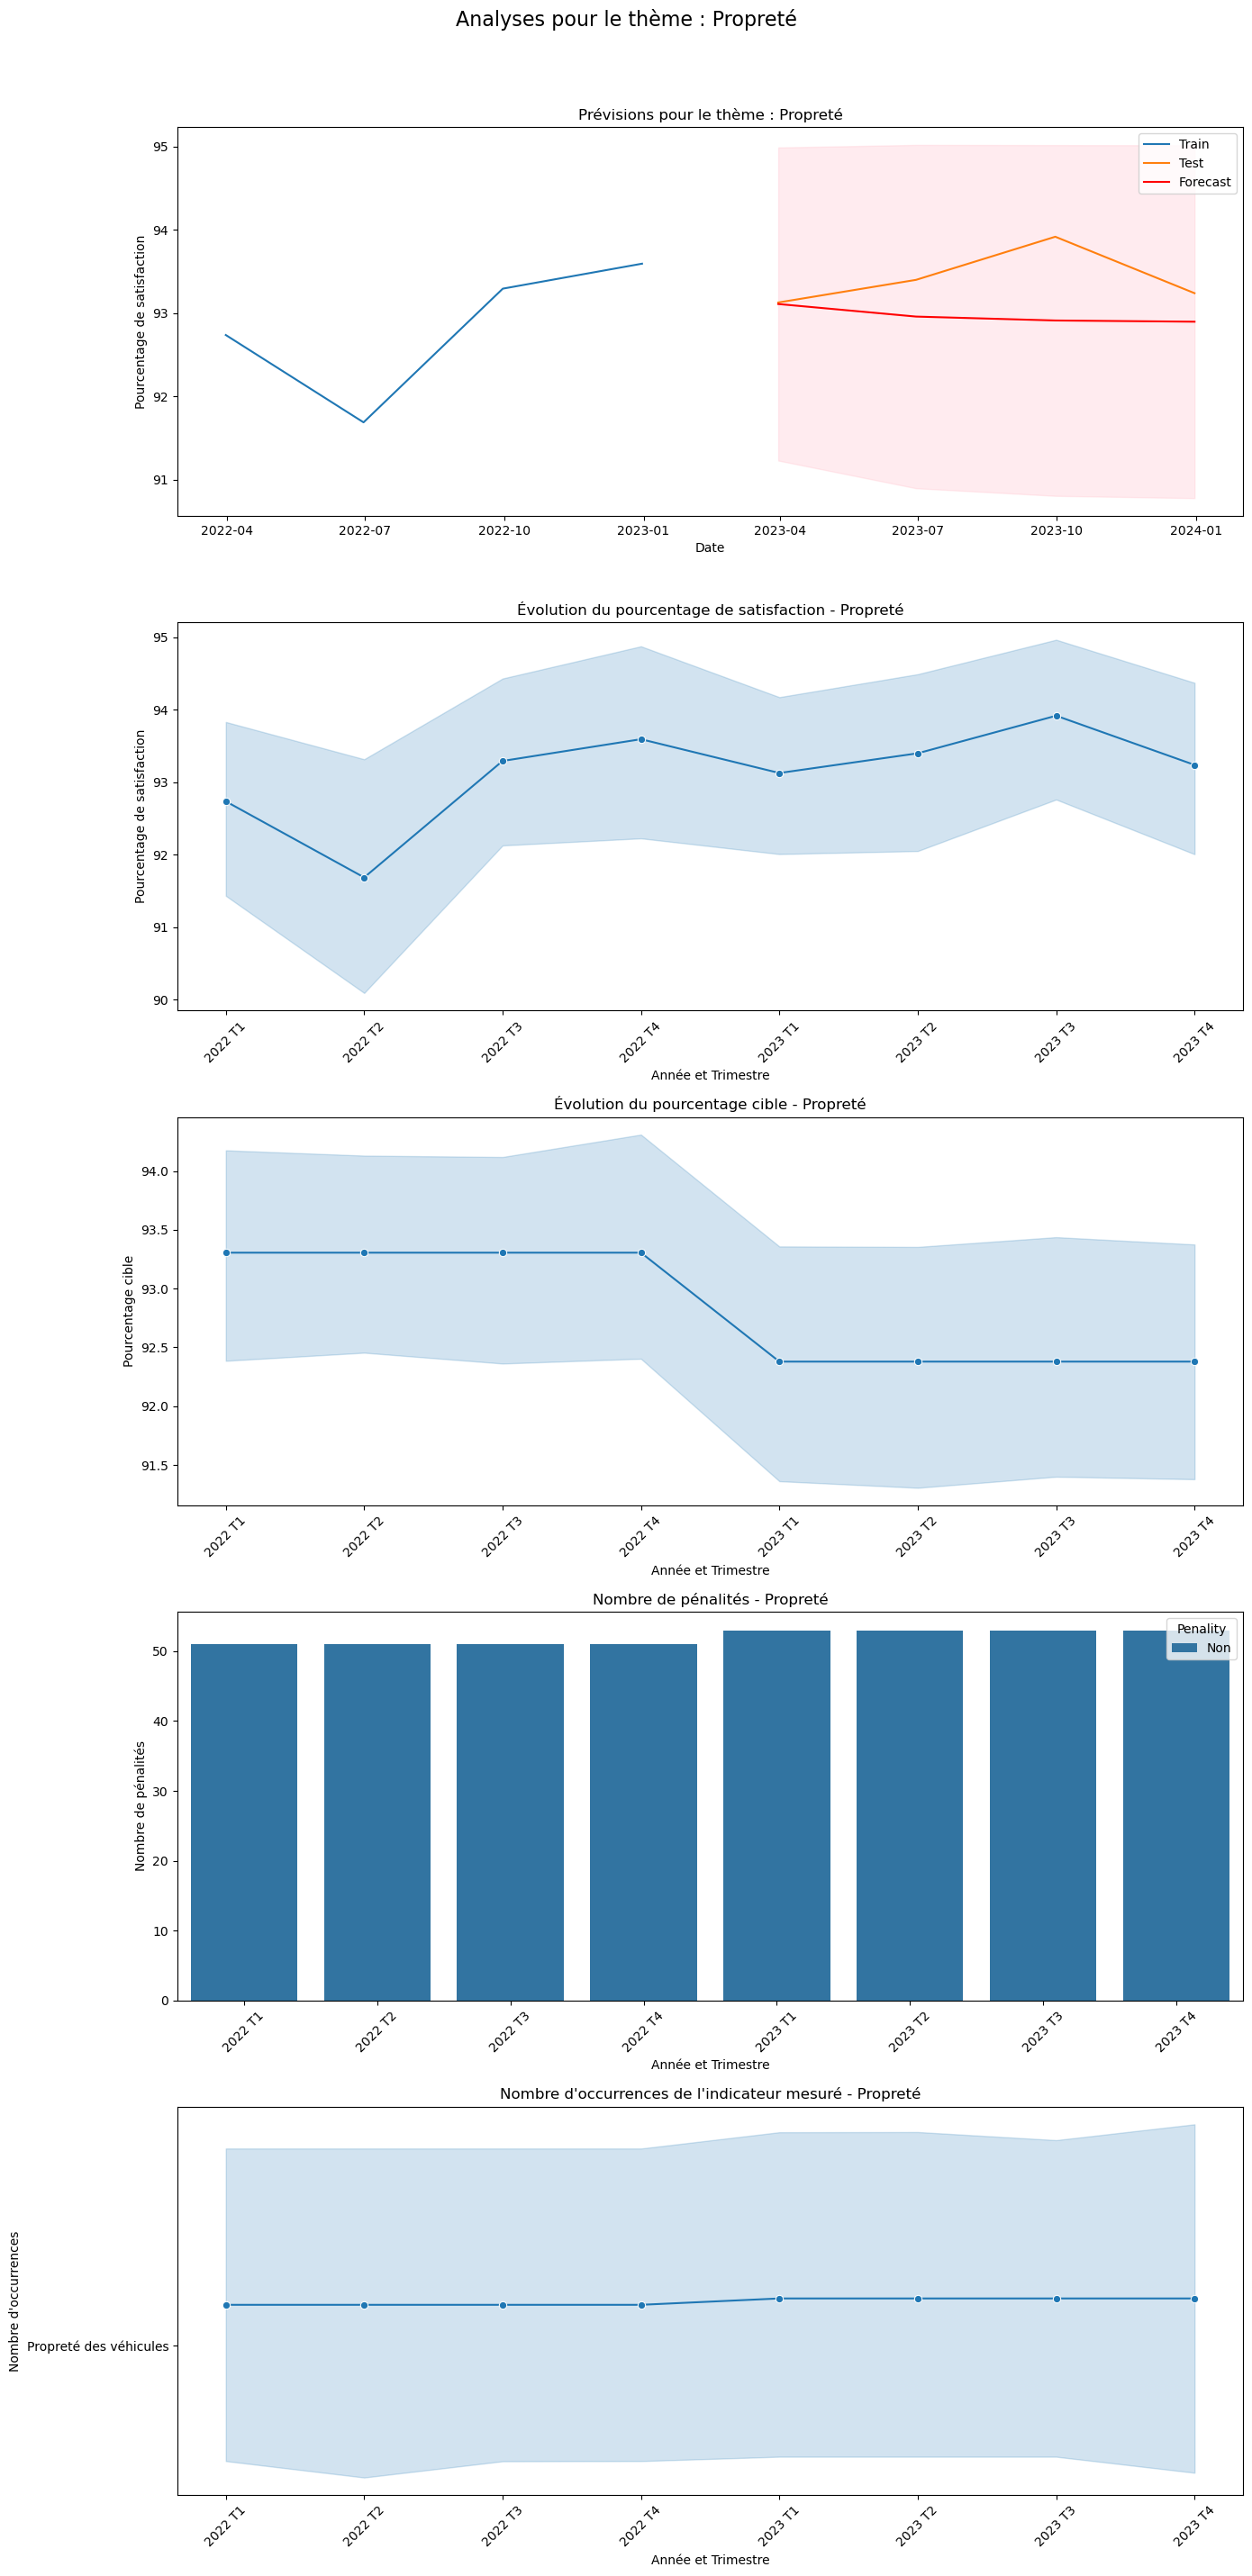

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thème: Contact voyageurs
RMSE: 3.1666864114874542
MAE: 3.14579005525394
AIC: 21.88347697100341
BIC: 19.17931383700774
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

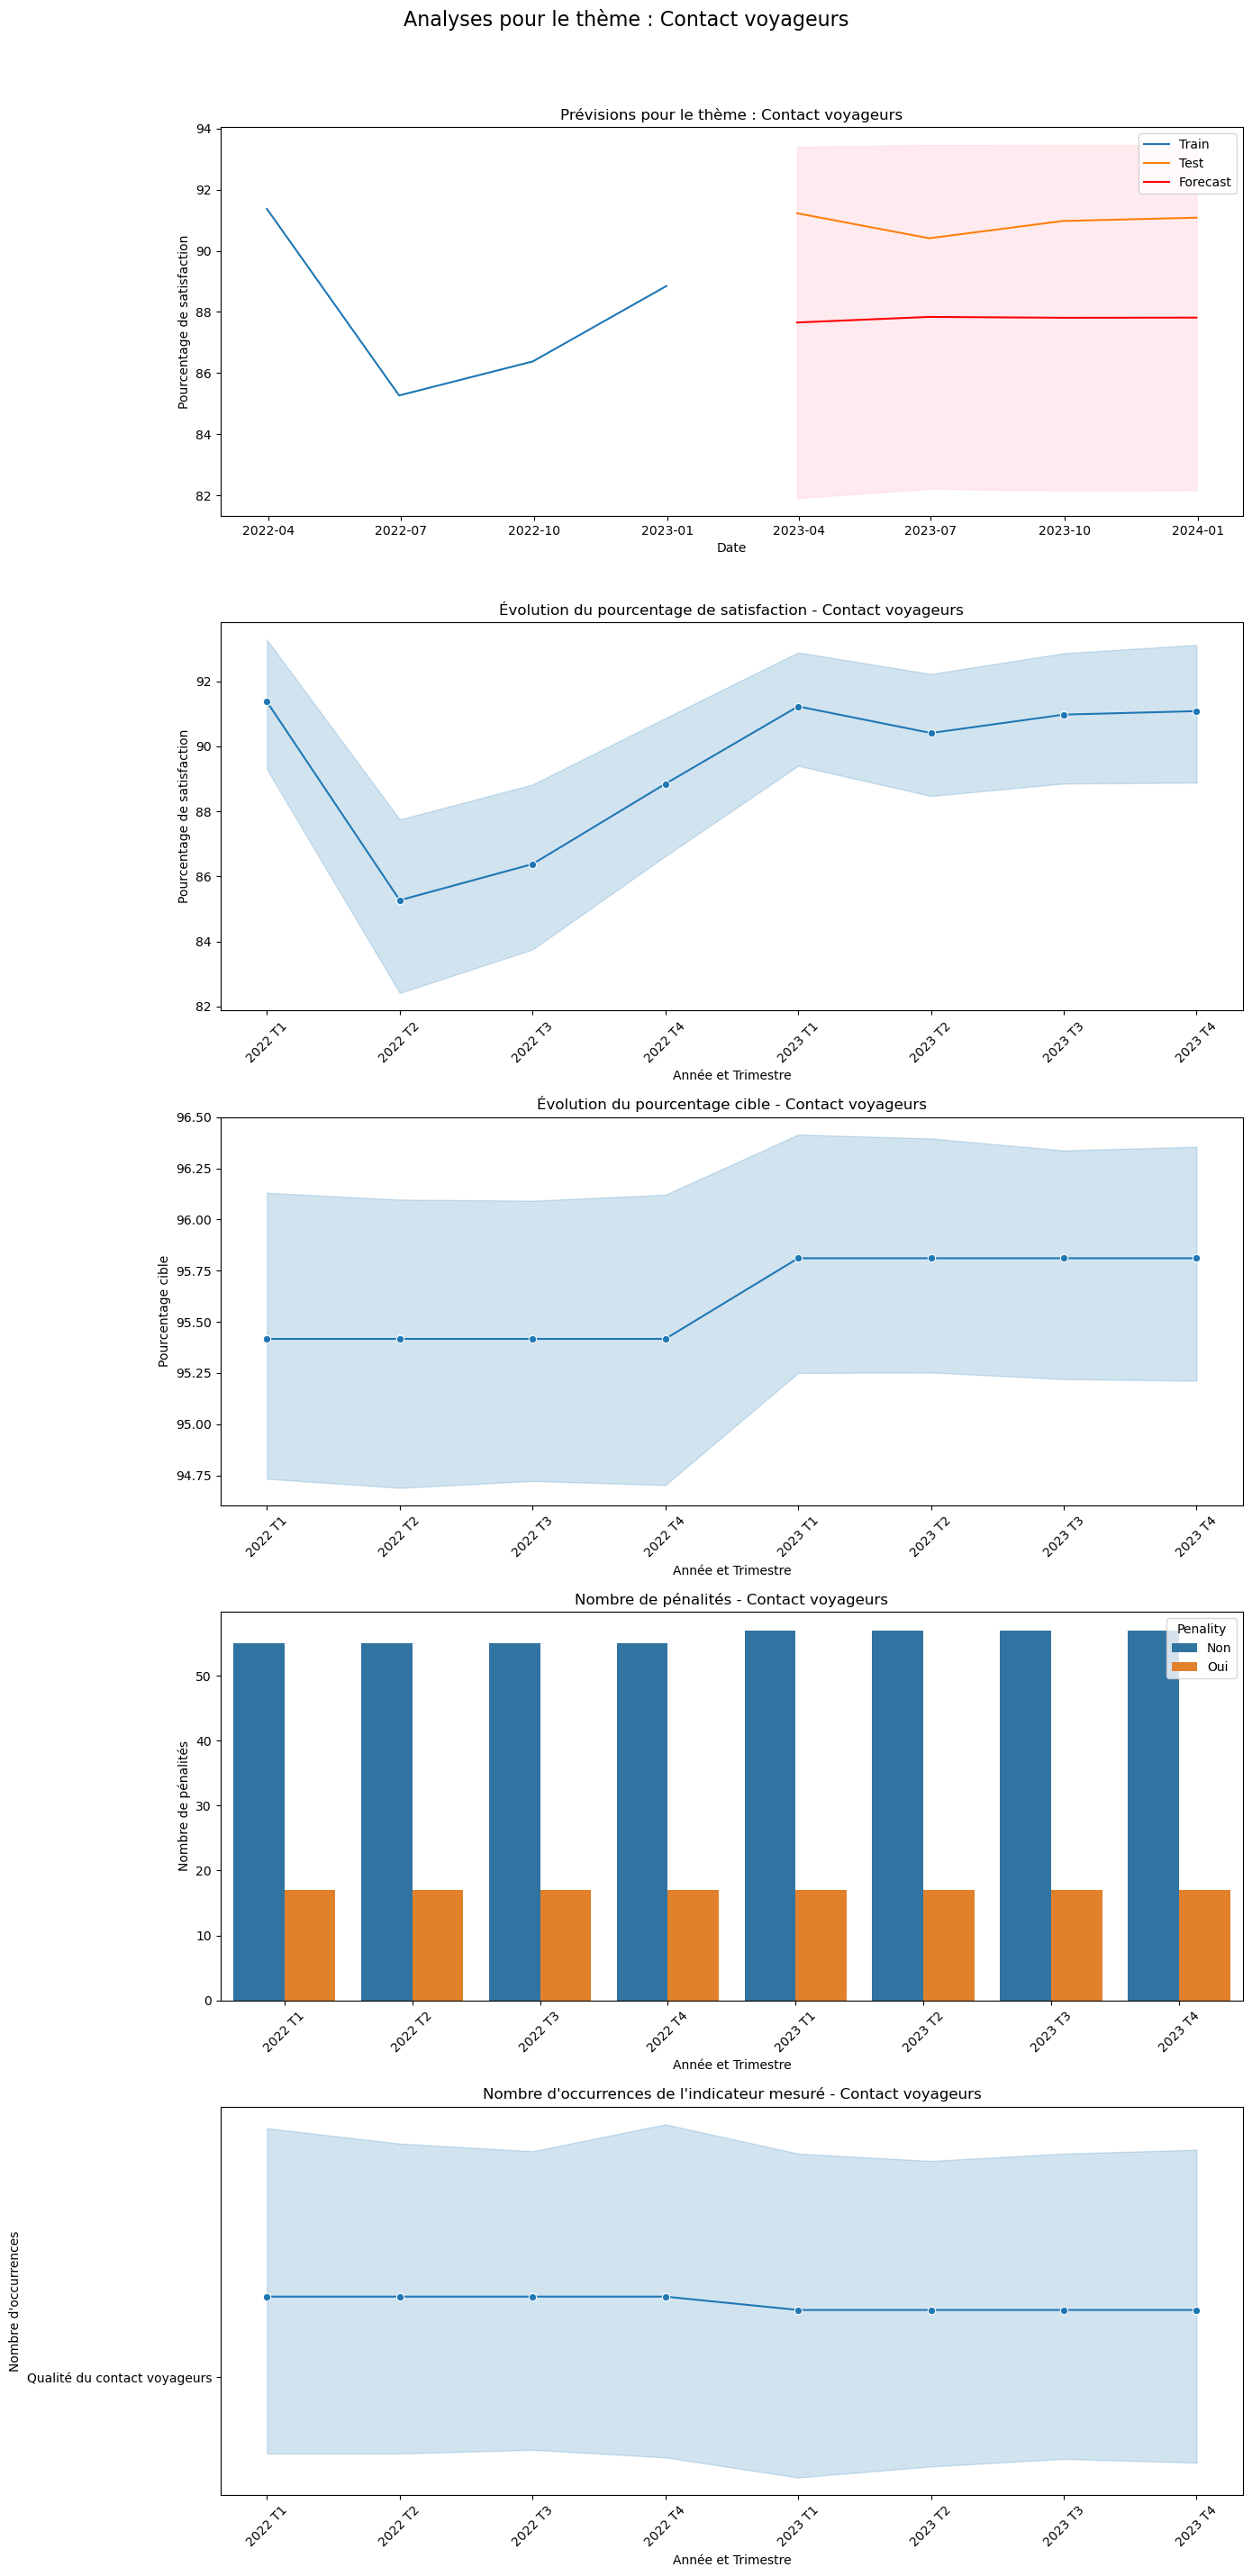

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thème: Elévatique
RMSE: 2.7891684017428413
MAE: 2.4183978005449305
AIC: 22.866699843833903
BIC: 20.162536709838232
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

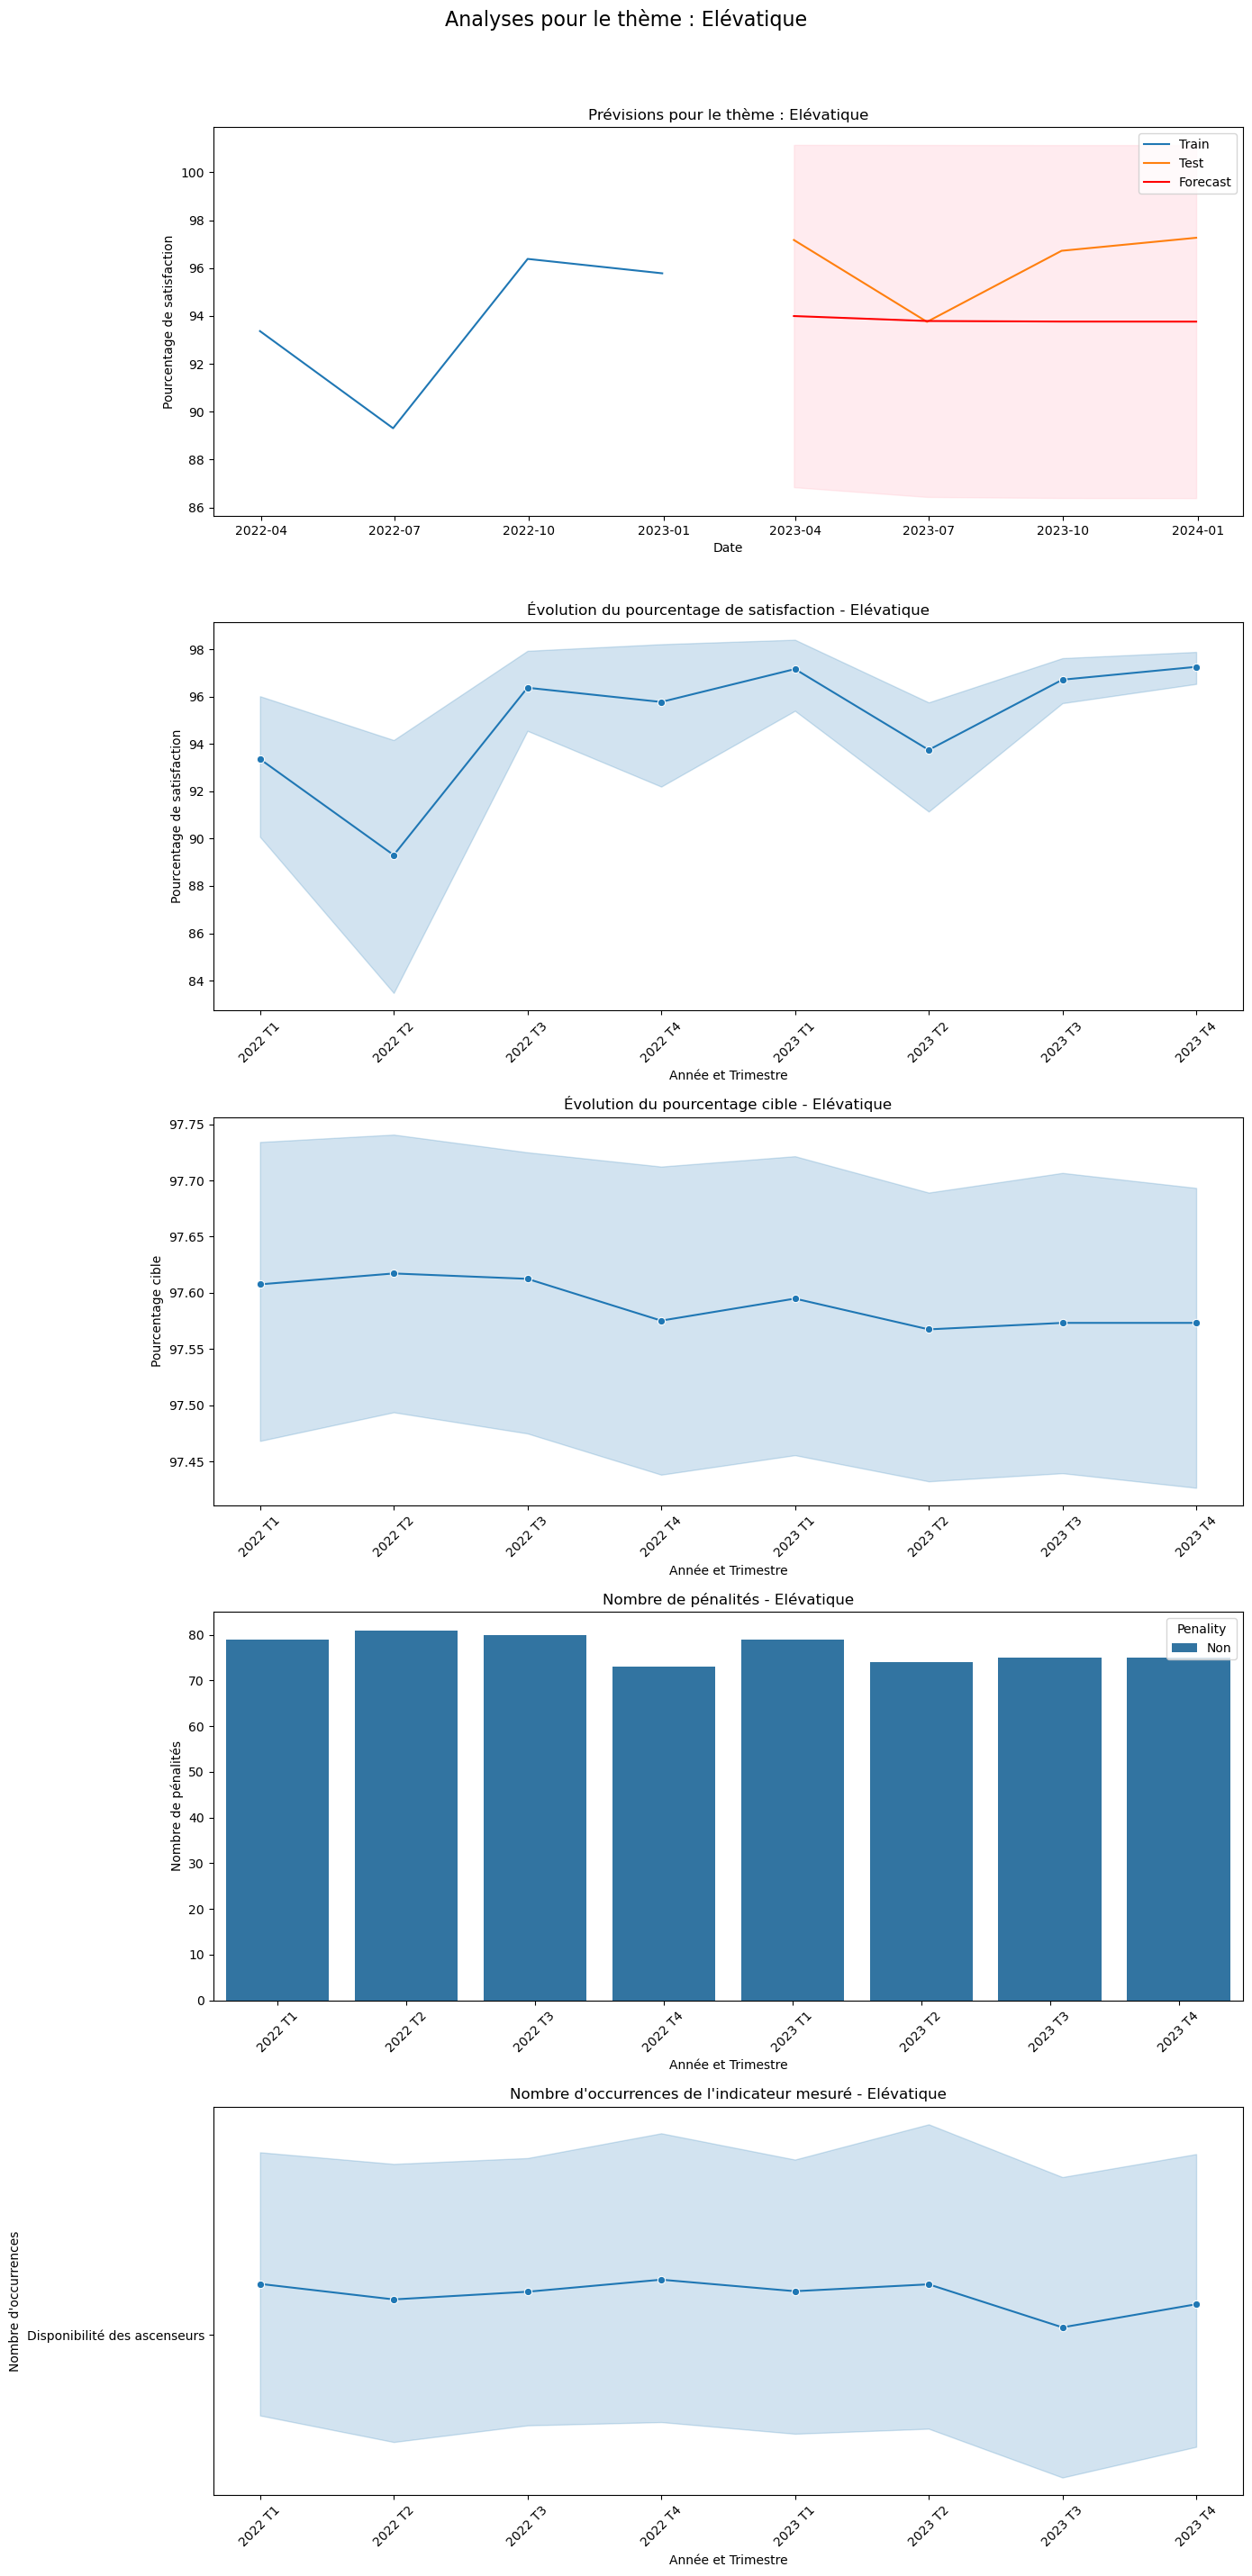

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thème: Sûreté
RMSE: 0.4129832188479761
MAE: 0.3777407541914677
AIC: 5.0664760770528146
BIC: 2.3623129430571437
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

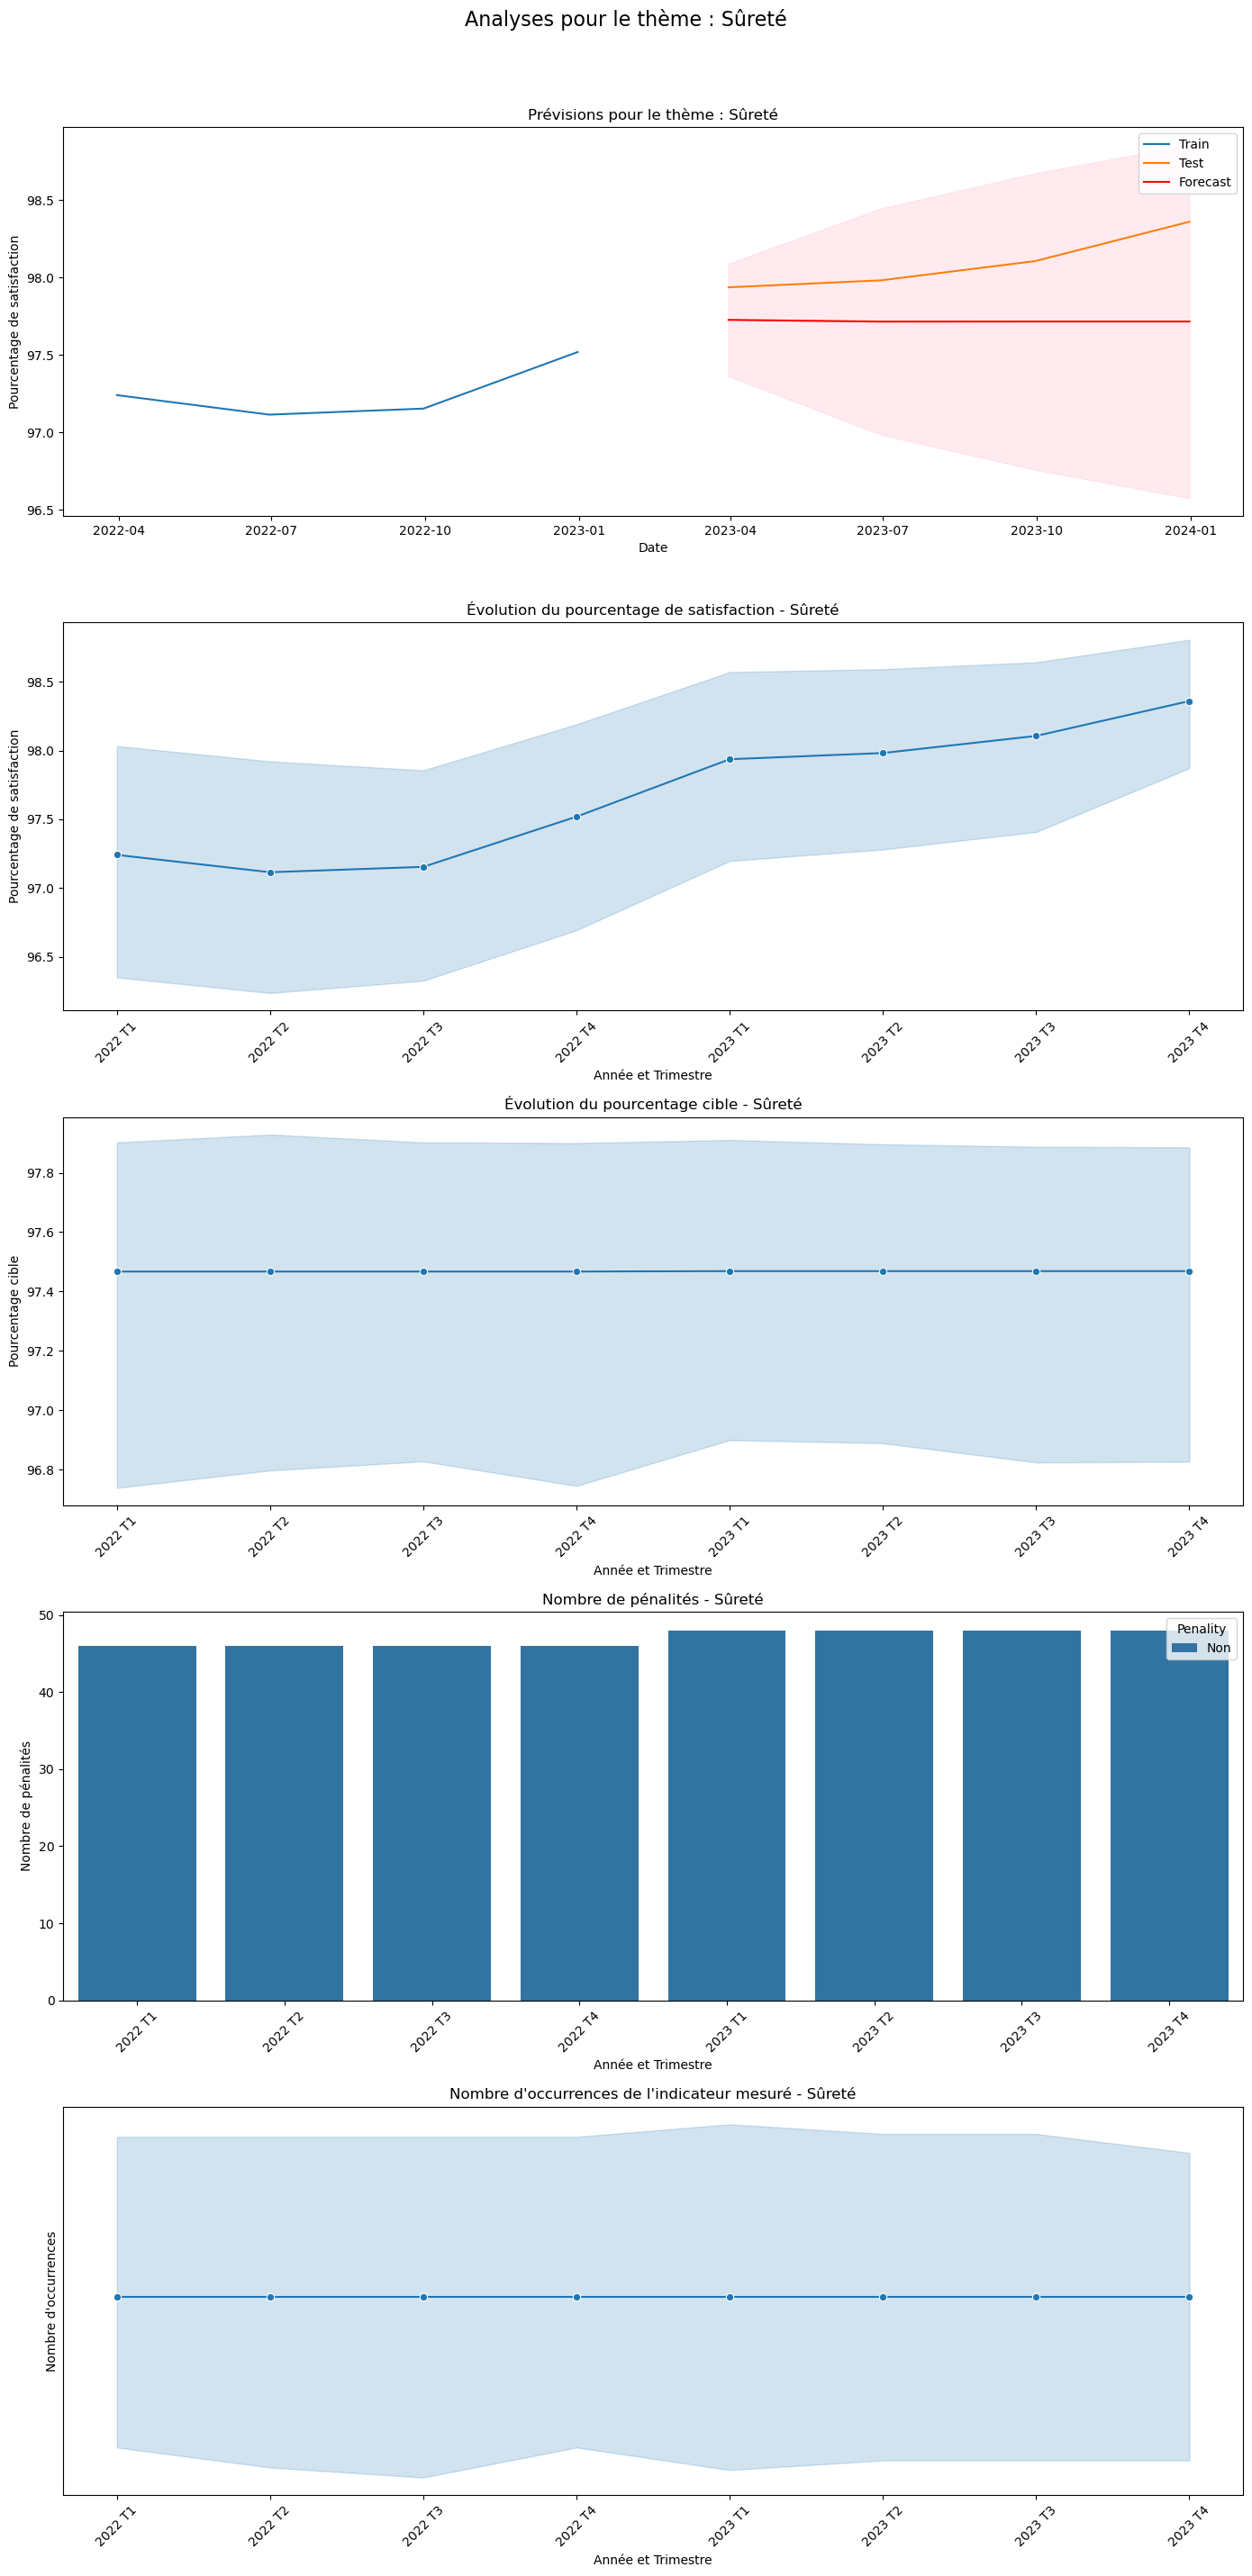

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thème: Accessibilité
RMSE: 0.23486549797601958
MAE: 0.21399673842316247
AIC: 3.019562885687713
BIC: 0.31539975169204215
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

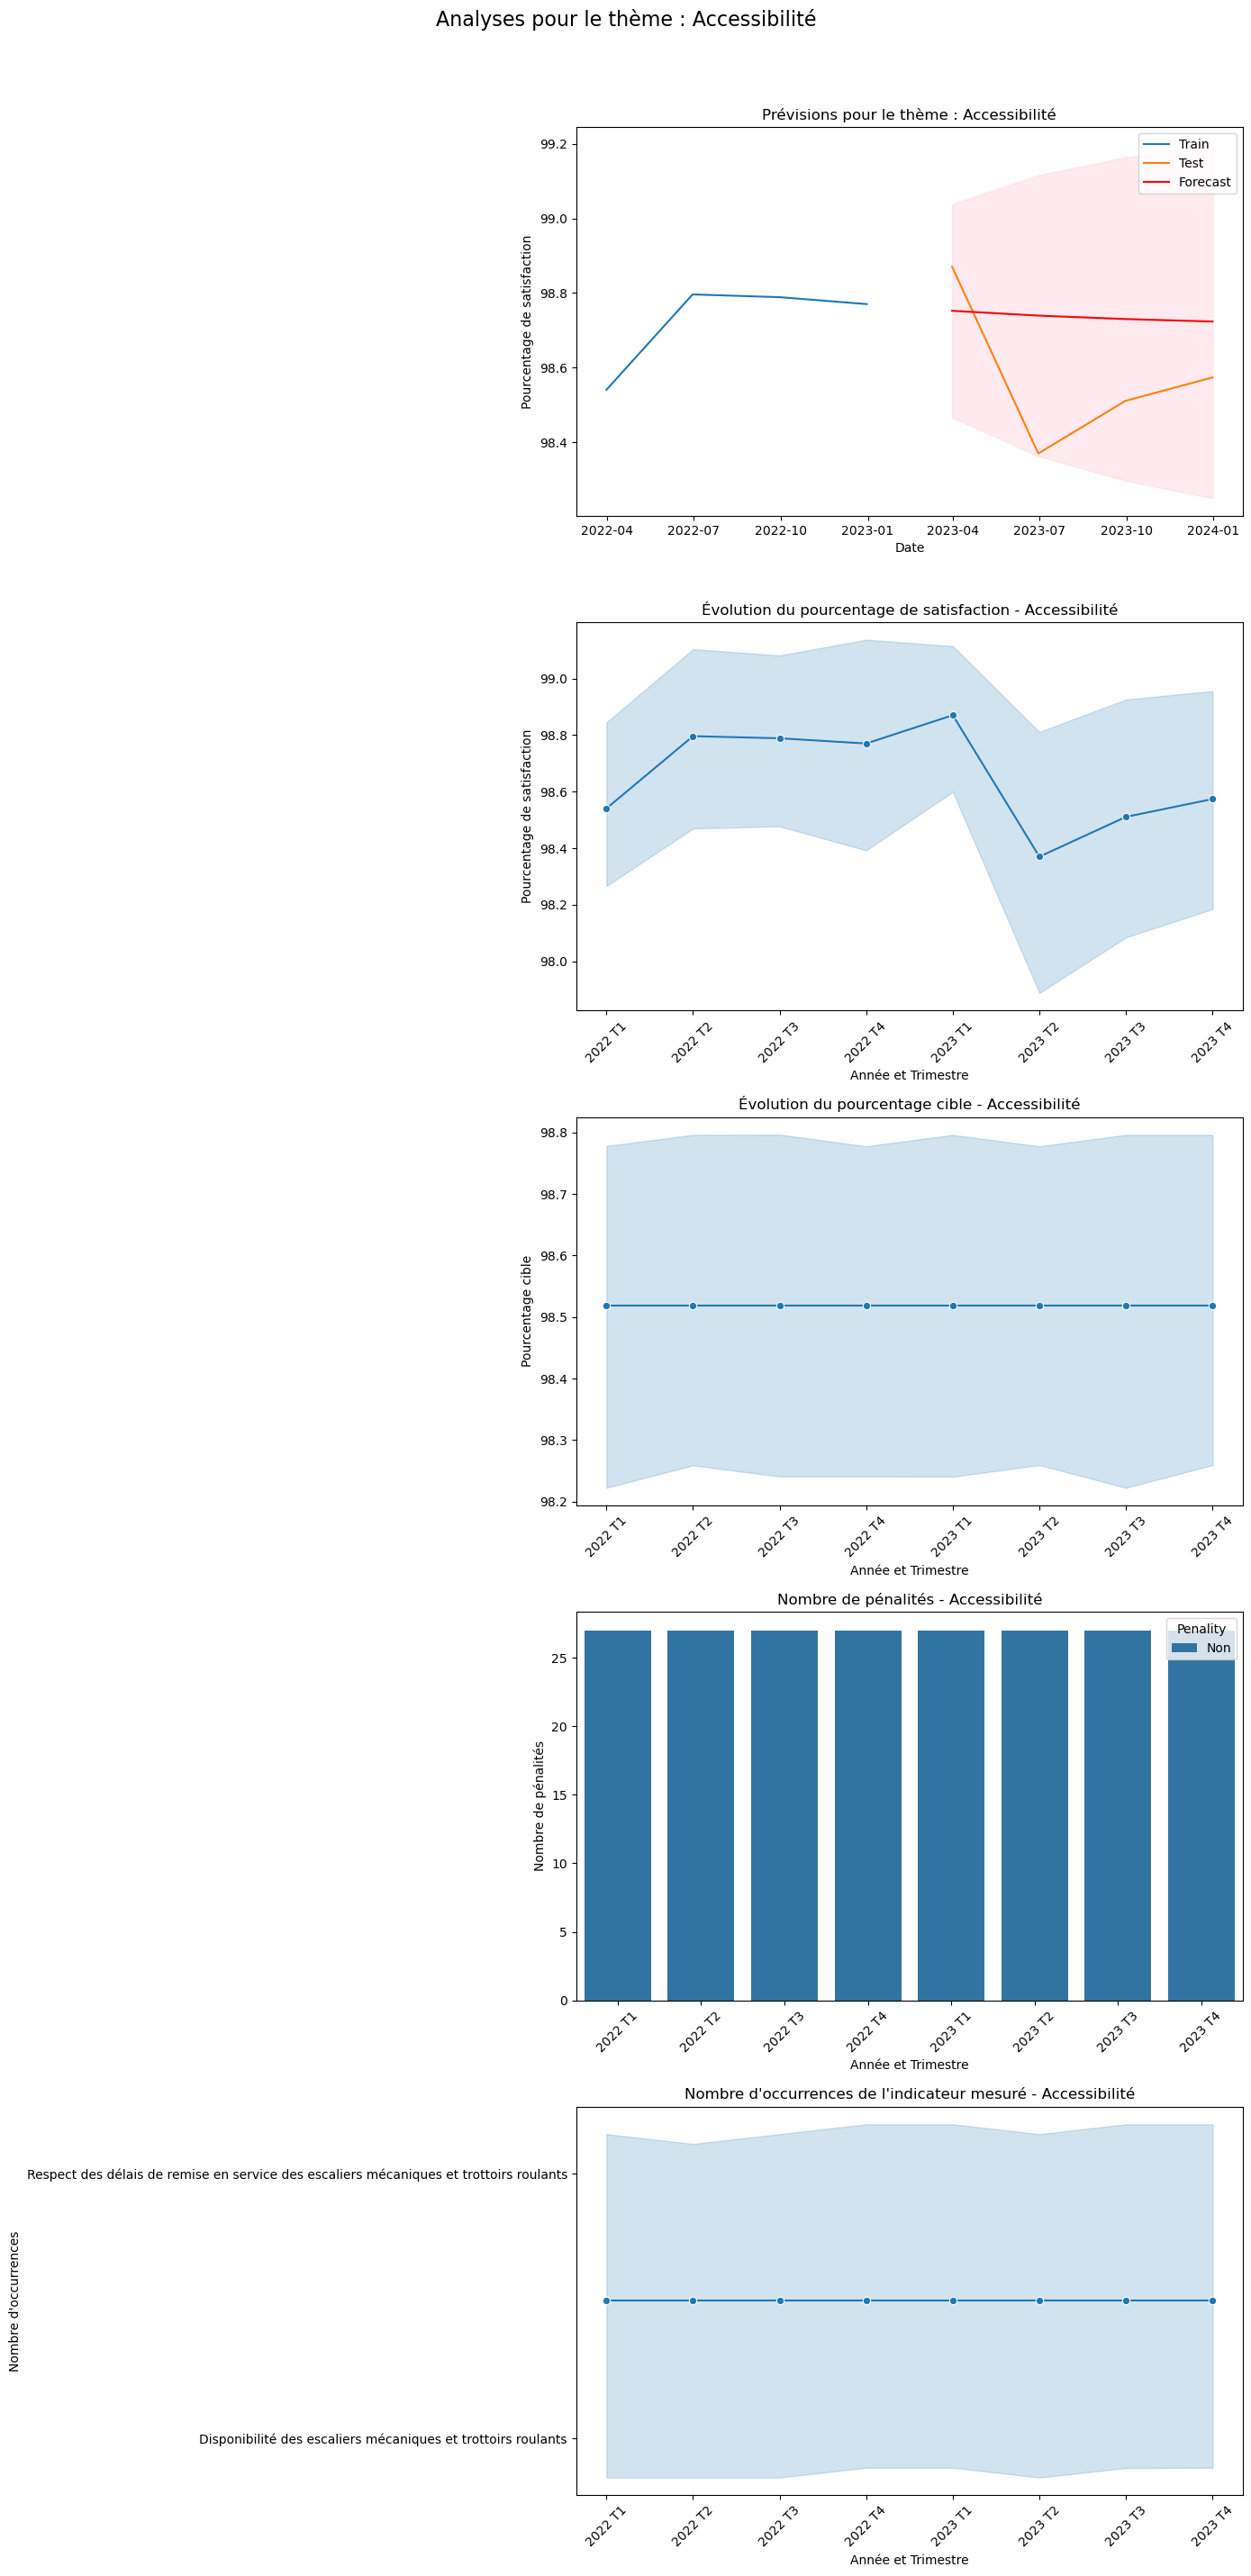

/home/roboticslab/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Thème: Ventes et Validations
RMSE: 1.471691147065112
MAE: 1.4324234009494532
AIC: 7.430336586120854
BIC: 4.726173452125183
------------------------


/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roboticslab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

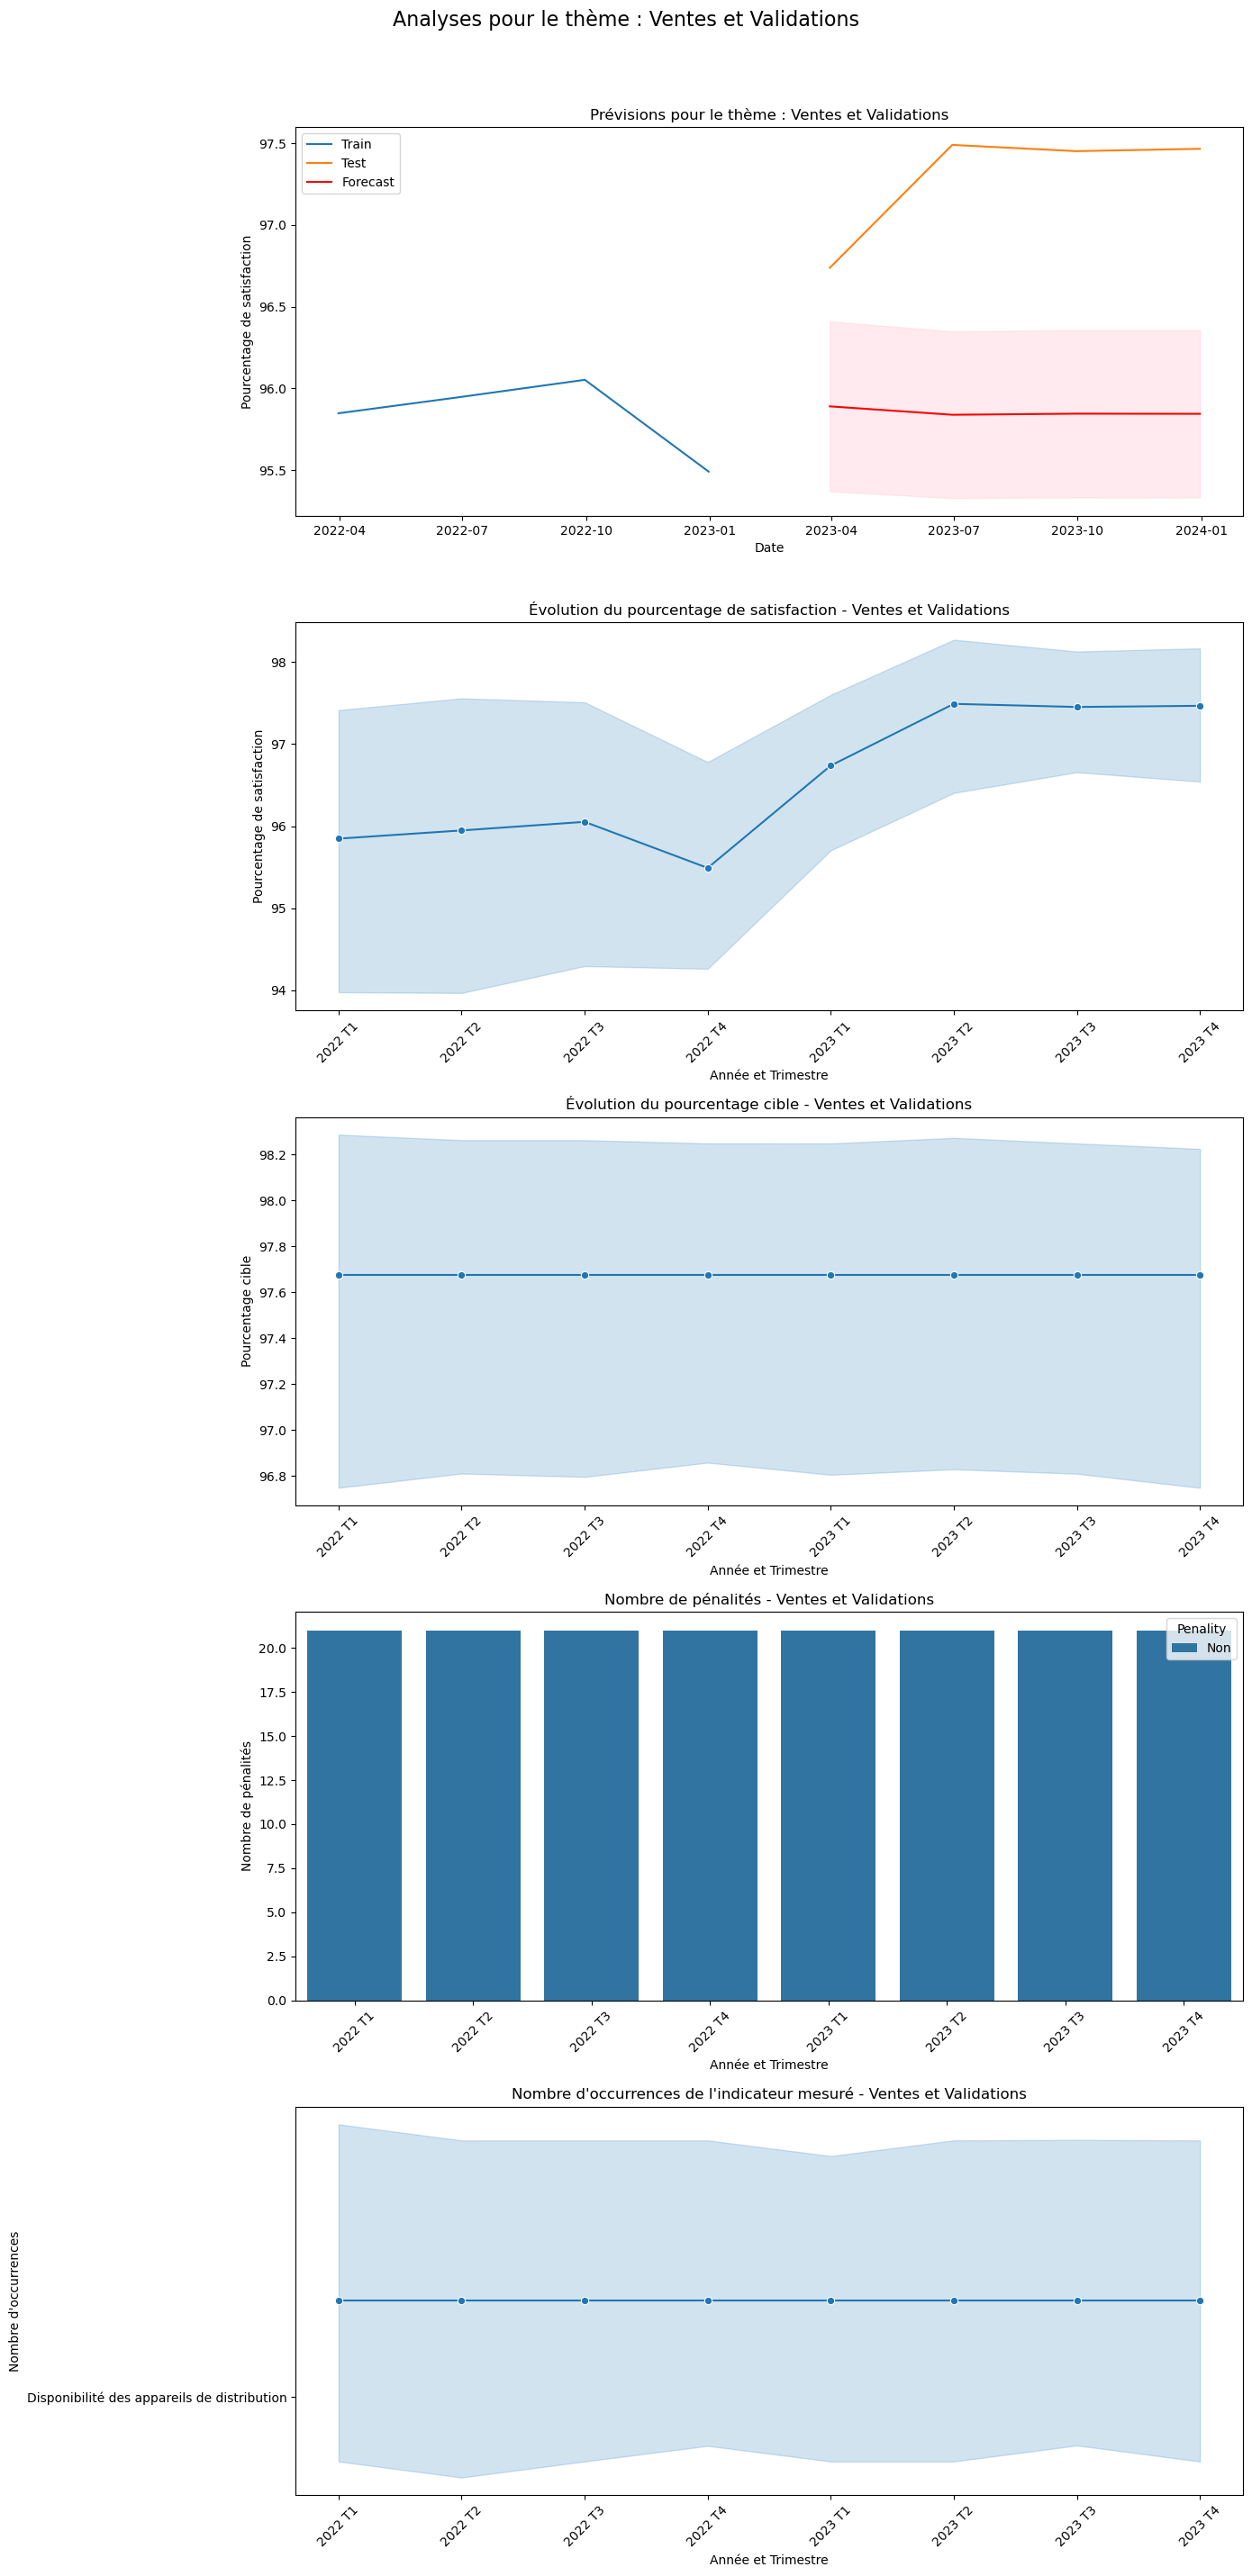

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ajouter une colonne indiquant si l'objectif a été atteint
df['goal_achieved'] = df['percent_result'] >= df['target_reference_contract']

# Vérifier les valeurs uniques dans 'trimester' et remplacer les valeurs manquantes par 'T1'
df['trimester'].fillna('T1', inplace=True)

# Assurer que 'trimester' contient uniquement des valeurs valides
valid_trimesters = ['T1', 'T2', 'T3', 'T4']
df = df[df['trimester'].isin(valid_trimesters)]

# Extraire les valeurs numériques de 'trimester'
df['trimester_num'] = df['trimester'].str.extract('(\d)').astype(int)

# Créer une colonne datetime basée sur l'année et le trimestre
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + ((df['trimester_num'] - 1) * 3 + 1).astype(str) + '-01')

# Fusionner les colonnes année et trimestre pour une meilleure visualisation
df['year_trimester'] = df['year'].astype(str) + ' T' + df['trimester_num'].astype(str)

# Liste des thèmes à analyser
themes = df['theme'].unique()

for theme in themes:
    # Filtrer les données pour le thème spécifique
    df_theme = df[df['theme'] == theme]

    # Préparer les données pour les séries temporelles
    df_theme = df_theme.set_index('date').sort_index()

    # Agréger les données par trimestre
    df_quarterly = df_theme['percent_result'].resample('Q').mean()

    # Diviser les données en train et test
    train = df_quarterly[:-4]
    test = df_quarterly[-4:]

    # Appliquer le modèle ARIMA
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Faire les prévisions
    forecast = model_fit.forecast(steps=4)
    forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=3), periods=4, freq='Q')
    forecast_values = forecast
    conf_int = model_fit.get_forecast(steps=4).conf_int()

    # Calculer les métriques de performance
    rmse = np.sqrt(mean_squared_error(test, forecast_values))
    mae = mean_absolute_error(test, forecast_values)
    aic = model_fit.aic
    bic = model_fit.bic

    print(f'Thème: {theme}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'AIC: {aic}')
    print(f'BIC: {bic}')
    print('------------------------')

    # Création de la figure pour le thème
    fig, axes = plt.subplots(5, 1, figsize=(14, 28), constrained_layout=True)

    # Visualiser les prévisions
    axes[0].plot(train, label='Train')
    axes[0].plot(test.index, test, label='Test')
    axes[0].plot(forecast_index, forecast_values, color='red', label='Forecast')
    axes[0].fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    axes[0].set_title(f'Prévisions pour le thème : {theme}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Pourcentage de satisfaction')
    axes[0].legend()

    # Evolution du pourcentage de satisfaction au fil du temps
    sns.lineplot(data=df_theme, x='year_trimester', y='percent_result', marker='o', ax=axes[1])
    axes[1].set_title(f'Évolution du pourcentage de satisfaction - {theme}')
    axes[1].set_xlabel('Année et Trimestre')
    axes[1].set_ylabel('Pourcentage de satisfaction')
    axes[1].tick_params(axis='x', rotation=45)

    # Evolution du pourcentage cible au fil du temps
    sns.lineplot(data=df_theme, x='year_trimester', y='target_reference_contract', marker='o', ax=axes[2])
    axes[2].set_title(f'Évolution du pourcentage cible - {theme}')
    axes[2].set_xlabel('Année et Trimestre')
    axes[2].set_ylabel('Pourcentage cible')
    axes[2].tick_params(axis='x', rotation=45)

    # Nombre de pénalités au fil du temps
    penalty_data = df_theme.groupby(['year_trimester', 'penality']).size().unstack(fill_value=0).reset_index()
    melted_data_penalties = penalty_data.melt(id_vars=['year_trimester'], var_name='Penality', value_name='Count')
    sns.barplot(data=melted_data_penalties, x='year_trimester', y='Count', hue='Penality', ax=axes[3])
    axes[3].set_title(f'Nombre de pénalités - {theme}')
    axes[3].set_xlabel('Année et Trimestre')
    axes[3].set_ylabel('Nombre de pénalités')
    axes[3].tick_params(axis='x', rotation=45)

    # Nombre d'occurrences de l'indicateur mesuré au fil du temps
    sns.lineplot(data=df_theme, x='year_trimester', y='indicator', marker='o', ax=axes[4])
    axes[4].set_title(f'Nombre d\'occurrences de l\'indicateur mesuré - {theme}')
    axes[4].set_xlabel('Année et Trimestre')
    axes[4].set_ylabel('Nombre d\'occurrences')
    axes[4].tick_params(axis='x', rotation=45)

    plt.suptitle(f'Analyses pour le thème : {theme}', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
